# <font color=green>Part 1 - Building up a basic predictive model</font>

Load the dataset Manhattan12.csv into a pandas dataframe and carry out the following tasks.
Organise your code bearing in mind robustness and maintainability:

In [1]:
import numpy as np
import pandas as pd
import string
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

## <font color=blue>1. Data cleaning and transformation: </font>

### <div class="alert alert-info">Show the shape of the dataset</div>

In [2]:
df = pd.read_csv('Manhattan12.csv', encoding = "ISO-8859-1")

In [3]:
df.shape

(27399, 21)

In [4]:
df.head()#check the outlook of data.

ï»¿Manhattan Rolling Sales File.  All Sales From August 2012 - August 2013.   \
0  Sales File as of 08/30/2013  Coop Sales Files ...                             
1  Neighborhood Name 09/06/13, Descriptive Data i...                             
2  Building Class Category is based on Building C...                             
3                                            BOROUGH                             
4                                                  1                             

                  Unnamed: 1                                    Unnamed: 2  \
0                        NaN                                           NaN   
1                        NaN                                           NaN   
2                        NaN                                           NaN   
3               NEIGHBORHOOD                       BUILDING CLASS CATEGORY   
4                             13  CONDOS - ELEVATOR APARTMENTS               

             Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0                   NaN        NaN        NaN        NaN   
1                   NaN        NaN        NaN        NaN   
2                   NaN        NaN        NaN        NaN   
3  TAX CLASS AT PRESENT      BLOCK        LOT  EASE-MENT   
4                              738       1306              

                  Unnamed: 7                                   Unnamed: 8  \
0                        NaN                                          NaN   
1                        NaN                                          NaN   
2                        NaN                                          NaN   
3  BUILDING CLASS AT PRESENT                                      ADDRESS   
4                              345 WEST 14TH   STREET                       

            Unnamed: 9  ...        Unnamed: 11       Unnamed: 12  Unnamed: 13  \
0                  NaN  ...                NaN               NaN          NaN   
1                  NaN  ...                NaN               NaN          NaN   
2                  NaN  ...                NaN               NaN          NaN   
3  APART\nMENT\nNUMBER  ...  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS   
4                       ...                  0                 0            0   

        Unnamed: 14        Unnamed: 15 Unnamed: 16                Unnamed: 17  \
0               NaN                NaN         NaN                        NaN   
1               NaN                NaN         NaN                        NaN   
2               NaN                NaN         NaN                        NaN   
3  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE   
4                 0                  0           0                         2    

                      Unnamed: 18  Unnamed: 19 Unnamed: 20  
0                             NaN          NaN         NaN  
1                             NaN          NaN         NaN  
2                             NaN          NaN         NaN  
3  BUILDING CLASS AT TIME OF SALE  SALE\nPRICE   SALE DATE  
4                             R4    $2,214,693  20/05/2013  

[5 rows x 21 columns]

In [5]:
#The first 3 line shows nothing.

In [6]:
df = df.drop(range(3))
df.head()# check again

ï»¿Manhattan Rolling Sales File.  All Sales From August 2012 - August 2013.   \
3                                            BOROUGH                             
4                                                  1                             
5                                                  1                             
6                                                  1                             
7                                                  1                             

                  Unnamed: 1                                    Unnamed: 2  \
3               NEIGHBORHOOD                       BUILDING CLASS CATEGORY   
4                             13  CONDOS - ELEVATOR APARTMENTS               
5                             13  CONDOS - ELEVATOR APARTMENTS               
6                             13  CONDOS - ELEVATOR APARTMENTS               
7                             13  CONDOS - ELEVATOR APARTMENTS               

             Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
3  TAX CLASS AT PRESENT      BLOCK        LOT  EASE-MENT   
4                              738       1306              
5                              738       1307              
6                              738       1308              
7                              738       1309              

                  Unnamed: 7                                   Unnamed: 8  \
3  BUILDING CLASS AT PRESENT                                      ADDRESS   
4                              345 WEST 14TH   STREET                       
5                              345 WEST 14TH   STREET                       
6                              345 WEST 14TH   STREET                       
7                              345 WEST 14TH   STREET                       

            Unnamed: 9  ...        Unnamed: 11       Unnamed: 12  Unnamed: 13  \
3  APART\nMENT\nNUMBER  ...  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS   
4                       ...                  0                 0            0   
5                       ...                  0                 0            0   
6                       ...                  0                 0            0   
7                       ...                  0                 0            0   

        Unnamed: 14        Unnamed: 15 Unnamed: 16                Unnamed: 17  \
3  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE   
4                 0                  0           0                         2    
5                 0                  0           0                         2    
6                 0                  0           0                         2    
7                 0                  0           0                         2    

                      Unnamed: 18  Unnamed: 19 Unnamed: 20  
3  BUILDING CLASS AT TIME OF SALE  SALE\nPRICE   SALE DATE  
4                             R4    $2,214,693  20/05/2013  
5                             R4    $1,654,656  16/05/2013  
6                             R4    $1,069,162  23/05/2013  
7                             R4    $1,374,637  15/05/2013  

[5 rows x 21 columns]

### <div class="alert alert-info">Rename incorrectly formatted column names (e.g. SALE\nPRICE)</div>

In [7]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [8]:
df.head()

3 BOROUGH               NEIGHBORHOOD  \
4       1                              
5       1                              
6       1                              
7       1                              
8       1                              

3                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT BLOCK  \
4  13  CONDOS - ELEVATOR APARTMENTS                                    738   
5  13  CONDOS - ELEVATOR APARTMENTS                                    738   
6  13  CONDOS - ELEVATOR APARTMENTS                                    738   
7  13  CONDOS - ELEVATOR APARTMENTS                                    738   
8  13  CONDOS - ELEVATOR APARTMENTS                                    738   

3   LOT EASE-MENT BUILDING CLASS AT PRESENT  \
4  1306                                       
5  1307                                       
6  1308                                       
7  1309                                       
8  1310                                       

3                                      ADDRESS APART\nMENT\nNUMBER  ...  \
4   345 WEST 14TH   STREET                                          ...   
5   345 WEST 14TH   STREET                                          ...   
6   345 WEST 14TH   STREET                                          ...   
7   345 WEST 14TH   STREET                                          ...   
8   345 WEST 14TH   STREET                                          ...   

3 RESIDENTIAL UNITS COMMERCIAL UNITS TOTAL UNITS LAND SQUARE FEET  \
4                 0                0           0                0   
5                 0                0           0                0   
6                 0                0           0                0   
7                 0                0           0                0   
8                 0                0           0                0   

3 GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
4                 0          0                        2    
5                 0          0                        2    
6                 0          0                        2    
7                 0          0                        2    
8                 0          0                        2    

3 BUILDING CLASS AT TIME OF SALE SALE\nPRICE   SALE DATE  
4                            R4   $2,214,693  20/05/2013  
5                            R4   $1,654,656  16/05/2013  
6                            R4   $1,069,162  23/05/2013  
7                            R4   $1,374,637  15/05/2013  
8                            R4   $1,649,565  13/05/2013  

[5 rows x 21 columns]

In [9]:
df.columns = [x.replace("\n", " ") for x in df.columns.to_list()]
# 

In [10]:
df

BOROUGH               NEIGHBORHOOD  \
4           1                              
5           1                              
6           1                              
7           1                              
8           1                              
...       ...                        ...   
27394       1  WASHINGTON HEIGHTS UPPER    
27395       1  WASHINGTON HEIGHTS UPPER    
27396       1  WASHINGTON HEIGHTS UPPER    
27397       1  WASHINGTON HEIGHTS UPPER    
27398       1  WASHINGTON HEIGHTS UPPER    

                            BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
4      13  CONDOS - ELEVATOR APARTMENTS                                    
5      13  CONDOS - ELEVATOR APARTMENTS                                    
6      13  CONDOS - ELEVATOR APARTMENTS                                    
7      13  CONDOS - ELEVATOR APARTMENTS                                    
8      13  CONDOS - ELEVATOR APARTMENTS                                    
...                                             ...                  ...   
27394  31  COMMERCIAL VACANT LAND                                      4   
27395  31  COMMERCIAL VACANT LAND                                      4   
27396  31  COMMERCIAL VACANT LAND                                      4   
27397  31  COMMERCIAL VACANT LAND                                      4   
27398  31  COMMERCIAL VACANT LAND                                      4   

      BLOCK   LOT EASE-MENT BUILDING CLASS AT PRESENT  \
4       738  1306                                       
5       738  1307                                       
6       738  1308                                       
7       738  1309                                       
8       738  1310                                       
...     ...   ...       ...                       ...   
27394  2170   400                                  V1   
27395  2180    75                                  V1   
27396  2180    75                                  V1   
27397  2180    76                                  V1   
27398  2180    76                                  V1   

                                           ADDRESS APART MENT NUMBER  ...  \
4       345 WEST 14TH   STREET                                        ...   
5       345 WEST 14TH   STREET                                        ...   
6       345 WEST 14TH   STREET                                        ...   
7       345 WEST 14TH   STREET                                        ...   
8       345 WEST 14TH   STREET                                        ...   
...                                            ...               ...  ...   
27394   44 FAIRVIEW AVENUE                                            ...   
27395   BENNETT AVENUE                                                ...   
27396   BENNETT AVENUE                                                ...   
27397   N/A MAGAW PLACE                                               ...   
27398   MAGAW PLACE                                                   ...   

      RESIDENTIAL UNITS COMMERCIAL UNITS TOTAL UNITS LAND SQUARE FEET  \
4                     0                0           0                0   
5                     0                0           0                0   
6                     0                0           0                0   
7                     0                0           0                0   
8                     0                0           0                0   
...                 ...              ...         ...              ...   
27394                 0                0           0           16,217   
27395                 0                0           0            4,150   
27396                 0                0           0            4,150   
27397                 0                0           0              760   
27398                 0                0           0              760   

      GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
4            

### <div class="alert alert-info">Create list of categorical variables and another for the numerical variables</div>

<font color='red'>
    Please read the following information before continue, thank you</font>
<font color='green'> 
    In this part, some of the data is number only, but it won't make since to find outlier or calculate. for example, the zip code and Block number, in many situations. In this CW, the house's price and size may affect each other. Although, the location will affect the price of the house, but due to its high repeatability and subjective coding method (zip code and address information written by the government or staff), the traditional data method is not suitable for these data. For example, it doesn't make sense to do a look-ahead analysis of the zip code, or a box plot.
    When we try to classify the data, we classify zip code, block, lot, into numerical simply because they are numbers. We don't claim to calculate them.</font>
    <font color='red'>
    need to explan why unit, lot, and sale date are in categorical, espasaly after we put build date into numerical. </font>
    <font color='green'>For the comer unit, we found that there is very little valid data in this part. Or in other words, most of the data is 0. If we follow the steps given in the first part to clean data (take the data with zero as nan and drop it), then 27000 data will become only 270 data. In order to have more usable data, we put the comer unit part into the categorical part. This time the amount of data has increased to 1700, which is ten times that of the previous one. However, the availability of comer units does have a great possibility to affect housing prices. So in the second part, we're going to put the comer unit back into the numerical part and process this part of the data in a different way.</font>

In [11]:
df.dtypes

BOROUGH                           object
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                             object
LOT                               object
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APART MENT NUMBER                 object
ZIP CODE                          object
RESIDENTIAL UNITS                 object
COMMERCIAL UNITS                  object
TOTAL UNITS                       object
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                        object
TAX CLASS AT TIME OF SALE         object
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [12]:
df_categorical = df[['NEIGHBORHOOD','BUILDING CLASS CATEGORY', "TAX CLASS AT PRESENT", "BUILDING CLASS AT PRESENT", "ADDRESS", "APART MENT NUMBER", "BUILDING CLASS AT TIME OF SALE", "TAX CLASS AT TIME OF SALE","EASE-MENT","BLOCK",'ZIP CODE','LOT','BOROUGH', "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS" , "SALE DATE"]]
df_categorical

NEIGHBORHOOD  \
4                                  
5                                  
6                                  
7                                  
8                                  
...                          ...   
27394  WASHINGTON HEIGHTS UPPER    
27395  WASHINGTON HEIGHTS UPPER    
27396  WASHINGTON HEIGHTS UPPER    
27397  WASHINGTON HEIGHTS UPPER    
27398  WASHINGTON HEIGHTS UPPER    

                            BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
4      13  CONDOS - ELEVATOR APARTMENTS                                    
5      13  CONDOS - ELEVATOR APARTMENTS                                    
6      13  CONDOS - ELEVATOR APARTMENTS                                    
7      13  CONDOS - ELEVATOR APARTMENTS                                    
8      13  CONDOS - ELEVATOR APARTMENTS                                    
...                                             ...                  ...   
27394  31  COMMERCIAL VACANT LAND                                      4   
27395  31  COMMERCIAL VACANT LAND                                      4   
27396  31  COMMERCIAL VACANT LAND                                      4   
27397  31  COMMERCIAL VACANT LAND                                      4   
27398  31  COMMERCIAL VACANT LAND                                      4   

      BUILDING CLASS AT PRESENT                                      ADDRESS  \
4                                 345 WEST 14TH   STREET                       
5                                 345 WEST 14TH   STREET                       
6                                 345 WEST 14TH   STREET                       
7                                 345 WEST 14TH   STREET                       
8                                 345 WEST 14TH   STREET                       
...                         ...                                          ...   
27394                        V1   44 FAIRVIEW AVENUE                           
27395                        V1   BENNETT AVENUE                               
27396                        V1   BENNETT AVENUE                               
27397                        V1   N/A MAGAW PLACE                              
27398                        V1   MAGAW PLACE                                  

      APART MENT NUMBER BUILDING CLASS AT TIME OF SALE  \
4                                                  R4    
5                                                  R4    
6                                                  R4    
7                                                  R4    
8                                                  R4    
...                 ...                            ...   
27394                                              V1    
27395                                              V1    
27396                                              V1    
27397                                              V1    
27398                                              V1    

      TAX CLASS AT TIME OF SALE EASE-MENT BLOCK ZIP CODE   LOT BOROUGH  \
4                            2              738    10014  1306       1   
5                            2              738    10014  1307       1   
6                            2              738    10014  1308       1   
7                            2              738    10014  1309       1   
8                            2              738    10014  1310       1   
...                         ...       ...   ...      ...   ...     ...   
27394                        4             2170    10040   400       1   
27395                        4             2180    10033    75       1   
27396                        4             2180    10033    75       1   
27397                        4             2180    10033    76       1   
27398                        4             2180    10033    76       1   

      RESIDENTIAL UNITS COMMERCIAL UNITS TOTAL UNITS   SALE DATE  
4                     0                0           0  20/05/

In [13]:
df_numerical = df[["LAND SQUARE FEET", "GROSS SQUARE FEET", "SALE PRICE", "YEAR BUILT"]]
df_numerical

LAND SQUARE FEET GROSS SQUARE FEET  SALE PRICE YEAR BUILT
4                    0                 0  $2,214,693          0
5                    0                 0  $1,654,656          0
6                    0                 0  $1,069,162          0
7                    0                 0  $1,374,637          0
8                    0                 0  $1,649,565          0
...                ...               ...         ...        ...
27394           16,217                 0          $0          0
27395            4,150                 0    $495,000          0
27396            4,150                 0          $0          0
27397              760                 0          $0          0
27398              760                 0          $0          0

[27395 rows x 4 columns]

### <div class="alert alert-info">For each numerical column, remove the ',' the '$' for the sale price, and then convert them to numeric.</div>

In [14]:
df_numerical = df_numerical.replace(',','', regex=True)
df_numerical["SALE PRICE"] = df_numerical["SALE PRICE"].replace({'\$':''}, regex = True)
df_numerical = df_numerical.apply(pd.to_numeric, errors='coerce', axis=1)
df_numerical

LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE  YEAR BUILT
4                     0                  0     2214693           0
5                     0                  0     1654656           0
6                     0                  0     1069162           0
7                     0                  0     1374637           0
8                     0                  0     1649565           0
...                 ...                ...         ...         ...
27394             16217                  0           0           0
27395              4150                  0      495000           0
27396              4150                  0           0           0
27397               760                  0           0           0
27398               760                  0           0           0

[27395 rows x 4 columns]

In [15]:
df_numerical.dtypes

LAND SQUARE FEET     int64
GROSS SQUARE FEET    int64
SALE PRICE           int64
YEAR BUILT           int64
dtype: object

In [16]:
is_numeric_dtype(df_categorical['BOROUGH'])

False

### <div class="alert alert-info">Convert the 'SALE DATE' to datetime</div>

In [17]:
df_categorical["SALE DATE"] = pd.to_datetime(df_categorical["SALE DATE"])

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '20/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '23/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Par

In [18]:
df_categorical.dtypes

NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APART MENT NUMBER                         object
BUILDING CLASS AT TIME OF SALE            object
TAX CLASS AT TIME OF SALE                 object
EASE-MENT                                 object
BLOCK                                     object
ZIP CODE                                  object
LOT                                       object
BOROUGH                                   object
RESIDENTIAL UNITS                         object
COMMERCIAL UNITS                          object
TOTAL UNITS                               object
SALE DATE                         datetime64[ns]
dtype: object

### <div class="alert alert-info">For each categorical variable, remove the spaces, and then replace the empty string '' by NaN.</div>

In [19]:
df_categorical = df_categorical.replace(' ','', regex=True)
df_categorical = df_categorical.replace(r'^\s*$', np.nan, regex=True)
df_categorical

NEIGHBORHOOD      BUILDING CLASS CATEGORY  \
4                         NaN  13CONDOS-ELEVATORAPARTMENTS   
5                         NaN  13CONDOS-ELEVATORAPARTMENTS   
6                         NaN  13CONDOS-ELEVATORAPARTMENTS   
7                         NaN  13CONDOS-ELEVATORAPARTMENTS   
8                         NaN  13CONDOS-ELEVATORAPARTMENTS   
...                       ...                          ...   
27394  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   
27395  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   
27396  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   
27397  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   
27398  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   

      TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT            ADDRESS  \
4                      NaN                       NaN  345WEST14THSTREET   
5                      NaN                       NaN  345WEST14THSTREET   
6                      NaN                       NaN  345WEST14THSTREET   
7                      NaN                       NaN  345WEST14THSTREET   
8                      NaN                       NaN  345WEST14THSTREET   
...                    ...                       ...                ...   
27394                    4                        V1   44FAIRVIEWAVENUE   
27395                    4                        V1      BENNETTAVENUE   
27396                    4                        V1      BENNETTAVENUE   
27397                    4                        V1      N/AMAGAWPLACE   
27398                    4                        V1         MAGAWPLACE   

      APART MENT NUMBER BUILDING CLASS AT TIME OF SALE  \
4                   NaN                             R4   
5                   NaN                             R4   
6                   NaN                             R4   
7                   NaN                             R4   
8                   NaN                             R4   
...                 ...                            ...   
27394               NaN                             V1   
27395               NaN                             V1   
27396               NaN                             V1   
27397               NaN                             V1   
27398               NaN                             V1   

      TAX CLASS AT TIME OF SALE  EASE-MENT BLOCK ZIP CODE   LOT BOROUGH  \
4                             2        NaN   738    10014  1306       1   
5                             2        NaN   738    10014  1307       1   
6                             2        NaN   738    10014  1308       1   
7                             2        NaN   738    10014  1309       1   
8                             2        NaN   738    10014  1310       1   
...                         ...        ...   ...      ...   ...     ...   
27394                         4        NaN  2170    10040   400       1   
27395                         4        NaN  2180    10033    75       1   
27396                         4        NaN  2180    10033    75       1   
27397                         4        NaN  2180    10033    76       1   
27398                         4        NaN  2180    10033    76       1   

      RESIDENTIAL UNITS COMMERCIAL UNITS TOTAL UNITS  SALE DATE  
4                     0                0           0 2013-05-20  
5                     0                0           0 2013-05-16  
6                     0                0           0 2013-05-23  
7                     0                0           0 2013-05-15  
8                     0                0           0 2013-05-13  
...                 ...              ...         ...        ...  
27394                 0                0           0 2013-04-29  
27395                 0                0           0 2013-06-26  
27396                 0                0           0 2013-02-04  
27397                 0                0           0 2013-06-26  
27398                 0                0       

### <div class="alert alert-info">Replace the zeros in Prices, Land squares, etc. by NaN</div>

In [20]:
df_numerical = df_numerical.replace(0, np.nan)
df_numerical

LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE  YEAR BUILT
4                   NaN                NaN   2214693.0         NaN
5                   NaN                NaN   1654656.0         NaN
6                   NaN                NaN   1069162.0         NaN
7                   NaN                NaN   1374637.0         NaN
8                   NaN                NaN   1649565.0         NaN
...                 ...                ...         ...         ...
27394           16217.0                NaN         NaN         NaN
27395            4150.0                NaN    495000.0         NaN
27396            4150.0                NaN         NaN         NaN
27397             760.0                NaN         NaN         NaN
27398             760.0                NaN         NaN         NaN

[27395 rows x 4 columns]

In [21]:
df_categorical = df_categorical.replace("", np.nan)
df_categorical = df_categorical.replace("0", np.nan)

df_categorical

NEIGHBORHOOD      BUILDING CLASS CATEGORY  \
4                         NaN  13CONDOS-ELEVATORAPARTMENTS   
5                         NaN  13CONDOS-ELEVATORAPARTMENTS   
6                         NaN  13CONDOS-ELEVATORAPARTMENTS   
7                         NaN  13CONDOS-ELEVATORAPARTMENTS   
8                         NaN  13CONDOS-ELEVATORAPARTMENTS   
...                       ...                          ...   
27394  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   
27395  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   
27396  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   
27397  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   
27398  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   

      TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT            ADDRESS  \
4                      NaN                       NaN  345WEST14THSTREET   
5                      NaN                       NaN  345WEST14THSTREET   
6                      NaN                       NaN  345WEST14THSTREET   
7                      NaN                       NaN  345WEST14THSTREET   
8                      NaN                       NaN  345WEST14THSTREET   
...                    ...                       ...                ...   
27394                    4                        V1   44FAIRVIEWAVENUE   
27395                    4                        V1      BENNETTAVENUE   
27396                    4                        V1      BENNETTAVENUE   
27397                    4                        V1      N/AMAGAWPLACE   
27398                    4                        V1         MAGAWPLACE   

      APART MENT NUMBER BUILDING CLASS AT TIME OF SALE  \
4                   NaN                             R4   
5                   NaN                             R4   
6                   NaN                             R4   
7                   NaN                             R4   
8                   NaN                             R4   
...                 ...                            ...   
27394               NaN                             V1   
27395               NaN                             V1   
27396               NaN                             V1   
27397               NaN                             V1   
27398               NaN                             V1   

      TAX CLASS AT TIME OF SALE  EASE-MENT BLOCK ZIP CODE   LOT BOROUGH  \
4                             2        NaN   738    10014  1306       1   
5                             2        NaN   738    10014  1307       1   
6                             2        NaN   738    10014  1308       1   
7                             2        NaN   738    10014  1309       1   
8                             2        NaN   738    10014  1310       1   
...                         ...        ...   ...      ...   ...     ...   
27394                         4        NaN  2170    10040   400       1   
27395                         4        NaN  2180    10033    75       1   
27396                         4        NaN  2180    10033    75       1   
27397                         4        NaN  2180    10033    76       1   
27398                         4        NaN  2180    10033    76       1   

      RESIDENTIAL UNITS COMMERCIAL UNITS TOTAL UNITS  SALE DATE  
4                   NaN              NaN         NaN 2013-05-20  
5                   NaN              NaN         NaN 2013-05-16  
6                   NaN              NaN         NaN 2013-05-23  
7                   NaN              NaN         NaN 2013-05-15  
8                   NaN              NaN         NaN 2013-05-13  
...                 ...              ...         ...        ...  
27394               NaN              NaN         NaN 2013-04-29  
27395               NaN              NaN         NaN 2013-06-26  
27396               NaN              NaN         NaN 2013-02-04  
27397               NaN              NaN         NaN 2013-06-26  
27398               NaN              NaN       

### <div class="alert alert-info">Show a summary of all missing values as well as the summary statistics</div>

In [22]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27395 entries, 4 to 27398
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LAND SQUARE FEET   4489 non-null   float64
 1   GROSS SQUARE FEET  4326 non-null   float64
 2   SALE PRICE         19802 non-null  float64
 3   YEAR BUILT         20954 non-null  float64
dtypes: float64(4)
memory usage: 856.2 KB


In [23]:
df_numerical.value_counts()

LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE   YEAR BUILT
7532.0            112850.0           57900.0      2007.0        272
                                     58900.0      2007.0         88
                                     42400.0      2007.0         80
                                     112905.0     2007.0         20
                                     48205.0      2007.0         19
                                                               ... 
2250.0            9150.0             4750000.0    1900.0          1
2248.0            6956.0             4900000.0    1926.0          1
                  4730.0             5750000.0    1910.0          1
                  1938.0             250000.0     1901.0          1
213650.0          940000.0           540829842.0  1933.0          1
Length: 1989, dtype: int64

In [24]:
df_numerical.describe()

LAND SQUARE FEET  GROSS SQUARE FEET    SALE PRICE    YEAR BUILT
count       4489.000000       4.326000e+03  1.980200e+04  20954.000000
mean        5893.466028       6.061620e+04  2.556609e+06   1953.080557
std         7884.729624       8.111694e+04  1.916295e+07     37.692641
min          200.000000       2.530000e+02  1.000000e+00   1000.000000
25%         2104.000000       6.198500e+03  3.676662e+05   1920.000000
50%         5046.000000       2.337150e+04  7.400000e+05   1955.000000
75%         7532.000000       1.128500e+05  1.627399e+06   1987.000000
max       213650.000000       1.970736e+06  1.307965e+09   2013.000000

In [25]:
df_numerical.corr()

LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE  YEAR BUILT
LAND SQUARE FEET           1.000000           0.739576    0.382177    0.246777
GROSS SQUARE FEET          0.739576           1.000000    0.469032    0.562680
SALE PRICE                 0.382177           0.469032    1.000000   -0.028839
YEAR BUILT                 0.246777           0.562680   -0.028839    1.000000

array([[<AxesSubplot:title={'center':'LAND SQUARE FEET'}>,
        <AxesSubplot:title={'center':'GROSS SQUARE FEET'}>],
       [<AxesSubplot:title={'center':'SALE PRICE'}>,
        <AxesSubplot:title={'center':'YEAR BUILT'}>]], dtype=object)

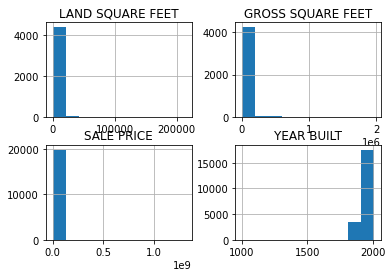

In [26]:
df_numerical.hist()

### <div class="alert alert-info">Drop the columns 'BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER'</div>

In [27]:
df_categorical = df_categorical.drop(["BOROUGH"], axis='columns')
df_categorical = df_categorical.drop(["APART MENT NUMBER", "EASE-MENT"], axis='columns')
df_categorical

NEIGHBORHOOD      BUILDING CLASS CATEGORY  \
4                         NaN  13CONDOS-ELEVATORAPARTMENTS   
5                         NaN  13CONDOS-ELEVATORAPARTMENTS   
6                         NaN  13CONDOS-ELEVATORAPARTMENTS   
7                         NaN  13CONDOS-ELEVATORAPARTMENTS   
8                         NaN  13CONDOS-ELEVATORAPARTMENTS   
...                       ...                          ...   
27394  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   
27395  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   
27396  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   
27397  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   
27398  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   

      TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT            ADDRESS  \
4                      NaN                       NaN  345WEST14THSTREET   
5                      NaN                       NaN  345WEST14THSTREET   
6                      NaN                       NaN  345WEST14THSTREET   
7                      NaN                       NaN  345WEST14THSTREET   
8                      NaN                       NaN  345WEST14THSTREET   
...                    ...                       ...                ...   
27394                    4                        V1   44FAIRVIEWAVENUE   
27395                    4                        V1      BENNETTAVENUE   
27396                    4                        V1      BENNETTAVENUE   
27397                    4                        V1      N/AMAGAWPLACE   
27398                    4                        V1         MAGAWPLACE   

      BUILDING CLASS AT TIME OF SALE TAX CLASS AT TIME OF SALE BLOCK ZIP CODE  \
4                                 R4                         2   738    10014   
5                                 R4                         2   738    10014   
6                                 R4                         2   738    10014   
7                                 R4                         2   738    10014   
8                                 R4                         2   738    10014   
...                              ...                       ...   ...      ...   
27394                             V1                         4  2170    10040   
27395                             V1                         4  2180    10033   
27396                             V1                         4  2180    10033   
27397                             V1                         4  2180    10033   
27398                             V1                         4  2180    10033   

        LOT RESIDENTIAL UNITS COMMERCIAL UNITS TOTAL UNITS  SALE DATE  
4      1306               NaN              NaN         NaN 2013-05-20  
5      1307               NaN              NaN         NaN 2013-05-16  
6      1308               NaN              NaN         NaN 2013-05-23  
7      1309               NaN              NaN         NaN 2013-05-15  
8      1310               NaN              NaN         NaN 2013-05-13  
...     ...               ...              ...         ...        ...  
27394   400               NaN              NaN         NaN 2013-04-29  
27395    75               NaN              NaN         NaN 2013-06-26  
27396    75               NaN              NaN         NaN 2013-02-04  
27397    76               NaN              NaN         NaN 2013-06-26  
27398    76               NaN              NaN         NaN 2013-02-04  

[27395 rows x 14 columns]

### <div class="alert alert-info">Drop duplicates if any</div>

In [28]:
df_categorical = df_categorical.drop_duplicates(keep = False)
df_numerical = df_numerical.drop_duplicates(keep = False)

In [29]:
df_categorical

NEIGHBORHOOD      BUILDING CLASS CATEGORY  \
4                         NaN  13CONDOS-ELEVATORAPARTMENTS   
5                         NaN  13CONDOS-ELEVATORAPARTMENTS   
6                         NaN  13CONDOS-ELEVATORAPARTMENTS   
7                         NaN  13CONDOS-ELEVATORAPARTMENTS   
8                         NaN  13CONDOS-ELEVATORAPARTMENTS   
...                       ...                          ...   
27394  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   
27395  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   
27396  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   
27397  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   
27398  WASHINGTONHEIGHTSUPPER       31COMMERCIALVACANTLAND   

      TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT            ADDRESS  \
4                      NaN                       NaN  345WEST14THSTREET   
5                      NaN                       NaN  345WEST14THSTREET   
6                      NaN                       NaN  345WEST14THSTREET   
7                      NaN                       NaN  345WEST14THSTREET   
8                      NaN                       NaN  345WEST14THSTREET   
...                    ...                       ...                ...   
27394                    4                        V1   44FAIRVIEWAVENUE   
27395                    4                        V1      BENNETTAVENUE   
27396                    4                        V1      BENNETTAVENUE   
27397                    4                        V1      N/AMAGAWPLACE   
27398                    4                        V1         MAGAWPLACE   

      BUILDING CLASS AT TIME OF SALE TAX CLASS AT TIME OF SALE BLOCK ZIP CODE  \
4                                 R4                         2   738    10014   
5                                 R4                         2   738    10014   
6                                 R4                         2   738    10014   
7                                 R4                         2   738    10014   
8                                 R4                         2   738    10014   
...                              ...                       ...   ...      ...   
27394                             V1                         4  2170    10040   
27395                             V1                         4  2180    10033   
27396                             V1                         4  2180    10033   
27397                             V1                         4  2180    10033   
27398                             V1                         4  2180    10033   

        LOT RESIDENTIAL UNITS COMMERCIAL UNITS TOTAL UNITS  SALE DATE  
4      1306               NaN              NaN         NaN 2013-05-20  
5      1307               NaN              NaN         NaN 2013-05-16  
6      1308               NaN              NaN         NaN 2013-05-23  
7      1309               NaN              NaN         NaN 2013-05-15  
8      1310               NaN              NaN         NaN 2013-05-13  
...     ...               ...              ...         ...        ...  
27394   400               NaN              NaN         NaN 2013-04-29  
27395    75               NaN              NaN         NaN 2013-06-26  
27396    75               NaN              NaN         NaN 2013-02-04  
27397    76               NaN              NaN         NaN 2013-06-26  
27398    76               NaN              NaN         NaN 2013-02-04  

[23158 rows x 14 columns]

In [30]:
df_numerical

LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE  YEAR BUILT
5                   NaN                NaN   1654656.0         NaN
6                   NaN                NaN   1069162.0         NaN
7                   NaN                NaN   1374637.0         NaN
8                   NaN                NaN   1649565.0         NaN
9                   NaN                NaN   1705568.0         NaN
...                 ...                ...         ...         ...
27391            3100.0                NaN    690000.0         NaN
27393            1582.0                NaN    185000.0         NaN
27394           16217.0                NaN         NaN         NaN
27395            4150.0                NaN    495000.0         NaN
27396            4150.0                NaN         NaN         NaN

[12899 rows x 4 columns]

### <div class="alert alert-info">Drop rows with NaN values</div>

In [31]:
df_categorical = df_categorical.dropna()
df_numerical = df_numerical.dropna()

In [32]:
df_categorical

NEIGHBORHOOD       BUILDING CLASS CATEGORY  \
24               ALPHABETCITY    07RENTALS-WALKUPAPARTMENTS   
28               ALPHABETCITY    07RENTALS-WALKUPAPARTMENTS   
30               ALPHABETCITY    07RENTALS-WALKUPAPARTMENTS   
31               ALPHABETCITY    07RENTALS-WALKUPAPARTMENTS   
32               ALPHABETCITY    07RENTALS-WALKUPAPARTMENTS   
...                       ...                           ...   
27063  WASHINGTONHEIGHTSUPPER    07RENTALS-WALKUPAPARTMENTS   
27064  WASHINGTONHEIGHTSUPPER  08RENTALS-ELEVATORAPARTMENTS   
27067  WASHINGTONHEIGHTSUPPER  08RENTALS-ELEVATORAPARTMENTS   
27068  WASHINGTONHEIGHTSUPPER  08RENTALS-ELEVATORAPARTMENTS   
27071  WASHINGTONHEIGHTSUPPER  08RENTALS-ELEVATORAPARTMENTS   

      TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT           ADDRESS  \
24                      2B                        C7  303EAST4THSTREET   
28                      2B                        C7         17AVENUEB   
30                       2                        C7         14AVENUEB   
31                      2B                        C7  174EAST2NDSTREET   
32                      2B                        C7  174EAST2NDSTREET   
...                    ...                       ...               ...   
27063                    2                        C7      4321BROADWAY   
27064                    2                        D7  440AUDUBONAVENUE   
27067                    2                        D7    100ARDENSTREET   
27068                    2                        D7      4720BROADWAY   
27071                    2                        D7      4441BROADWAY   

      BUILDING CLASS AT TIME OF SALE TAX CLASS AT TIME OF SALE BLOCK ZIP CODE  \
24                                C7                         2   374    10009   
28                                C7                         2   385    10009   
30                                C7                         2   397    10009   
31                                C7                         2   398    10009   
32                                C7                         2   398    10009   
...                              ...                       ...   ...      ...   
27063                             C7                         2  2180    10033   
27064                             D7                         2  2158    10040   
27067                             D7                         2  2175    10040   
27068                             D7                         2  2175    10040   
27071                             D7                         2  2180    10040   

       LOT RESIDENTIAL UNITS COMMERCIAL UNITS TOTAL UNITS  SALE DATE  
24       1                 8                2          10 2013-05-02  
28       1                 7                1           8 2013-04-18  
30      33                25                2          27 2013-01-31  
31      52                 9                1          10 2013-07-01  
32      52                 9                1          10 2012-10-26  
...    ...               ...              ...         ...        ...  
27063  120                69                5          74 2013-11-04  
27064   16                68                3          71 2012-08-29  
27067   27                55                8          63 2012-03-12  
27068   33                50                2          52 2013-05-30  
27071  505                25                2          27 2013-05-14  

[728 rows x 14 columns]

In [33]:
df_numerical

LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE  YEAR BUILT
22               2381.0             3084.0   3150000.0      1899.0
25               2426.0             9345.0   3650000.0      1900.0
26               2726.0            13002.0    895250.0      1910.0
28               2093.0             5852.0       283.0      1997.0
29               2164.0             9071.0   3500000.0      1900.0
...                 ...                ...         ...         ...
27379            7900.0             6438.0   7300000.0      1925.0
27380           10000.0            20000.0   1500000.0      1991.0
27382           17275.0            34570.0   5183000.0      1927.0
27386           15000.0             2465.0  12000000.0      1971.0
27390           14980.0            46200.0   4917000.0      1929.0

[1879 rows x 4 columns]

### <div class="alert alert-info">Identify and remove outliers if any</div>

In [34]:
Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Remove outliers
df_numerical = df_numerical[~((df_numerical < (Q1 - 1.5 * IQR)) | (df_numerical > (Q3 + 1.5 * IQR))).any(axis=1)]


In [35]:
df_numerical

LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE  YEAR BUILT
22               2381.0             3084.0   3150000.0      1899.0
25               2426.0             9345.0   3650000.0      1900.0
26               2726.0            13002.0    895250.0      1910.0
28               2093.0             5852.0       283.0      1997.0
29               2164.0             9071.0   3500000.0      1900.0
...                 ...                ...         ...         ...
27378            4488.0             4991.0   2550000.0      1960.0
27379            7900.0             6438.0   7300000.0      1925.0
27380           10000.0            20000.0   1500000.0      1991.0
27386           15000.0             2465.0  12000000.0      1971.0
27390           14980.0            46200.0   4917000.0      1929.0

[1652 rows x 4 columns]

### <div class="alert alert-info">Show the shape of the resulting dataframe</div>

In [36]:
df_categorical.shape

(728, 14)

In [37]:
df_numerical.shape

(1652, 4)

### <div class="alert alert-info">Consider the log of the prices and normalise the data</div>

In [38]:
def normalize(df):
    # select numerical columns
    num_cols=df.select_dtypes(include=[np.number]).copy()
    df_norm=((num_cols-num_cols.min())/(num_cols.max()-num_cols.min()))
    return df_norm


In [39]:
df_numericalNormalized = normalize(df_numerical)

In [40]:
df_numericalNormalized

LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE  YEAR BUILT
22             0.124617           0.013454    0.178723    0.161765
25             0.127550           0.053853    0.207092    0.169118
26             0.147103           0.077451    0.050794    0.242647
28             0.105846           0.031315    0.000016    0.882353
29             0.110474           0.052085    0.198582    0.169118
...                 ...                ...         ...         ...
27378          0.261944           0.025759    0.144681    0.610294
27379          0.484325           0.035096    0.414184    0.352941
27380          0.621195           0.122606    0.085106    0.838235
27386          0.947077           0.009460    0.680851    0.691176
27390          0.945773           0.291665    0.278979    0.382353

[1652 rows x 4 columns]

## <font color=blue>2. Data Exploration</font>

### <div class="alert alert-info">Visualise the prices across neighborhood</div>

<font color= red> need to explan why add price at the end of categorical chart. why we do the index. how does join work </font>

In [41]:
df_numerical.index.names = ['Index']
df_categorical.index.names = ['Index']
extracted_col = df_numerical["SALE PRICE"]
df_price_neighbourhood = df_categorical.join(extracted_col)
df_price_neighbourhood.dropna(how='any', inplace=True)
df_price_neighbourhood

NEIGHBORHOOD       BUILDING CLASS CATEGORY  \
Index                                                         
28               ALPHABETCITY    07RENTALS-WALKUPAPARTMENTS   
30               ALPHABETCITY    07RENTALS-WALKUPAPARTMENTS   
34               ALPHABETCITY    07RENTALS-WALKUPAPARTMENTS   
35               ALPHABETCITY    07RENTALS-WALKUPAPARTMENTS   
36               ALPHABETCITY    07RENTALS-WALKUPAPARTMENTS   
...                       ...                           ...   
27061  WASHINGTONHEIGHTSUPPER    07RENTALS-WALKUPAPARTMENTS   
27063  WASHINGTONHEIGHTSUPPER    07RENTALS-WALKUPAPARTMENTS   
27064  WASHINGTONHEIGHTSUPPER  08RENTALS-ELEVATORAPARTMENTS   
27068  WASHINGTONHEIGHTSUPPER  08RENTALS-ELEVATORAPARTMENTS   
27071  WASHINGTONHEIGHTSUPPER  08RENTALS-ELEVATORAPARTMENTS   

      TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT                ADDRESS  \
Index                                                                         
28                      2B                        C7              17AVENUEB   
30                       2                        C7              14AVENUEB   
34                       2                        C7       170EAST2NDSTREET   
35                      2B                        C4       203EAST4THSTREET   
36                      2B                        C4       201EAST4THSTREET   
...                    ...                       ...                    ...   
27061                    2                        C7  500FTWASHINGTONAVENUE   
27063                    2                        C7           4321BROADWAY   
27064                    2                        D7       440AUDUBONAVENUE   
27068                    2                        D7           4720BROADWAY   
27071                    2                        D7           4441BROADWAY   

      BUILDING CLASS AT TIME OF SALE TAX CLASS AT TIME OF SALE BLOCK ZIP CODE  \
Index                                                                           
28                                C7                         2   385    10009   
30                                C7                         2   397    10009   
34                                C7                         2   398    10009   
35                                C4                         2   400    10009   
36                                C4                         2   400    10009   
...                              ...                       ...   ...      ...   
27061                             C7                         2  2180    10033   
27063                             C7                         2  2180    10033   
27064                             D7                         2  2158    10040   
27068                             D7                         2  2175    10040   
27071                             D7                         2  2180    10040   

       LOT RESIDENTIAL UNITS COMMERCIAL UNITS TOTAL UNITS  SALE DATE  \
Index                                                                  
28       1                 7                1           8 2013-04-18   
30      33                25                2          27 2013-01-31   
34      53                36                3          39 2012-10-26   
35      56                10                1          10 2013-09-04   
36      57                 9                1           9 2013-09-04   
...    ...               ...              ...         ...        ...   
27061   13                56                1          57 2013-03-22   
27063  120                69                5          74 2013-11-04   
27064   16                68                3          71 2012-08-29   
27068   33                50                2          52 2013-05-30   
27071  505                25                2          27 2013-05-14   

       SALE PRICE  
Index              
28          283.0  
30     13185684.0  
34      3810602.0  
35      7333333.0  
36      7333333.0  
...           ...  
27061   8620000.0 

In [42]:
df_neighbourhoodPrice = df_price_neighbourhood[['NEIGHBORHOOD', "SALE PRICE"]].copy()
df_neighbourhoodPrice

NEIGHBORHOOD  SALE PRICE
Index                                    
28               ALPHABETCITY       283.0
30               ALPHABETCITY  13185684.0
34               ALPHABETCITY   3810602.0
35               ALPHABETCITY   7333333.0
36               ALPHABETCITY   7333333.0
...                       ...         ...
27061  WASHINGTONHEIGHTSUPPER   8620000.0
27063  WASHINGTONHEIGHTSUPPER  11400000.0
27064  WASHINGTONHEIGHTSUPPER   7810000.0
27068  WASHINGTONHEIGHTSUPPER  11360000.0
27071  WASHINGTONHEIGHTSUPPER   3200000.0

[387 rows x 2 columns]

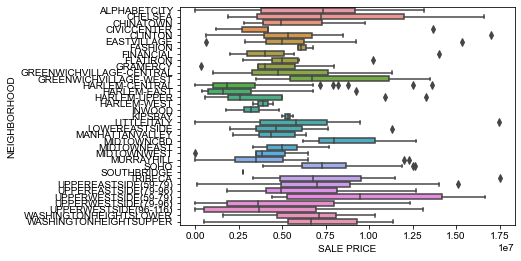

In [43]:
sns.boxplot(x="SALE PRICE", y="NEIGHBORHOOD", data= df_neighbourhoodPrice)
sns.set(rc={'figure.figsize':(60,60)})
plt.show()

### <div class="alert alert-info">Visualise the prices over time</div>

In [44]:
df_priceTime = df_price_neighbourhood[['SALE DATE', "SALE PRICE"]].copy()


In [45]:
df_priceTime

SALE DATE  SALE PRICE
Index                       
28    2013-04-18       283.0
30    2013-01-31  13185684.0
34    2012-10-26   3810602.0
35    2013-09-04   7333333.0
36    2013-09-04   7333333.0
...          ...         ...
27061 2013-03-22   8620000.0
27063 2013-11-04  11400000.0
27064 2012-08-29   7810000.0
27068 2013-05-30  11360000.0
27071 2013-05-14   3200000.0

[387 rows x 2 columns]

In [46]:
df_priceTime.sort_values(by='SALE DATE', inplace = True) 

In [47]:
df_priceTime

SALE DATE  SALE PRICE
Index                       
25248 2012-01-08  12375000.0
2128  2012-01-08    635000.0
6279  2012-01-08   1050000.0
26348 2012-01-10        10.0
3628  2012-01-10    318000.0
...          ...         ...
26344 2013-11-07  13100000.0
4905  2013-12-02   1050000.0
19436 2013-12-04    100000.0
1132  2013-12-07   8150000.0
27024 2013-12-07   6825000.0

[387 rows x 2 columns]

<AxesSubplot:xlabel='SALE DATE', ylabel='SALE PRICE'>

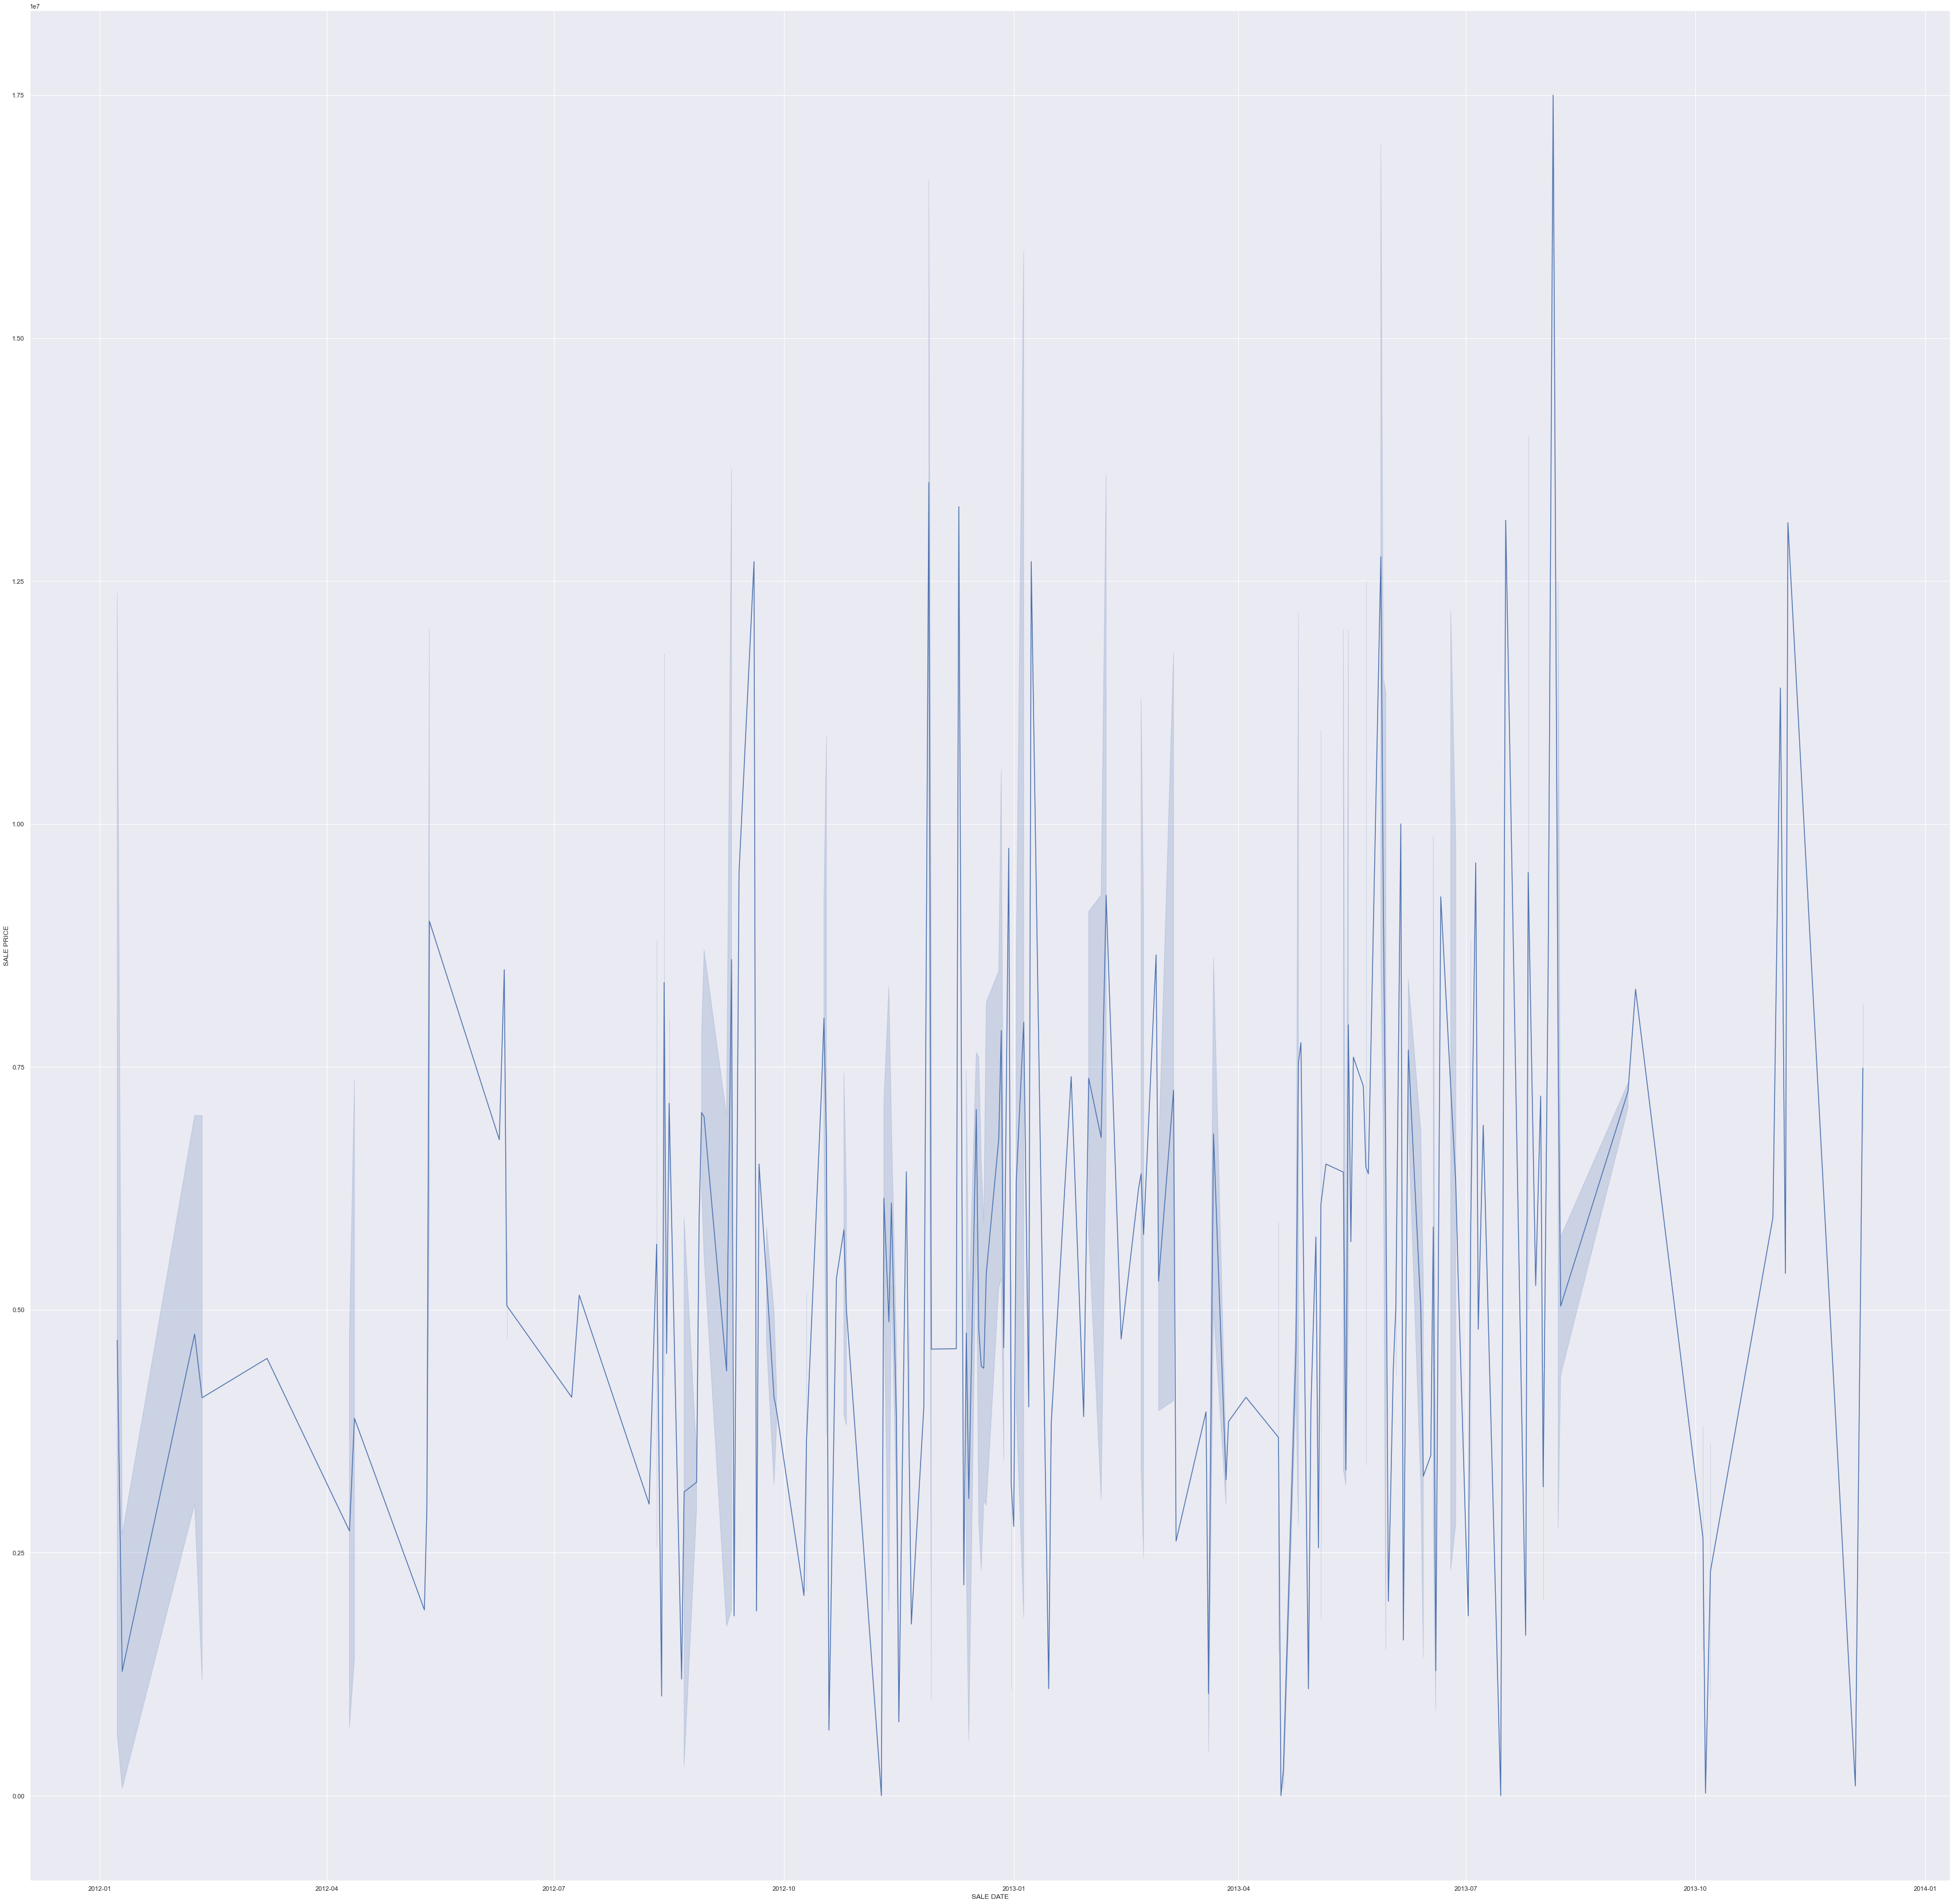

In [48]:
sns.lineplot(data=df_priceTime, x="SALE DATE", y="SALE PRICE")



In [49]:
df_priceTimeAge = df_numerical[['YEAR BUILT', "SALE PRICE"]].copy()
df_priceTimeAge

YEAR BUILT  SALE PRICE
Index                        
22         1899.0   3150000.0
25         1900.0   3650000.0
26         1910.0    895250.0
28         1997.0       283.0
29         1900.0   3500000.0
...           ...         ...
27378      1960.0   2550000.0
27379      1925.0   7300000.0
27380      1991.0   1500000.0
27386      1971.0  12000000.0
27390      1929.0   4917000.0

[1652 rows x 2 columns]

In [50]:
df_priceTimeAge.sort_values(by='YEAR BUILT', inplace = True)

In [51]:
df_priceTimeAge

YEAR BUILT  SALE PRICE
Index                        
996        1877.0  10405882.0
16363      1880.0  15190000.0
25220      1880.0   5400000.0
6793       1890.0   2550000.0
6458       1890.0    775000.0
...           ...         ...
6546       2009.0   2200000.0
6553       2010.0   9269000.0
6496       2010.0   5000000.0
5683       2010.0    999995.0
163        2013.0         2.0

[1652 rows x 2 columns]

<AxesSubplot:xlabel='YEAR BUILT', ylabel='SALE PRICE'>

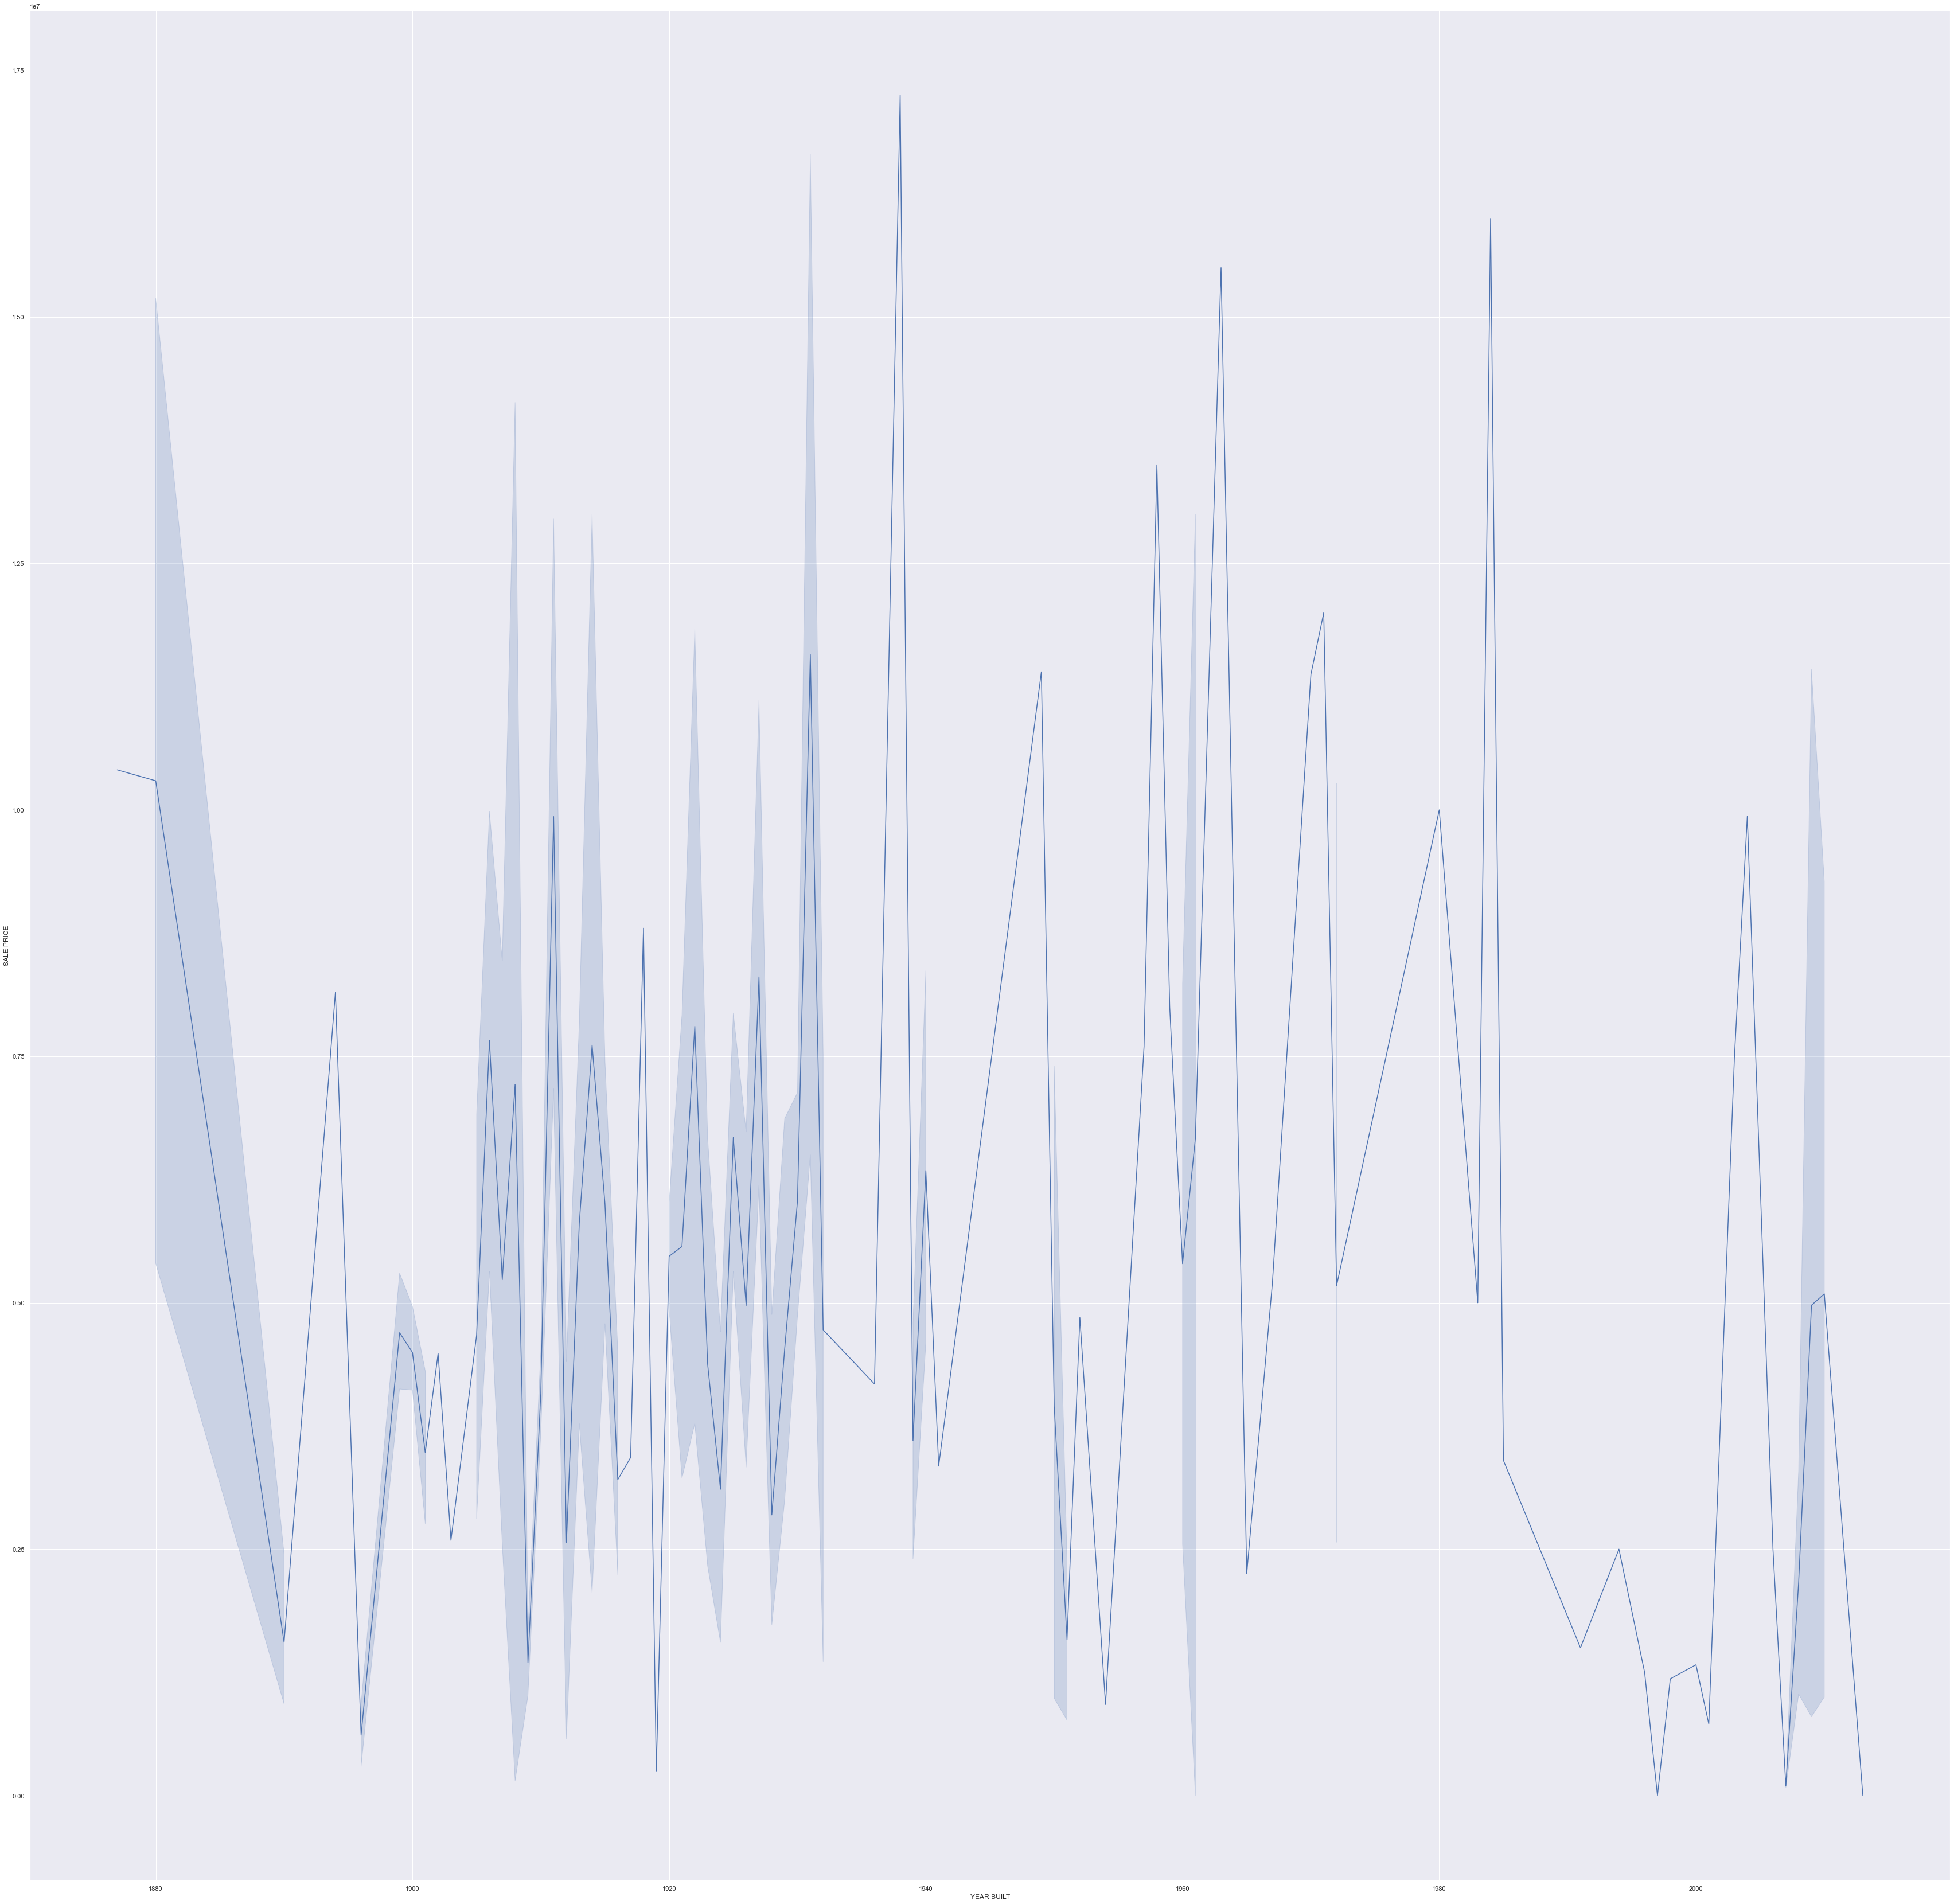

In [52]:
sns.lineplot(data=df_priceTimeAge, x="YEAR BUILT", y="SALE PRICE")

### <div class="alert alert-info">Show the scatter matrix plot and the correlation matrix</div>

In [53]:
df_neighbourhoodPrice

NEIGHBORHOOD  SALE PRICE
Index                                    
28               ALPHABETCITY       283.0
30               ALPHABETCITY  13185684.0
34               ALPHABETCITY   3810602.0
35               ALPHABETCITY   7333333.0
36               ALPHABETCITY   7333333.0
...                       ...         ...
27061  WASHINGTONHEIGHTSUPPER   8620000.0
27063  WASHINGTONHEIGHTSUPPER  11400000.0
27064  WASHINGTONHEIGHTSUPPER   7810000.0
27068  WASHINGTONHEIGHTSUPPER  11360000.0
27071  WASHINGTONHEIGHTSUPPER   3200000.0

[387 rows x 2 columns]

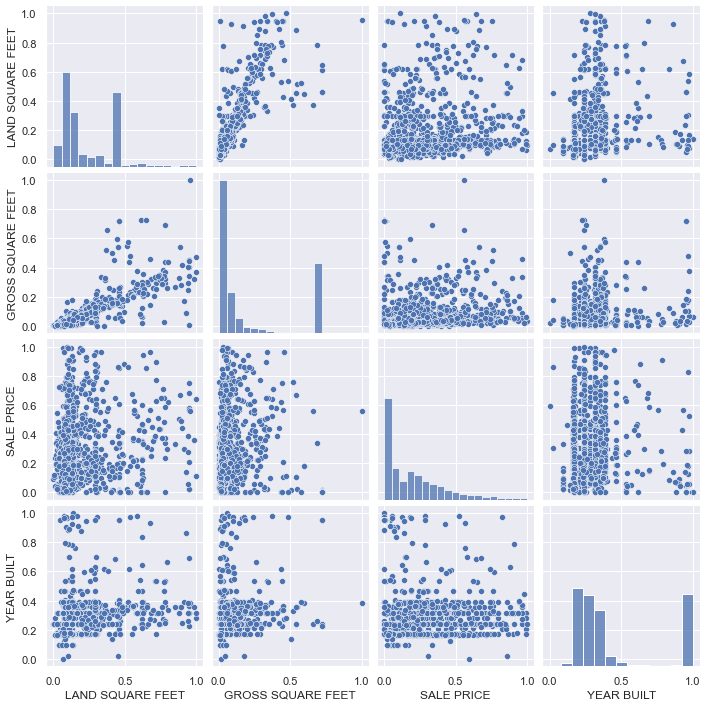

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'x', 'y', and 'z'
# If not, create a sample DataFrame
data = df_numericalNormalized

df = pd.DataFrame(data)

# Plotting the scatter matrix
sns.pairplot(df)
plt.show()

# Plotting the correlation matrix
correlation_matrix = df.corr()
plt.show()

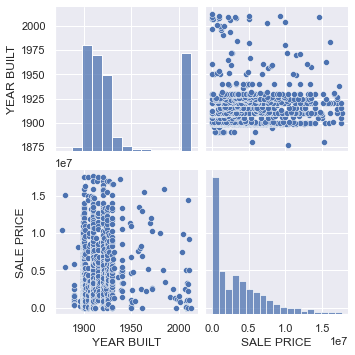

In [55]:

# Assuming you have a DataFrame named df with columns 'x', 'y', and 'z'
# If not, create a sample DataFrame
data = df_priceTimeAge

df = pd.DataFrame(data)

# Plotting the scatter matrix
sns.pairplot(df)
plt.show()

# Plotting the correlation matrix
correlation_matrix = df.corr()
plt.show()

regration plot

### <div class="alert alert-info">Any further plots, which demonstrate your understanding of the data</div>

<font color='red'>
    Please read the following information before continue, thank you</font><font color='green'>We think that for this data, especially neighborhoodPrice, looking at the boxplot alone is not very intuitive. And for housing prices, people will also focus on the mode, but the above-mentioned plot methods do not reflect this. So we decided to introduce violin plot and swarms plot. In order to make the data more intuitive, we decided to put swarms plot&violin plot or boxplot together. In this way, we can intuitively see what the general house price is on each street.</font>

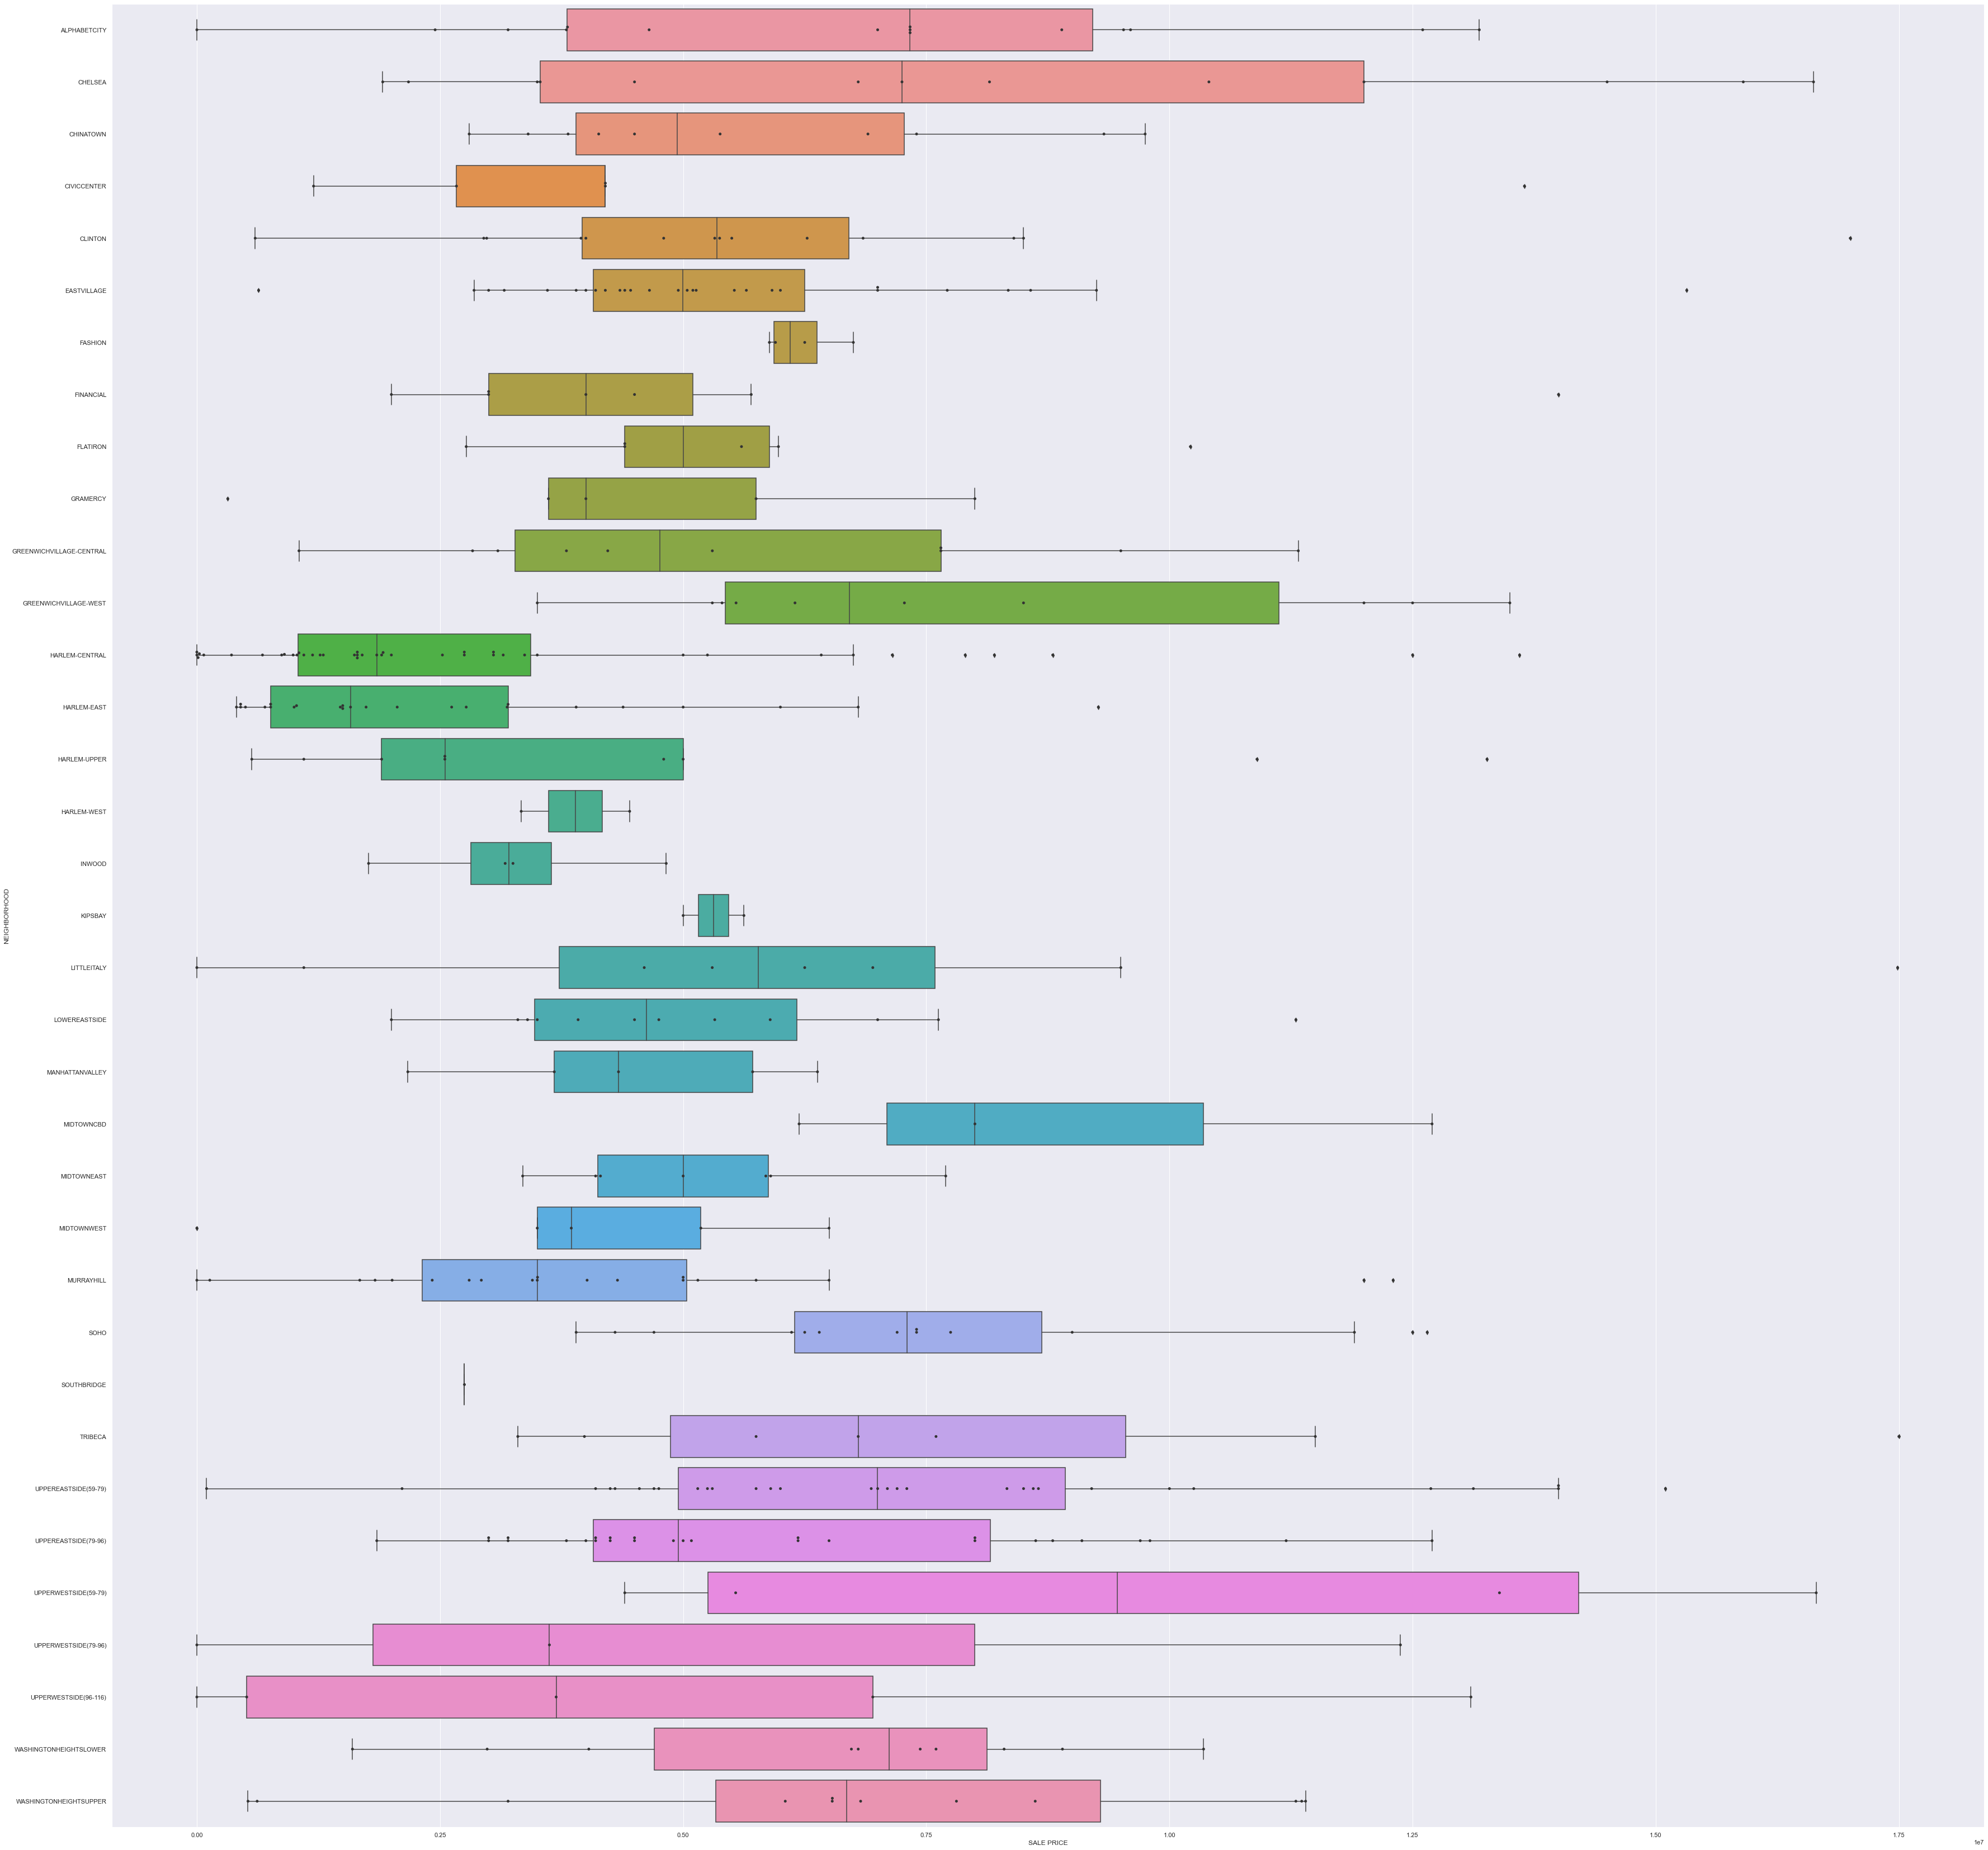

In [56]:
sns.boxplot(x="SALE PRICE", y="NEIGHBORHOOD", data= df_neighbourhoodPrice)
sns.swarmplot(x="SALE PRICE", y="NEIGHBORHOOD", data=df_neighbourhoodPrice, color=".2")
sns.set(rc={'figure.figsize':(60,60)})
plt.show()

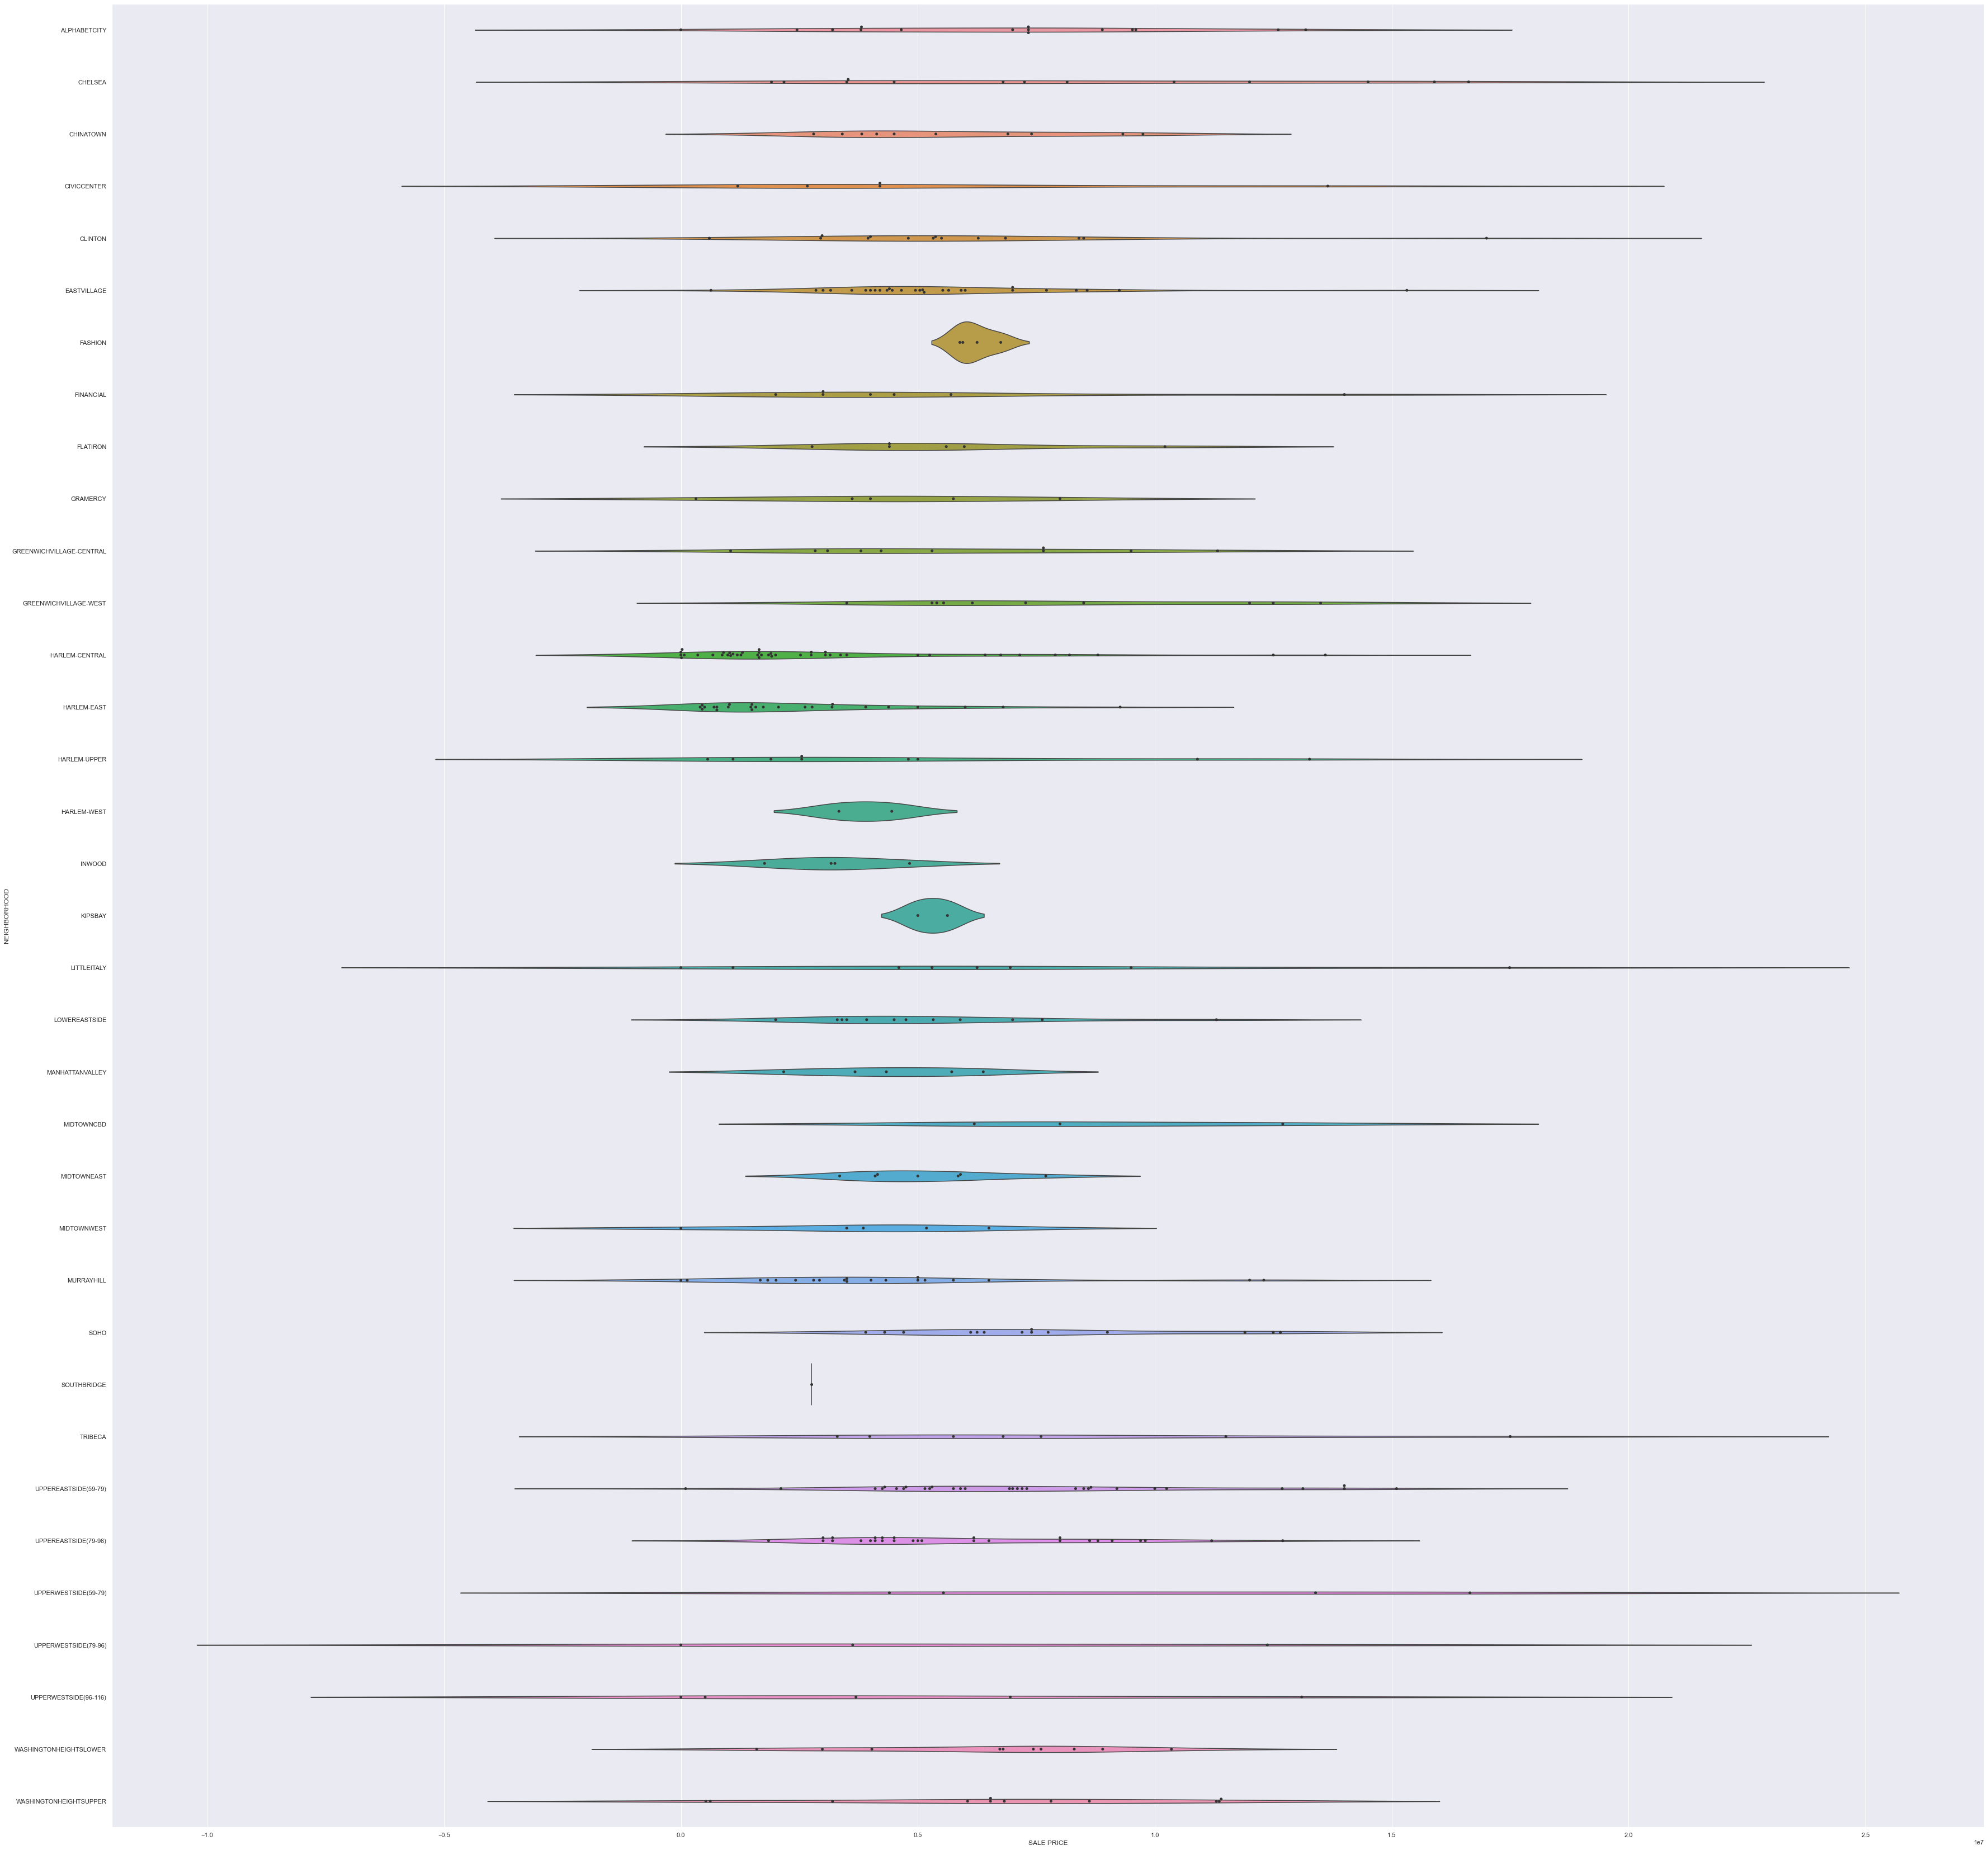

In [57]:
sns.violinplot(x="SALE PRICE", y="NEIGHBORHOOD", data= df_neighbourhoodPrice, inner=None)
sns.swarmplot(x="SALE PRICE", y="NEIGHBORHOOD", data=df_neighbourhoodPrice, color=".2")
sns.set(rc={'figure.figsize':(60,60)})
plt.show()

## <font color=blue>3.Model building</font>

### <div class="alert alert-info">Select the predictors that would have impact in predicting house prices.</div>

In [58]:
df_numerical

LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE  YEAR BUILT
Index                                                             
22               2381.0             3084.0   3150000.0      1899.0
25               2426.0             9345.0   3650000.0      1900.0
26               2726.0            13002.0    895250.0      1910.0
28               2093.0             5852.0       283.0      1997.0
29               2164.0             9071.0   3500000.0      1900.0
...                 ...                ...         ...         ...
27378            4488.0             4991.0   2550000.0      1960.0
27379            7900.0             6438.0   7300000.0      1925.0
27380           10000.0            20000.0   1500000.0      1991.0
27386           15000.0             2465.0  12000000.0      1971.0
27390           14980.0            46200.0   4917000.0      1929.0

[1652 rows x 4 columns]

In [59]:
df_categorical

NEIGHBORHOOD       BUILDING CLASS CATEGORY  \
Index                                                         
24               ALPHABETCITY    07RENTALS-WALKUPAPARTMENTS   
28               ALPHABETCITY    07RENTALS-WALKUPAPARTMENTS   
30               ALPHABETCITY    07RENTALS-WALKUPAPARTMENTS   
31               ALPHABETCITY    07RENTALS-WALKUPAPARTMENTS   
32               ALPHABETCITY    07RENTALS-WALKUPAPARTMENTS   
...                       ...                           ...   
27063  WASHINGTONHEIGHTSUPPER    07RENTALS-WALKUPAPARTMENTS   
27064  WASHINGTONHEIGHTSUPPER  08RENTALS-ELEVATORAPARTMENTS   
27067  WASHINGTONHEIGHTSUPPER  08RENTALS-ELEVATORAPARTMENTS   
27068  WASHINGTONHEIGHTSUPPER  08RENTALS-ELEVATORAPARTMENTS   
27071  WASHINGTONHEIGHTSUPPER  08RENTALS-ELEVATORAPARTMENTS   

      TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT           ADDRESS  \
Index                                                                    
24                      2B                        C7  303EAST4THSTREET   
28                      2B                        C7         17AVENUEB   
30                       2                        C7         14AVENUEB   
31                      2B                        C7  174EAST2NDSTREET   
32                      2B                        C7  174EAST2NDSTREET   
...                    ...                       ...               ...   
27063                    2                        C7      4321BROADWAY   
27064                    2                        D7  440AUDUBONAVENUE   
27067                    2                        D7    100ARDENSTREET   
27068                    2                        D7      4720BROADWAY   
27071                    2                        D7      4441BROADWAY   

      BUILDING CLASS AT TIME OF SALE TAX CLASS AT TIME OF SALE BLOCK ZIP CODE  \
Index                                                                           
24                                C7                         2   374    10009   
28                                C7                         2   385    10009   
30                                C7                         2   397    10009   
31                                C7                         2   398    10009   
32                                C7                         2   398    10009   
...                              ...                       ...   ...      ...   
27063                             C7                         2  2180    10033   
27064                             D7                         2  2158    10040   
27067                             D7                         2  2175    10040   
27068                             D7                         2  2175    10040   
27071                             D7                         2  2180    10040   

       LOT RESIDENTIAL UNITS COMMERCIAL UNITS TOTAL UNITS  SALE DATE  
Index                                                                 
24       1                 8                2          10 2013-05-02  
28       1                 7                1           8 2013-04-18  
30      33                25                2          27 2013-01-31  
31      52                 9                1          10 2013-07-01  
32      52                 9                1          10 2012-10-26  
...    ...               ...              ...         ...        ...  
27063  120                69                5          74 2013-11-04  
27064   16                68                3          71 2012-08-29  
27067   27                55                8          63 2012-03-12  
27068   33                50                2          52 2013-05-30  
27071  505                25                2          27 2013-05-14  

[728 rows x 14 columns]

### <div class="alert alert-info">Build up a first linear model with appropriate predictors and evaluate it. Split the data into a training and test sets; build up the model; and then show a histogram of the residuals. Evaluate your model by using a cross-validation procedure.</div>

In [60]:
# Select the predictors (features) and the target variable (house prices)
# Replace 'feature_1', 'feature_2', etc. with the actual column names of your dataset
predictors = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT']
target = 'SALE PRICE'

X = df_numericalNormalized[predictors]
y = df_numericalNormalized[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model\
model = LinearRegression()
model.fit(X_train, y_train)
# Define the cross-validation procedure
k = 10  # The number of folds; you can change this value depending on your dataset size and problem complexity
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Use mean squared error as the scoring metric
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Evaluate the model using cross-validation
mse_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)

# Calculate the mean and standard deviation of the MSE scores
mse_mean = -np.mean(mse_scores)
mse_std = np.std(mse_scores)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate the R-squared value on the test set
r_squared = model.score(X_test, y_test)


print(f"R-squared value: {r_squared:.2f}")
print(f"Mean Squared Error (MSE) with {k}-fold cross-validation: {mse_mean:.2f} (+/- {mse_std:.2f})")

R-squared value: 0.25
Mean Squared Error (MSE) with 10-fold cross-validation: 0.04 (+/- 0.00)


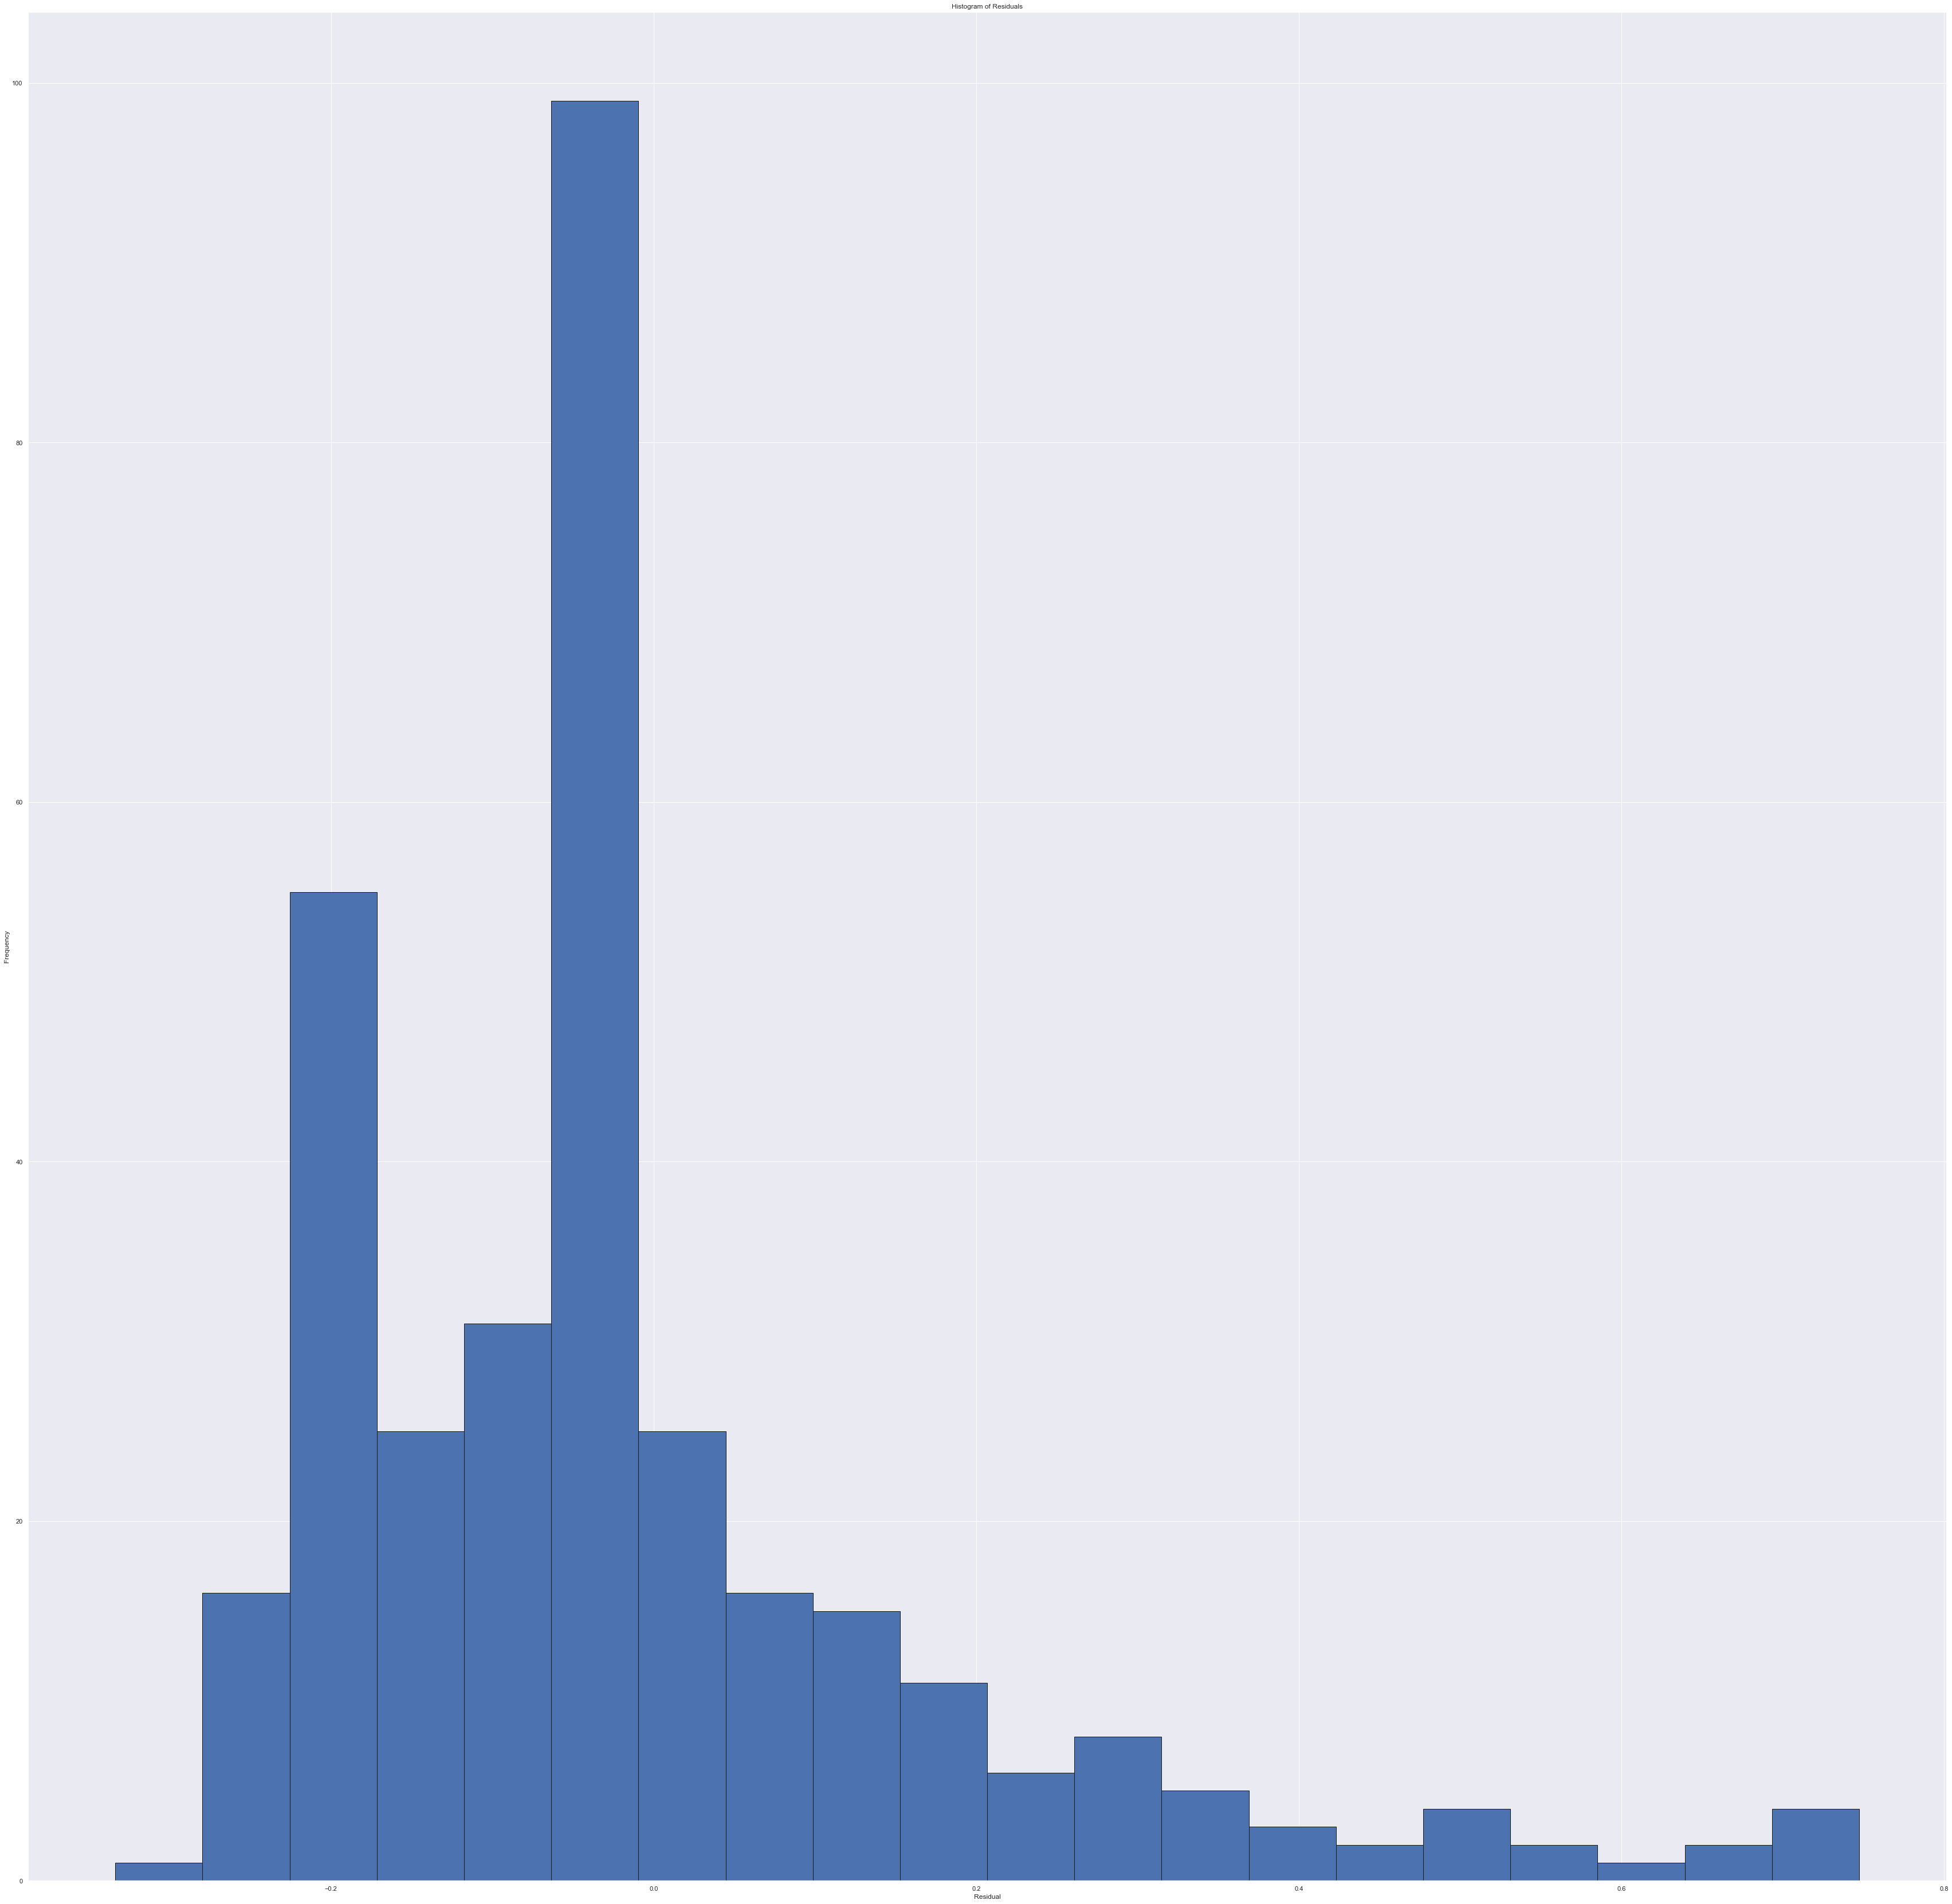

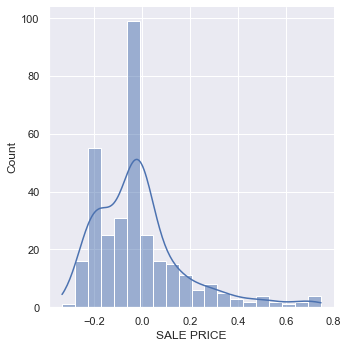

In [61]:
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Plot the histogram of the residuals
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
sns.displot(residuals, kde=True)
plt.show()

# <font color=green>Part 2 - Improved model</font>

### <div class="alert alert-warning">1. Consider the entire datasets given in this assignment. Develop an improved predictive model that predicts the sales prices of houses. Make sure to validate your model. You should aim for a model with a higher performance while using a maximum of data points. This implies treating missing values differently for example through imputation rather than dropping them.</div>

In [62]:
# this is the data using part one clean Data.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select the predictors (features) and the target variable (house prices)
predictors = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT']
target = 'SALE PRICE'

X = df_numericalNormalized[predictors]
y = df_numericalNormalized[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Calculate the R-squared value on the test set
r_squared = model.score(X_test, y_test)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared value: {r_squared:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


R-squared value: 0.36
Mean Squared Error (MSE): 0.03


## second trial of improved model

In [63]:
import pandas as pd
import numpy as np

In [64]:
df2 = pd.read_csv('Manhattan12.csv', encoding = "ISO-8859-1")

In [65]:
df2 = df2.drop(range(3))

In [66]:
new_header = df2.iloc[0] #grab the first row for the header
df2 = df2[1:] #take the data less the header row
df2.columns = new_header #set the header row as the df header

In [67]:
df2.columns = [x.replace("\n", " ") for x in df2.columns.to_list()]

In [68]:
df2.shape

(27395, 21)

In [69]:
df2_CouldDropNAN= df2[['NEIGHBORHOOD','BUILDING CLASS CATEGORY', "BUILDING CLASS AT PRESENT", "ADDRESS", "BUILDING CLASS AT TIME OF SALE",'ZIP CODE', "TOTAL UNITS",'YEAR BUILT','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE','SALE PRICE']]

In [70]:
df2_CouldDropNAN

NEIGHBORHOOD  \
4                                  
5                                  
6                                  
7                                  
8                                  
...                          ...   
27394  WASHINGTON HEIGHTS UPPER    
27395  WASHINGTON HEIGHTS UPPER    
27396  WASHINGTON HEIGHTS UPPER    
27397  WASHINGTON HEIGHTS UPPER    
27398  WASHINGTON HEIGHTS UPPER    

                            BUILDING CLASS CATEGORY BUILDING CLASS AT PRESENT  \
4      13  CONDOS - ELEVATOR APARTMENTS                                         
5      13  CONDOS - ELEVATOR APARTMENTS                                         
6      13  CONDOS - ELEVATOR APARTMENTS                                         
7      13  CONDOS - ELEVATOR APARTMENTS                                         
8      13  CONDOS - ELEVATOR APARTMENTS                                         
...                                             ...                       ...   
27394  31  COMMERCIAL VACANT LAND                                          V1   
27395  31  COMMERCIAL VACANT LAND                                          V1   
27396  31  COMMERCIAL VACANT LAND                                          V1   
27397  31  COMMERCIAL VACANT LAND                                          V1   
27398  31  COMMERCIAL VACANT LAND                                          V1   

                                           ADDRESS  \
4       345 WEST 14TH   STREET                       
5       345 WEST 14TH   STREET                       
6       345 WEST 14TH   STREET                       
7       345 WEST 14TH   STREET                       
8       345 WEST 14TH   STREET                       
...                                            ...   
27394   44 FAIRVIEW AVENUE                           
27395   BENNETT AVENUE                               
27396   BENNETT AVENUE                               
27397   N/A MAGAW PLACE                              
27398   MAGAW PLACE                                  

      BUILDING CLASS AT TIME OF SALE ZIP CODE TOTAL UNITS YEAR BUILT  \
4                                R4     10014           0          0   
5                                R4     10014           0          0   
6                                R4     10014           0          0   
7                                R4     10014           0          0   
8                                R4     10014           0          0   
...                              ...      ...         ...        ...   
27394                            V1     10040           0          0   
27395                            V1     10033           0          0   
27396                            V1     10033           0          0   
27397                            V1     10033           0          0   
27398                            V1     10033           0          0   

      TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  SALE PRICE  
4                            2                             R4   $2,214,693  
5                            2                             R4   $1,654,656  
6                            2                             R4   $1,069,162  
7                            2                             R4   $1,374,637  
8                            2                             R4   $1,649,565  
...                         ...                            ...         ...  
27394                        4                             V1           $0  
27395                        4                             V1     $495,000  
27396                        4                             V1           $0  
27397                        4                             V1           $0  
27398                        4                             V1           $0  

[27395 rows x 11 columns]

In [71]:
df2_CouldDropNAN = df2_CouldDropNAN.replace(',','', regex=True)

In [72]:
df2_CouldDropNAN["SALE PRICE"] = df2_CouldDropNAN["SALE PRICE"].replace({'\$':''}, regex = True)

In [73]:
df2_CouldDropNAN

NEIGHBORHOOD  \
4                                  
5                                  
6                                  
7                                  
8                                  
...                          ...   
27394  WASHINGTON HEIGHTS UPPER    
27395  WASHINGTON HEIGHTS UPPER    
27396  WASHINGTON HEIGHTS UPPER    
27397  WASHINGTON HEIGHTS UPPER    
27398  WASHINGTON HEIGHTS UPPER    

                            BUILDING CLASS CATEGORY BUILDING CLASS AT PRESENT  \
4      13  CONDOS - ELEVATOR APARTMENTS                                         
5      13  CONDOS - ELEVATOR APARTMENTS                                         
6      13  CONDOS - ELEVATOR APARTMENTS                                         
7      13  CONDOS - ELEVATOR APARTMENTS                                         
8      13  CONDOS - ELEVATOR APARTMENTS                                         
...                                             ...                       ...   
27394  31  COMMERCIAL VACANT LAND                                          V1   
27395  31  COMMERCIAL VACANT LAND                                          V1   
27396  31  COMMERCIAL VACANT LAND                                          V1   
27397  31  COMMERCIAL VACANT LAND                                          V1   
27398  31  COMMERCIAL VACANT LAND                                          V1   

                                           ADDRESS  \
4       345 WEST 14TH   STREET                       
5       345 WEST 14TH   STREET                       
6       345 WEST 14TH   STREET                       
7       345 WEST 14TH   STREET                       
8       345 WEST 14TH   STREET                       
...                                            ...   
27394   44 FAIRVIEW AVENUE                           
27395   BENNETT AVENUE                               
27396   BENNETT AVENUE                               
27397   N/A MAGAW PLACE                              
27398   MAGAW PLACE                                  

      BUILDING CLASS AT TIME OF SALE ZIP CODE TOTAL UNITS YEAR BUILT  \
4                                R4     10014           0          0   
5                                R4     10014           0          0   
6                                R4     10014           0          0   
7                                R4     10014           0          0   
8                                R4     10014           0          0   
...                              ...      ...         ...        ...   
27394                            V1     10040           0          0   
27395                            V1     10033           0          0   
27396                            V1     10033           0          0   
27397                            V1     10033           0          0   
27398                            V1     10033           0          0   

      TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE SALE PRICE  
4                            2                             R4     2214693  
5                            2                             R4     1654656  
6                            2                             R4     1069162  
7                            2                             R4     1374637  
8                            2                             R4     1649565  
...                         ...                            ...        ...  
27394                        4                             V1           0  
27395                        4                             V1      495000  
27396                        4                             V1           0  
27397                        4                             V1           0  
27398                        4                             V1           0  

[27395 rows x 11 columns]

In [74]:
df2_CouldDropNAN = df2_CouldDropNAN.replace(' ','', regex=True)

In [75]:
df2_CouldDropNAN = df2_CouldDropNAN.replace(r'^\s*$', np.nan, regex=True)

In [76]:
df2_CouldDropNAN = df2_CouldDropNAN.dropna()

In [77]:
df2_CouldDropNAN = df2_CouldDropNAN.drop_duplicates(keep = False)

In [78]:
df2_CouldDropNAN

NEIGHBORHOOD     BUILDING CLASS CATEGORY  \
22               ALPHABETCITY          03THREEFAMILYHOMES   
23               ALPHABETCITY           04TAXCLASS1CONDOS   
24               ALPHABETCITY  07RENTALS-WALKUPAPARTMENTS   
25               ALPHABETCITY  07RENTALS-WALKUPAPARTMENTS   
26               ALPHABETCITY  07RENTALS-WALKUPAPARTMENTS   
...                       ...                         ...   
27394  WASHINGTONHEIGHTSUPPER      31COMMERCIALVACANTLAND   
27395  WASHINGTONHEIGHTSUPPER      31COMMERCIALVACANTLAND   
27396  WASHINGTONHEIGHTSUPPER      31COMMERCIALVACANTLAND   
27397  WASHINGTONHEIGHTSUPPER      31COMMERCIALVACANTLAND   
27398  WASHINGTONHEIGHTSUPPER      31COMMERCIALVACANTLAND   

      BUILDING CLASS AT PRESENT               ADDRESS  \
22                           C0      243EAST7THSTREET   
23                           R6      238EAST4THSTREET   
24                           C7      303EAST4THSTREET   
25                           C4      715EAST5THSTREET   
26                           C4  274EASTSEVENTHSTREET   
...                         ...                   ...   
27394                        V1      44FAIRVIEWAVENUE   
27395                        V1         BENNETTAVENUE   
27396                        V1         BENNETTAVENUE   
27397                        V1         N/AMAGAWPLACE   
27398                        V1            MAGAWPLACE   

      BUILDING CLASS AT TIME OF SALE ZIP CODE TOTAL UNITS YEAR BUILT  \
22                                C0    10009           3       1899   
23                                R6    10009           1       1955   
24                                C7    10009          10       1900   
25                                C4    10009          20       1900   
26                                C4    10009          13       1910   
...                              ...      ...         ...        ...   
27394                             V1    10040           0          0   
27395                             V1    10033           0          0   
27396                             V1    10033           0          0   
27397                             V1    10033           0          0   
27398                             V1    10033           0          0   

      TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE SALE PRICE  
22                            1                             C0    3150000  
23                            1                             R6    3450000  
24                            2                             C7          0  
25                            2                             C4    3650000  
26                            2                             C4     895250  
...                         ...                            ...        ...  
27394                         4                             V1          0  
27395                         4                             V1     495000  
27396                         4                             V1          0  
27397                         4                             V1          0  
27398                         4                             V1          0  

[18700 rows x 11 columns]

In [79]:
df_numerical2 = df2_CouldDropNAN[['YEAR BUILT','SALE PRICE',"TOTAL UNITS"]]

In [80]:
df_numerical2 = df_numerical2.apply(pd.to_numeric, errors='coerce', axis=1)

In [81]:
df_numerical2 = df_numerical2.replace(0, np.nan)

In [82]:
df_numerical2 = df_numerical2.dropna()

In [83]:
df_numerical2

YEAR BUILT  SALE PRICE  TOTAL UNITS
22         1899.0   3150000.0          3.0
23         1955.0   3450000.0          1.0
25         1900.0   3650000.0         20.0
26         1910.0    895250.0         13.0
28         1997.0       283.0          8.0
...           ...         ...          ...
27380      1991.0   1500000.0          7.0
27382      1927.0   5183000.0          1.0
27383      2003.0     17842.0          1.0
27386      1971.0  12000000.0          1.0
27390      1929.0   4917000.0          2.0

[6317 rows x 3 columns]

In [84]:
df_categorical2 = df2_CouldDropNAN[['NEIGHBORHOOD','BUILDING CLASS CATEGORY', "BUILDING CLASS AT PRESENT", "ADDRESS", "BUILDING CLASS AT TIME OF SALE",'ZIP CODE','BUILDING CLASS AT TIME OF SALE']]

In [85]:
df_categorical2

NEIGHBORHOOD     BUILDING CLASS CATEGORY  \
22               ALPHABETCITY          03THREEFAMILYHOMES   
23               ALPHABETCITY           04TAXCLASS1CONDOS   
24               ALPHABETCITY  07RENTALS-WALKUPAPARTMENTS   
25               ALPHABETCITY  07RENTALS-WALKUPAPARTMENTS   
26               ALPHABETCITY  07RENTALS-WALKUPAPARTMENTS   
...                       ...                         ...   
27394  WASHINGTONHEIGHTSUPPER      31COMMERCIALVACANTLAND   
27395  WASHINGTONHEIGHTSUPPER      31COMMERCIALVACANTLAND   
27396  WASHINGTONHEIGHTSUPPER      31COMMERCIALVACANTLAND   
27397  WASHINGTONHEIGHTSUPPER      31COMMERCIALVACANTLAND   
27398  WASHINGTONHEIGHTSUPPER      31COMMERCIALVACANTLAND   

      BUILDING CLASS AT PRESENT               ADDRESS  \
22                           C0      243EAST7THSTREET   
23                           R6      238EAST4THSTREET   
24                           C7      303EAST4THSTREET   
25                           C4      715EAST5THSTREET   
26                           C4  274EASTSEVENTHSTREET   
...                         ...                   ...   
27394                        V1      44FAIRVIEWAVENUE   
27395                        V1         BENNETTAVENUE   
27396                        V1         BENNETTAVENUE   
27397                        V1         N/AMAGAWPLACE   
27398                        V1            MAGAWPLACE   

      BUILDING CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE ZIP CODE  \
22                                C0                             C0    10009   
23                                R6                             R6    10009   
24                                C7                             C7    10009   
25                                C4                             C4    10009   
26                                C4                             C4    10009   
...                              ...                            ...      ...   
27394                             V1                             V1    10040   
27395                             V1                             V1    10033   
27396                             V1                             V1    10033   
27397                             V1                             V1    10033   
27398                             V1                             V1    10033   

      BUILDING CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  
22                                C0                             C0  
23                                R6                             R6  
24                                C7                             C7  
25                                C4                             C4  
26                                C4                             C4  
...                              ...                            ...  
27394                             V1                             V1  
27395                             V1                             V1  
27396                             V1                             V1  
27397                             V1                             V1  
27398                             V1                             V1  

[18700 rows x 9 columns]

In [86]:
extracted_unit = df2[['RESIDENTIAL UNITS','COMMERCIAL UNITS']]

In [87]:
extracted_unit = extracted_unit.apply(pd.to_numeric, errors='coerce', axis=1)

In [88]:
df_numerical2WithUnit = df_numerical2.join(extracted_unit)

In [89]:
df_numerical2WithUnit

YEAR BUILT  SALE PRICE  TOTAL UNITS  RESIDENTIAL UNITS  \
22         1899.0   3150000.0          3.0                3.0   
23         1955.0   3450000.0          1.0                1.0   
25         1900.0   3650000.0         20.0               20.0   
26         1910.0    895250.0         13.0               13.0   
28         1997.0       283.0          8.0                7.0   
...           ...         ...          ...                ...   
27380      1991.0   1500000.0          7.0                0.0   
27382      1927.0   5183000.0          1.0                0.0   
27383      2003.0     17842.0          1.0                0.0   
27386      1971.0  12000000.0          1.0                0.0   
27390      1929.0   4917000.0          2.0                0.0   

       COMMERCIAL UNITS  
22                  0.0  
23                  0.0  
25                  0.0  
26                  0.0  
28                  1.0  
...                 ...  
27380               7.0  
27382               1.0  
27383               0.0  
27386               1.0  
27390               2.0  

[6317 rows x 5 columns]

In [90]:
extracted_SQF = df2[['LAND SQUARE FEET','GROSS SQUARE FEET']]
extracted_SQF

LAND SQUARE FEET GROSS SQUARE FEET
4                    0                 0
5                    0                 0
6                    0                 0
7                    0                 0
8                    0                 0
...                ...               ...
27394           16,217                 0
27395            4,150                 0
27396            4,150                 0
27397              760                 0
27398              760                 0

[27395 rows x 2 columns]

In [91]:
extracted_SQF = extracted_SQF.replace(',','', regex=True)

In [92]:
extracted_SQF = extracted_SQF.apply(pd.to_numeric, errors='coerce', axis=1)

In [93]:
extracted_SQF = extracted_SQF.replace(0, np.nan)

In [94]:
extracted_SQF = extracted_SQF.dropna()

In [95]:
extracted_SQF

LAND SQUARE FEET  GROSS SQUARE FEET
22               2381.0             3084.0
24               1501.0             6929.0
25               2426.0             9345.0
26               2726.0            13002.0
27               1775.0             7095.0
...                 ...                ...
27382           17275.0            34570.0
27384           17925.0             5226.0
27385           17925.0             5226.0
27386           15000.0             2465.0
27390           14980.0            46200.0

[4311 rows x 2 columns]

In [96]:
df_numerical2WithUnitSQF = extracted_SQF.join(df_numerical2WithUnit)

In [97]:
df_numerical2WithUnitSQF

LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  SALE PRICE  \
22               2381.0             3084.0      1899.0   3150000.0   
24               1501.0             6929.0         NaN         NaN   
25               2426.0             9345.0      1900.0   3650000.0   
26               2726.0            13002.0      1910.0    895250.0   
27               1775.0             7095.0         NaN         NaN   
...                 ...                ...         ...         ...   
27382           17275.0            34570.0      1927.0   5183000.0   
27384           17925.0             5226.0         NaN         NaN   
27385           17925.0             5226.0         NaN         NaN   
27386           15000.0             2465.0      1971.0  12000000.0   
27390           14980.0            46200.0      1929.0   4917000.0   

       TOTAL UNITS  RESIDENTIAL UNITS  COMMERCIAL UNITS  
22             3.0                3.0               0.0  
24             NaN                NaN               NaN  
25            20.0               20.0               0.0  
26            13.0               13.0               0.0  
27             NaN                NaN               NaN  
...            ...                ...               ...  
27382          1.0                0.0               1.0  
27384          NaN                NaN               NaN  
27385          NaN                NaN               NaN  
27386          1.0                0.0               1.0  
27390          2.0                0.0               2.0  

[4311 rows x 7 columns]

In [98]:
df_numerical2WithUnitSQF = df_numerical2WithUnitSQF.dropna()
df_numerical2WithUnitSQF# all possible numerical data

LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  SALE PRICE  \
22               2381.0             3084.0      1899.0   3150000.0   
25               2426.0             9345.0      1900.0   3650000.0   
26               2726.0            13002.0      1910.0    895250.0   
28               2093.0             5852.0      1997.0       283.0   
29               2164.0             9071.0      1900.0   3500000.0   
...                 ...                ...         ...         ...   
27379            7900.0             6438.0      1925.0   7300000.0   
27380           10000.0            20000.0      1991.0   1500000.0   
27382           17275.0            34570.0      1927.0   5183000.0   
27386           15000.0             2465.0      1971.0  12000000.0   
27390           14980.0            46200.0      1929.0   4917000.0   

       TOTAL UNITS  RESIDENTIAL UNITS  COMMERCIAL UNITS  
22             3.0                3.0               0.0  
25            20.0               20.0               0.0  
26            13.0               13.0               0.0  
28             8.0                7.0               1.0  
29            17.0               17.0               0.0  
...            ...                ...               ...  
27379          4.0                0.0               4.0  
27380          7.0                0.0               7.0  
27382          1.0                0.0               1.0  
27386          1.0                0.0               1.0  
27390          2.0                0.0               2.0  

[1934 rows x 7 columns]

In [99]:
df_numerical2WithUnit#the numerical data without 'LAND SQUARE FEET','GROSS SQUARE FEET'

YEAR BUILT  SALE PRICE  TOTAL UNITS  RESIDENTIAL UNITS  \
22         1899.0   3150000.0          3.0                3.0   
23         1955.0   3450000.0          1.0                1.0   
25         1900.0   3650000.0         20.0               20.0   
26         1910.0    895250.0         13.0               13.0   
28         1997.0       283.0          8.0                7.0   
...           ...         ...          ...                ...   
27380      1991.0   1500000.0          7.0                0.0   
27382      1927.0   5183000.0          1.0                0.0   
27383      2003.0     17842.0          1.0                0.0   
27386      1971.0  12000000.0          1.0                0.0   
27390      1929.0   4917000.0          2.0                0.0   

       COMMERCIAL UNITS  
22                  0.0  
23                  0.0  
25                  0.0  
26                  0.0  
28                  1.0  
...                 ...  
27380               7.0  
27382               1.0  
27383               0.0  
27386               1.0  
27390               2.0  

[6317 rows x 5 columns]

In [100]:
df_numerical2WithUnitSQF.describe()

LAND SQUARE FEET  GROSS SQUARE FEET   YEAR BUILT    SALE PRICE  \
count       1934.000000        1934.000000  1934.000000  1.934000e+03   
mean        5742.845398       47115.020165  1936.537746  1.152660e+07   
std         9407.431989       76733.700681    42.301548  4.541345e+07   
min          469.000000         999.000000  1800.000000  1.000000e+00   
25%         1943.250000        5034.000000  1906.000000  1.988418e+05   
50%         3000.000000       11367.000000  1920.000000  3.239000e+06   
75%         7532.000000      112850.000000  1982.750000  7.104125e+06   
max       213650.000000      940000.000000  2013.000000  1.100000e+09   

       TOTAL UNITS  RESIDENTIAL UNITS  COMMERCIAL UNITS  
count  1934.000000        1934.000000       1934.000000  
mean     13.144778          11.037229          2.114271  
std      29.502019          28.880772          6.789715  
min       1.000000           0.000000          0.000000  
25%       2.000000           0.000000          0.000000  
50%       4.000000           2.000000          1.000000  
75%      14.000000          11.000000          2.000000  
max     550.000000         538.000000        150.000000

In [101]:
df_numerical2WithUnit.describe()

YEAR BUILT    SALE PRICE  TOTAL UNITS  RESIDENTIAL UNITS  \
count  6317.000000  6.317000e+03  6317.000000        6317.000000   
mean   1959.977521  5.236996e+06     4.922748           4.252177   
std      42.324613  3.166535e+07    20.807071          20.306273   
min    1800.000000  1.000000e+00     1.000000           0.000000   
25%    1916.000000  6.950000e+05     1.000000           1.000000   
50%    1974.000000  1.325000e+06     1.000000           1.000000   
75%    2005.000000  3.024500e+06     2.000000           1.000000   
max    2013.000000  1.307965e+09   904.000000         904.000000   

       COMMERCIAL UNITS  
count       6317.000000  
mean           0.662815  
std            3.881391  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max          150.000000

In [102]:
Q1 = df_numerical2WithUnit.quantile(0.25)
Q3 = df_numerical2WithUnit.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Remove outliers
df_numerical2WithUnit1 = df_numerical2WithUnit[~((df_numerical2WithUnit < (Q1 - 1.5 * IQR)) | (df_numerical2WithUnit > (Q3 + 1.5 * IQR))).any(axis=1)]

In [103]:
df_numerical2WithUnit1

YEAR BUILT  SALE PRICE  TOTAL UNITS  RESIDENTIAL UNITS  \
23         1955.0   3450000.0          1.0                1.0   
125        2005.0    975000.0          1.0                1.0   
126        2005.0    560000.0          1.0                1.0   
130        1928.0    850000.0          1.0                1.0   
131        1928.0    750000.0          1.0                1.0   
...           ...         ...          ...                ...   
27369      2002.0    810000.0          1.0                1.0   
27370      2002.0    612999.0          1.0                1.0   
27371      2003.0    590000.0          1.0                1.0   
27372      2003.0    520000.0          1.0                1.0   
27374      2003.0        10.0          1.0                1.0   

       COMMERCIAL UNITS  
23                  0.0  
125                 0.0  
126                 0.0  
130                 0.0  
131                 0.0  
...                 ...  
27369               0.0  
27370               0.0  
27371               0.0  
27372               0.0  
27374               0.0  

[4191 rows x 5 columns]

In [104]:
Q1S = df_numerical2WithUnitSQF.quantile(0.25)
Q3S = df_numerical2WithUnitSQF.quantile(0.75)

# Calculate the interquartile range (IQR)
IQRS = Q3S - Q1S

# Remove outliers
df_numerical2WithUnitSQF = df_numerical2WithUnitSQF[~((df_numerical2WithUnitSQF < (Q1S - 1.5 * IQRS)) | (df_numerical2WithUnitSQF > (Q3S + 1.5 * IQRS))).any(axis=1)]

In [105]:
def normalize1(df):
    # select numerical columns
    num_cols=df.select_dtypes(include=[np.number]).copy()
    df_norm=((num_cols-num_cols.min())/(num_cols.max()-num_cols.min()))
    return df_norm

In [106]:
df_numerical2WithUnitNOR = normalize1(df_numerical2WithUnit)
df_numerical2WithUnitNOR

YEAR BUILT    SALE PRICE  TOTAL UNITS  RESIDENTIAL UNITS  \
22       0.464789  2.408320e-03     0.002215           0.003319   
23       0.727700  2.637684e-03     0.000000           0.001106   
25       0.469484  2.790594e-03     0.021041           0.022124   
26       0.516432  6.844594e-04     0.013289           0.014381   
28       0.924883  2.156021e-07     0.007752           0.007743   
...           ...           ...          ...                ...   
27380    0.896714  1.146819e-03     0.006645           0.000000   
27382    0.596244  3.962643e-03     0.000000           0.000000   
27383    0.953052  1.364027e-05     0.000000           0.000000   
27386    0.802817  9.174556e-03     0.000000           0.000000   
27390    0.605634  3.759274e-03     0.001107           0.000000   

       COMMERCIAL UNITS  
22             0.000000  
23             0.000000  
25             0.000000  
26             0.000000  
28             0.006667  
...                 ...  
27380          0.046667  
27382          0.006667  
27383          0.000000  
27386          0.006667  
27390          0.013333  

[6317 rows x 5 columns]

In [107]:
df_numerical2WithUnitSQFNOR = normalize1(df_numerical2WithUnitSQF)
df_numerical2WithUnitSQFNOR

LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  SALE PRICE  \
22             0.131581           0.018641    0.464789    0.182609   
25             0.134678           0.074617    0.469484    0.211594   
26             0.155323           0.107312    0.516432    0.051898   
28             0.111761           0.043388    0.924883    0.000016   
29             0.116647           0.072167    0.469484    0.202899   
...                 ...                ...         ...         ...   
27377          0.144932           0.052087    0.661972    0.193797   
27378          0.276581           0.035690    0.751174    0.147826   
27379          0.511389           0.048627    0.586854    0.423188   
27386          1.000000           0.013107    0.802817    0.695652   
27390          0.998624           0.404118    0.605634    0.285043   

       TOTAL UNITS  RESIDENTIAL UNITS  COMMERCIAL UNITS  
22        0.066667           0.111111               0.0  
25        0.633333           0.740741               0.0  
26        0.400000           0.481481               0.0  
28        0.233333           0.259259               0.2  
29        0.533333           0.629630               0.0  
...            ...                ...               ...  
27377     0.000000           0.000000               0.2  
27378     0.100000           0.000000               0.8  
27379     0.100000           0.000000               0.8  
27386     0.000000           0.000000               0.2  
27390     0.033333           0.000000               0.4  

[1523 rows x 7 columns]

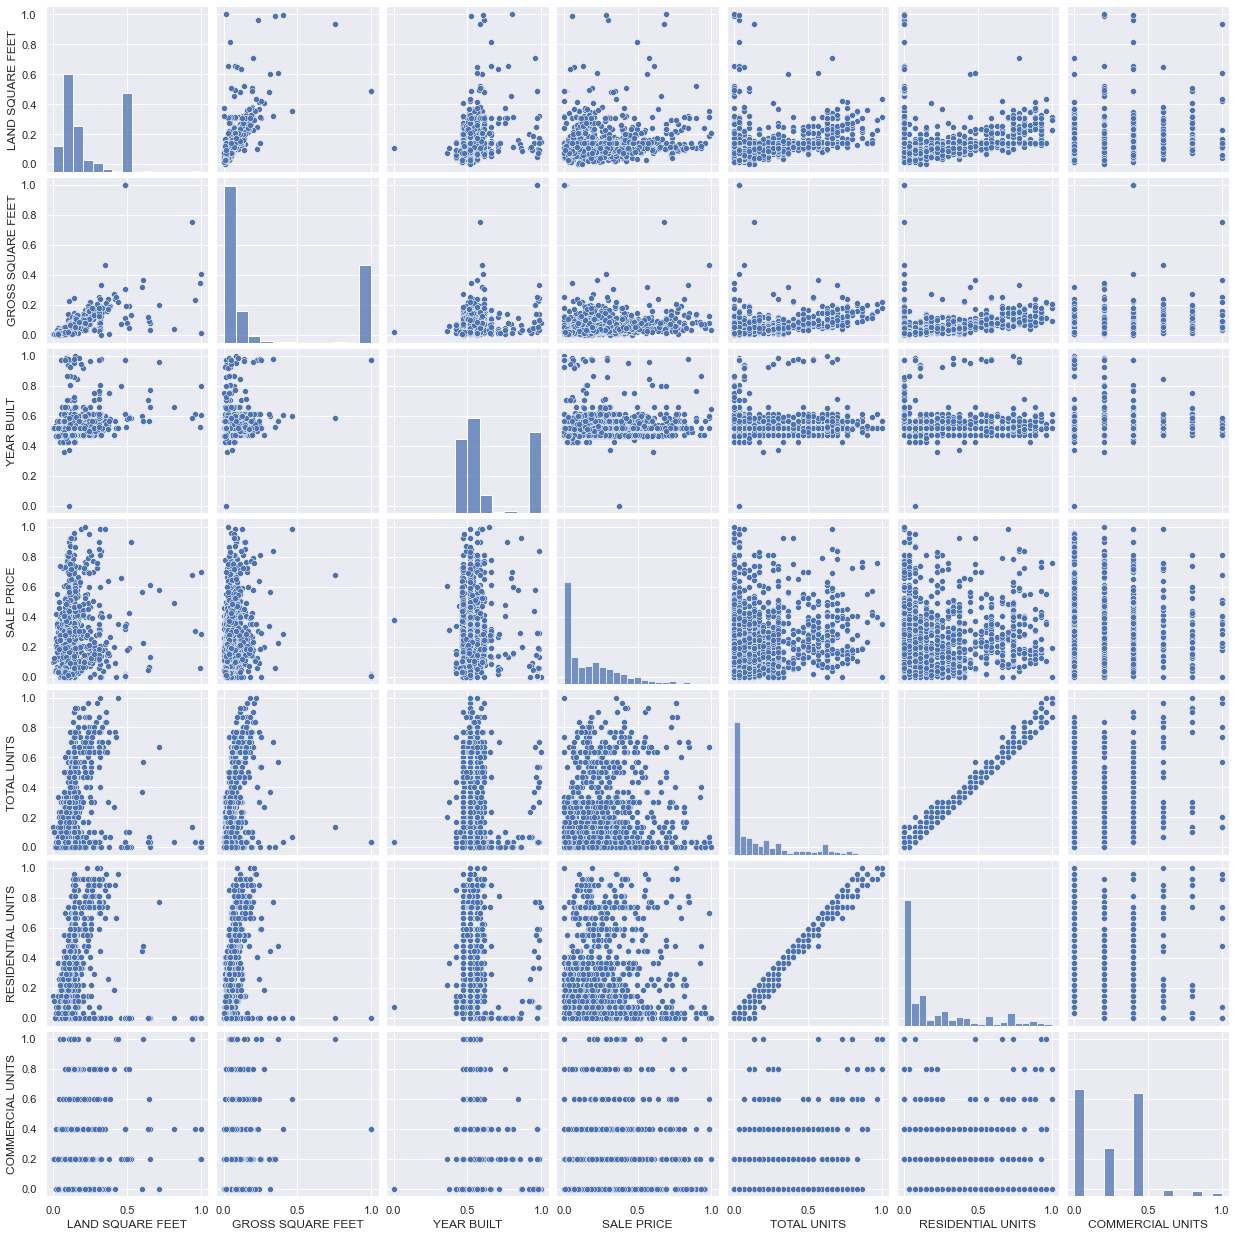

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'x', 'y', and 'z'
# If not, create a sample DataFrame
data = df_numerical2WithUnitSQFNOR

dfplot = pd.DataFrame(data)

# Plotting the scatter matrix
sns.pairplot(dfplot)
plt.show()

# Plotting the correlation matrix
correlation_matrix = dfplot.corr()
plt.show()

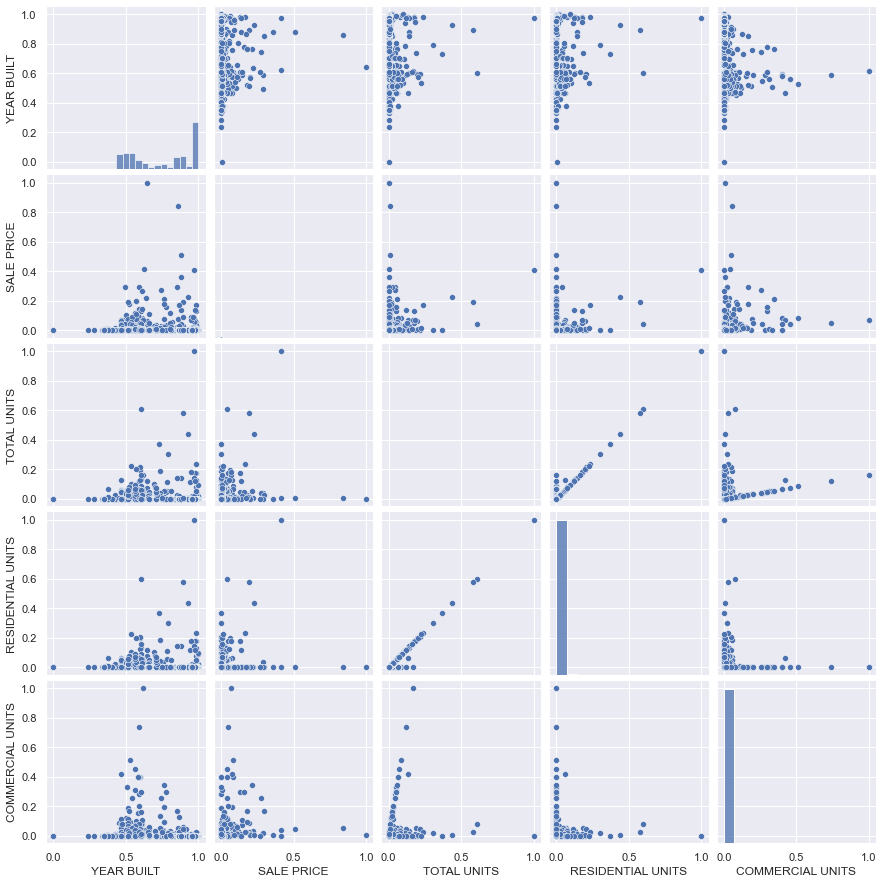

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'x', 'y', and 'z'
# If not, create a sample DataFrame
data = df_numerical2WithUnitNOR

dfplot = pd.DataFrame(data)

# Plotting the scatter matrix
sns.pairplot(dfplot)
plt.show()

# Plotting the correlation matrix
correlation_matrix = dfplot.corr()
plt.show()

In [110]:
# Select the predictors (features) and the target variable (house prices)
# Replace 'feature_1', 'feature_2', etc. with the actual column names of your dataset
predictors = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',"TOTAL UNITS",'RESIDENTIAL UNITS','COMMERCIAL UNITS']
target = 'SALE PRICE'

X = df_numerical2WithUnitSQFNOR[predictors]
y = df_numerical2WithUnitSQFNOR[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model\
model = LinearRegression()
model.fit(X_train, y_train)
# Define the cross-validation procedure
k = 10  # The number of folds; you can change this value depending on your dataset size and problem complexity
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Use mean squared error as the scoring metric
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Evaluate the model using cross-validation
mse_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)

# Calculate the mean and standard deviation of the MSE scores
mse_mean = -np.mean(mse_scores)
mse_std = np.std(mse_scores)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate the R-squared value on the test set
r_squared = model.score(X_test, y_test)


print(f"R-squared value: {r_squared:.2f}")
print(f"Mean Squared Error (MSE) with {k}-fold cross-validation: {mse_mean:.2f} (+/- {mse_std:.2f})")



R-squared value: 0.27
Mean Squared Error (MSE) with 10-fold cross-validation: 0.03 (+/- 0.00)


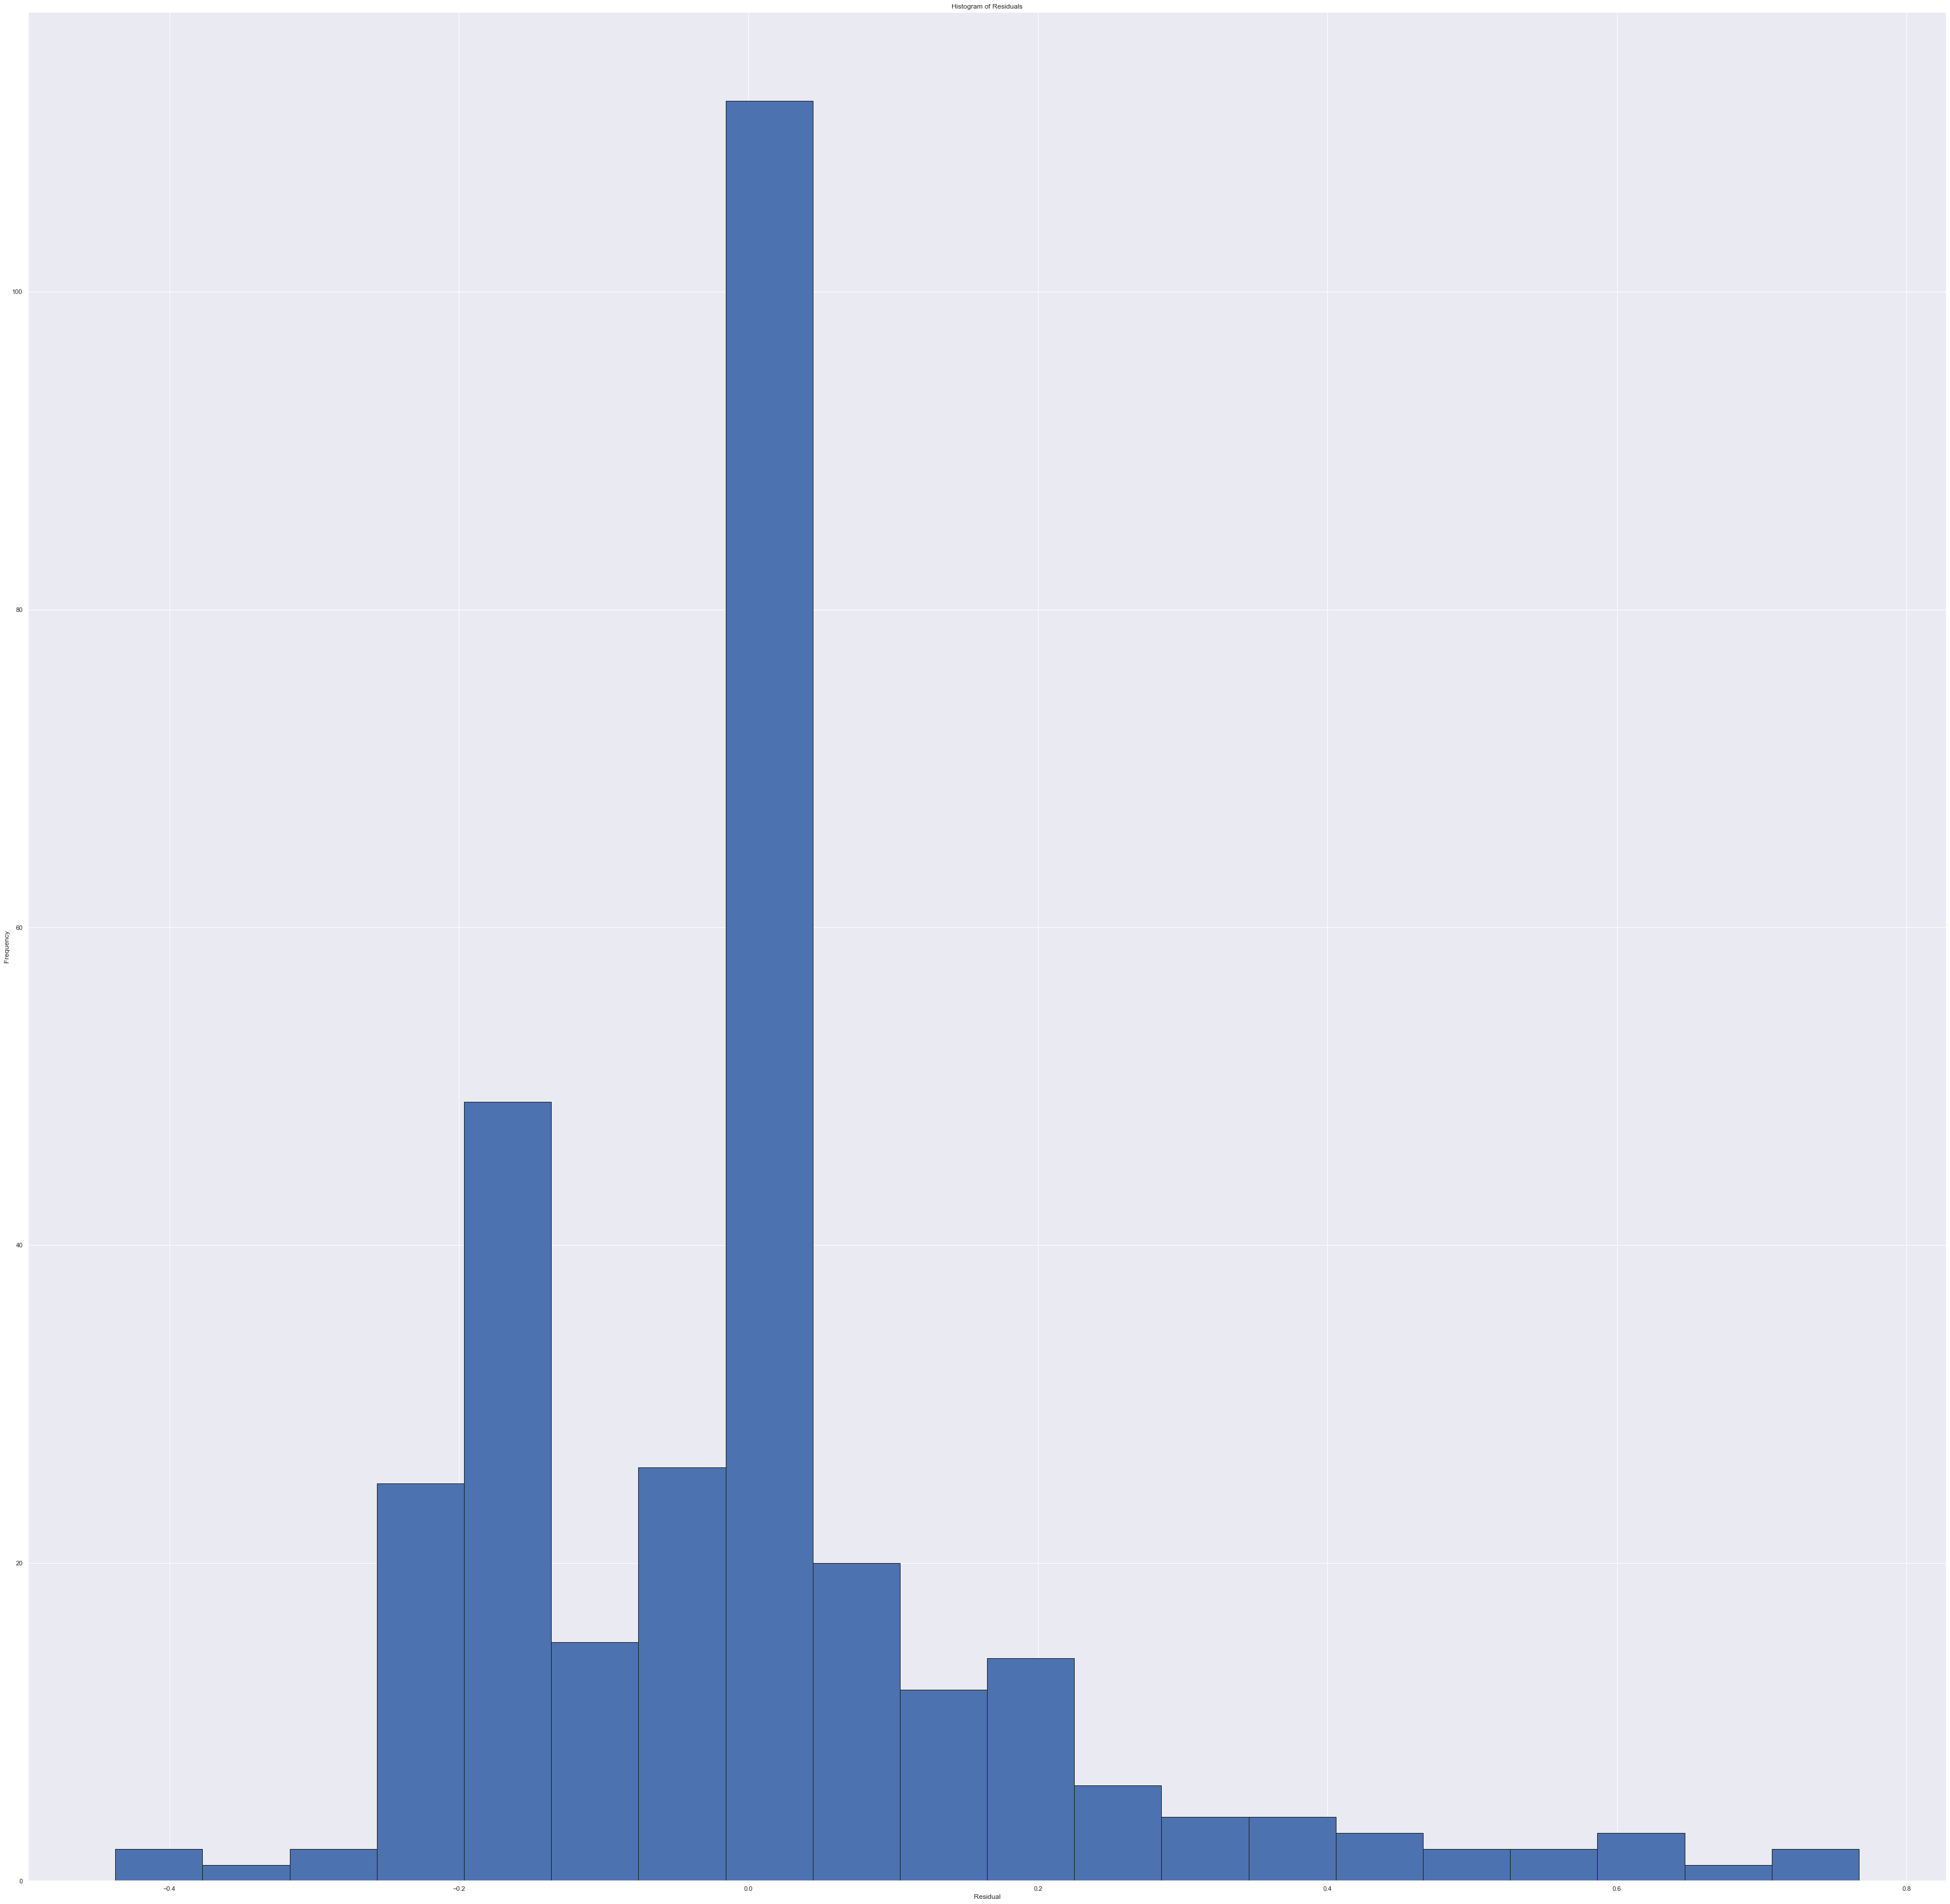

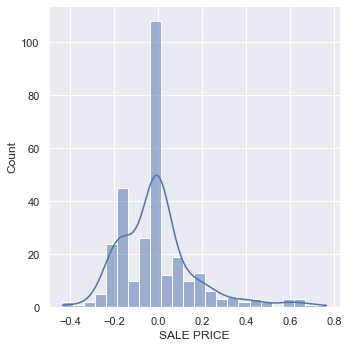

In [111]:
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Plot the histogram of the residuals
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
sns.displot(residuals, kde=True)
plt.show()

In [112]:
# Select the predictors (features) and the target variable (house prices)
# Replace 'feature_1', 'feature_2', etc. with the actual column names of your dataset
predictors = ['YEAR BUILT',"TOTAL UNITS",'RESIDENTIAL UNITS','COMMERCIAL UNITS']
target = 'SALE PRICE'

X = df_numerical2WithUnitNOR[predictors]
y = df_numerical2WithUnitNOR[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model\
model = LinearRegression()
model.fit(X_train, y_train)
# Define the cross-validation procedure
k = 10  # The number of folds; you can change this value depending on your dataset size and problem complexity
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Use mean squared error as the scoring metric
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Evaluate the model using cross-validation
mse_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)

# Calculate the mean and standard deviation of the MSE scores
mse_mean = -np.mean(mse_scores)
mse_std = np.std(mse_scores)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate the R-squared value on the test set
r_squared = model.score(X_test, y_test)


print(f"R-squared value: {r_squared:.2f}")
print(f"Mean Squared Error (MSE) with {k}-fold cross-validation: {mse_mean:.2f} (+/- {mse_std:.2f})")



R-squared value: -0.02
Mean Squared Error (MSE) with 10-fold cross-validation: 0.00 (+/- 0.00)


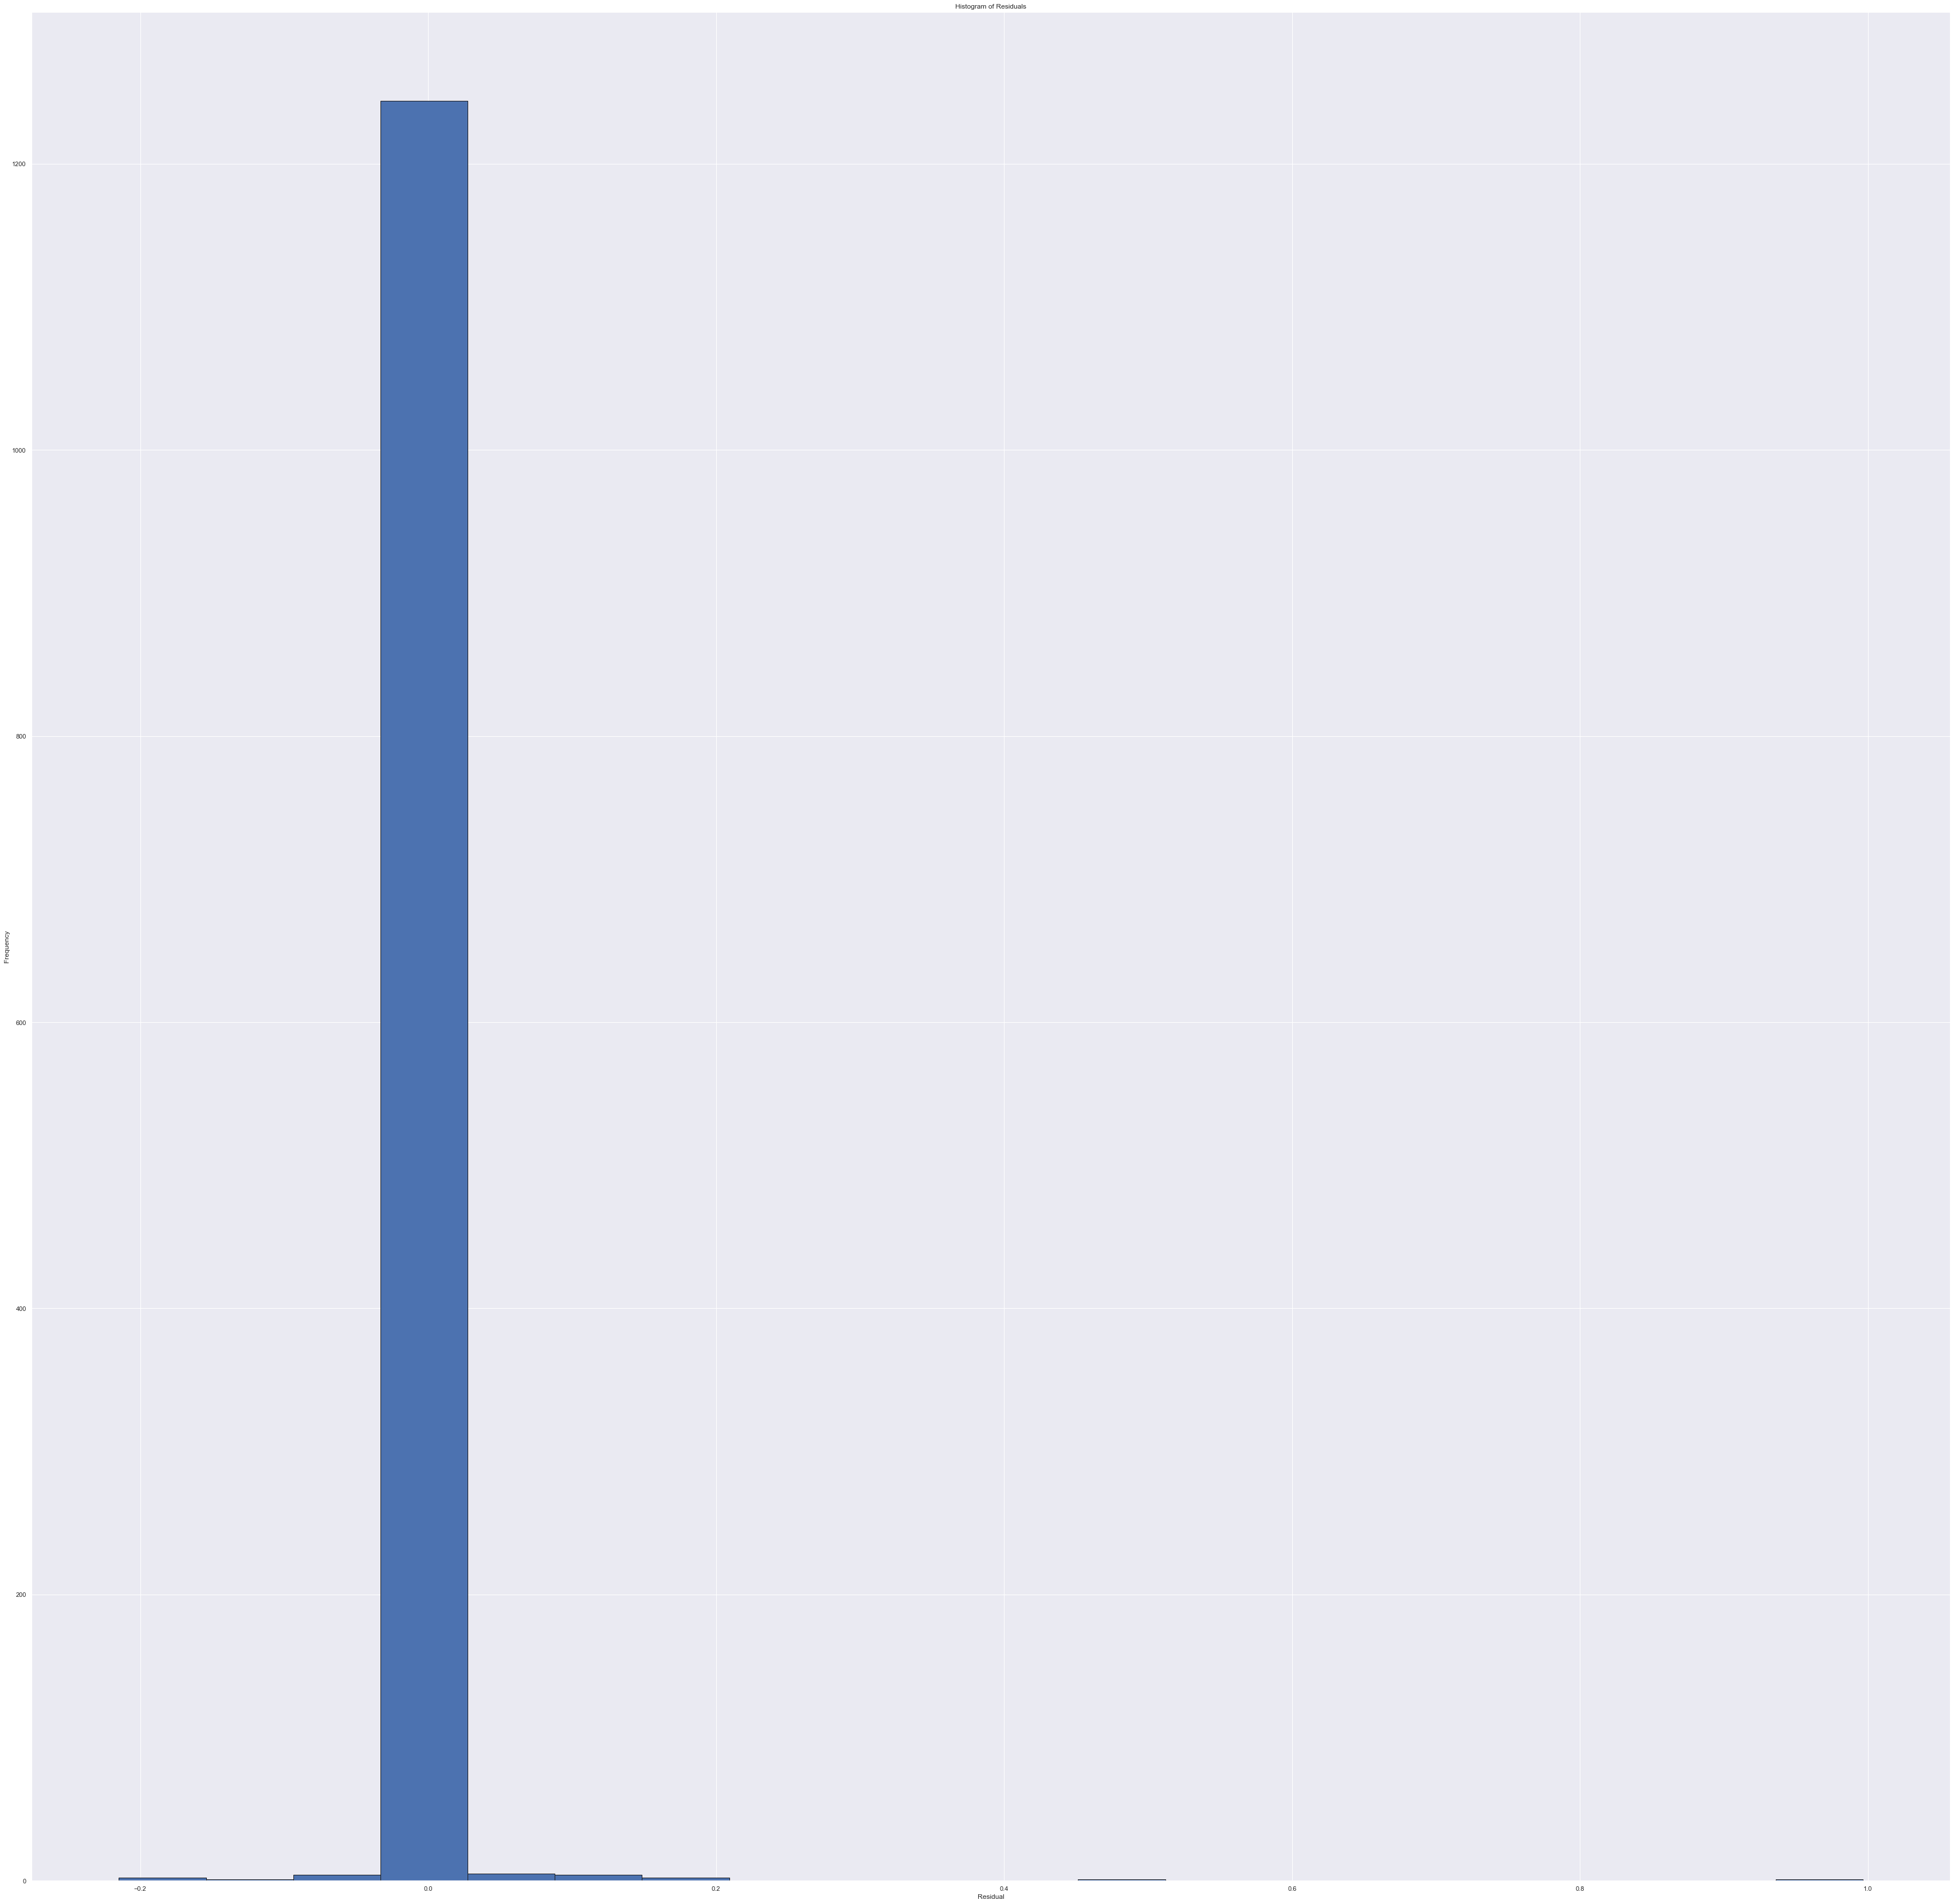

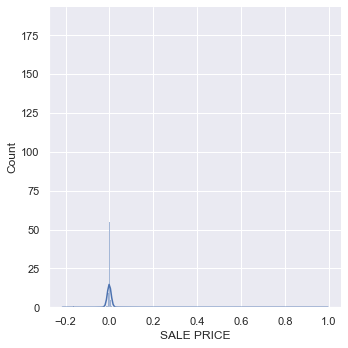

In [113]:
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Plot the histogram of the residuals
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
sns.displot(residuals, kde=True)
plt.show()

In [124]:
df_priceTimeAge = df_numerical2WithUnit[['YEAR BUILT', "SALE PRICE"]].copy()
df_priceTimeAge

YEAR BUILT  SALE PRICE
22         1899.0   3150000.0
23         1955.0   3450000.0
25         1900.0   3650000.0
26         1910.0    895250.0
28         1997.0       283.0
...           ...         ...
27380      1991.0   1500000.0
27382      1927.0   5183000.0
27383      2003.0     17842.0
27386      1971.0  12000000.0
27390      1929.0   4917000.0

[6317 rows x 2 columns]

In [125]:
df_priceTimeAge.sort_values(by='YEAR BUILT', inplace = True)

<AxesSubplot:xlabel='YEAR BUILT', ylabel='SALE PRICE'>

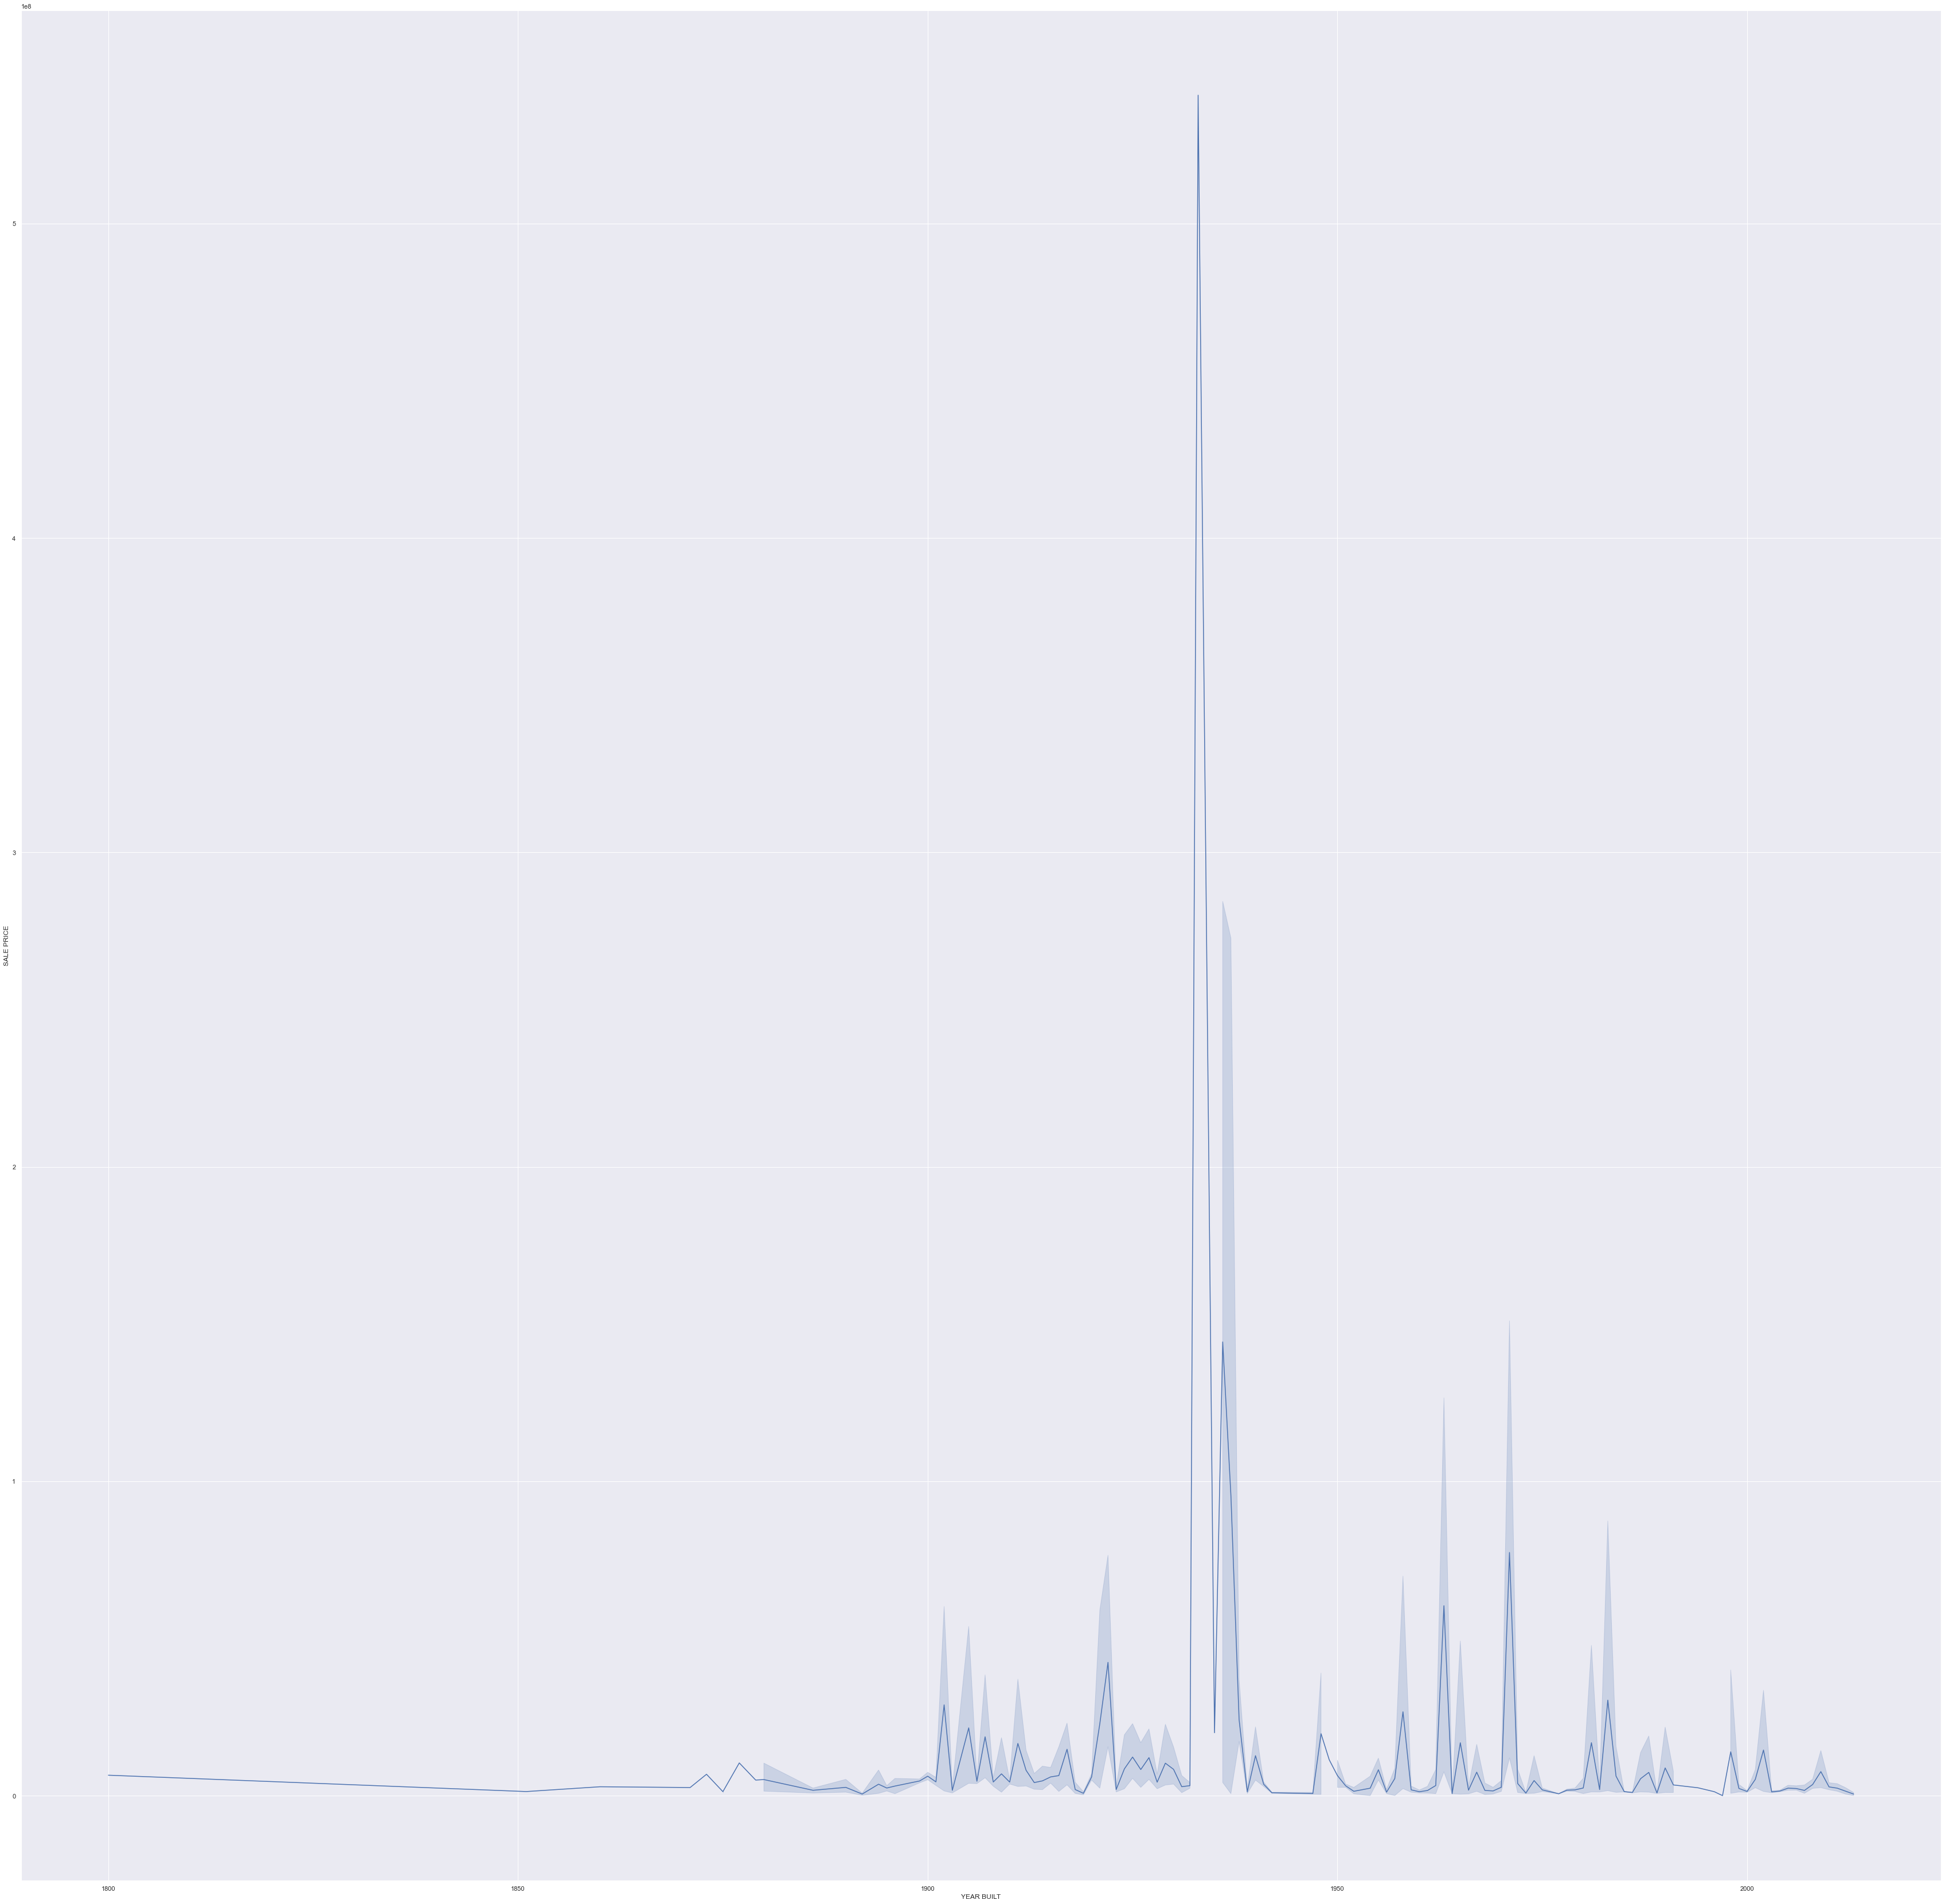

In [126]:
sns.lineplot(data=df_priceTimeAge, x="YEAR BUILT", y="SALE PRICE")

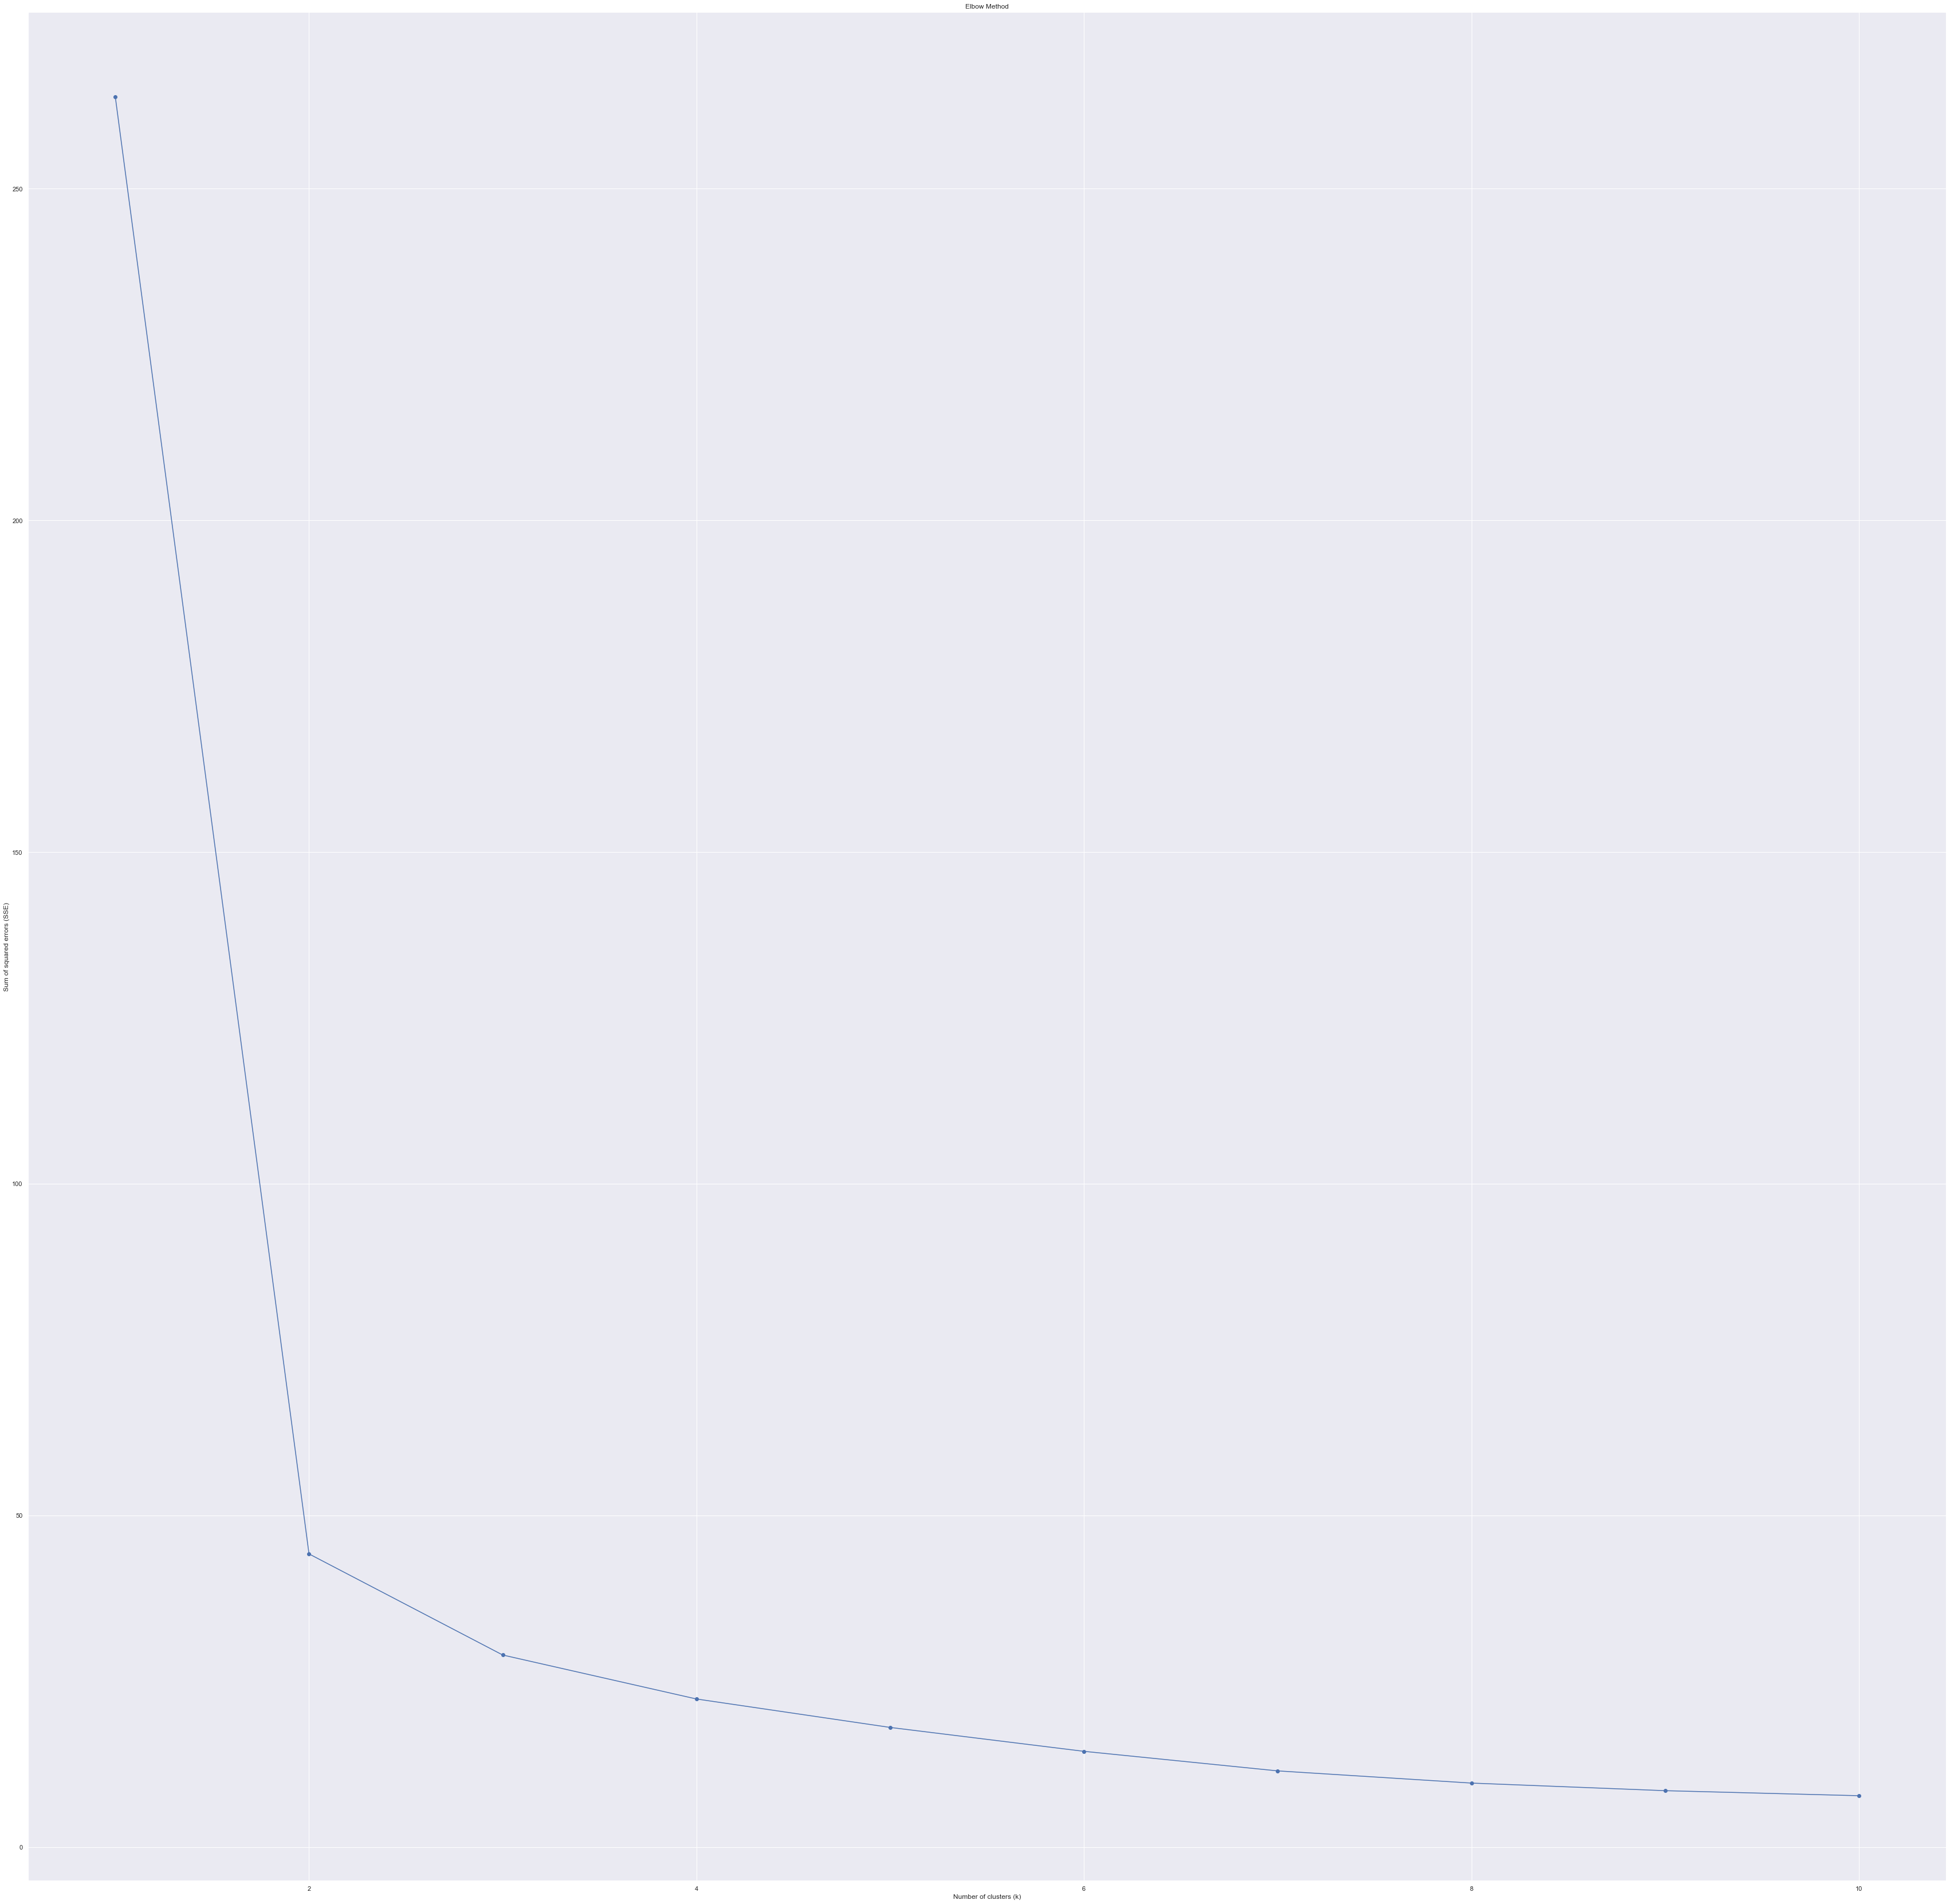

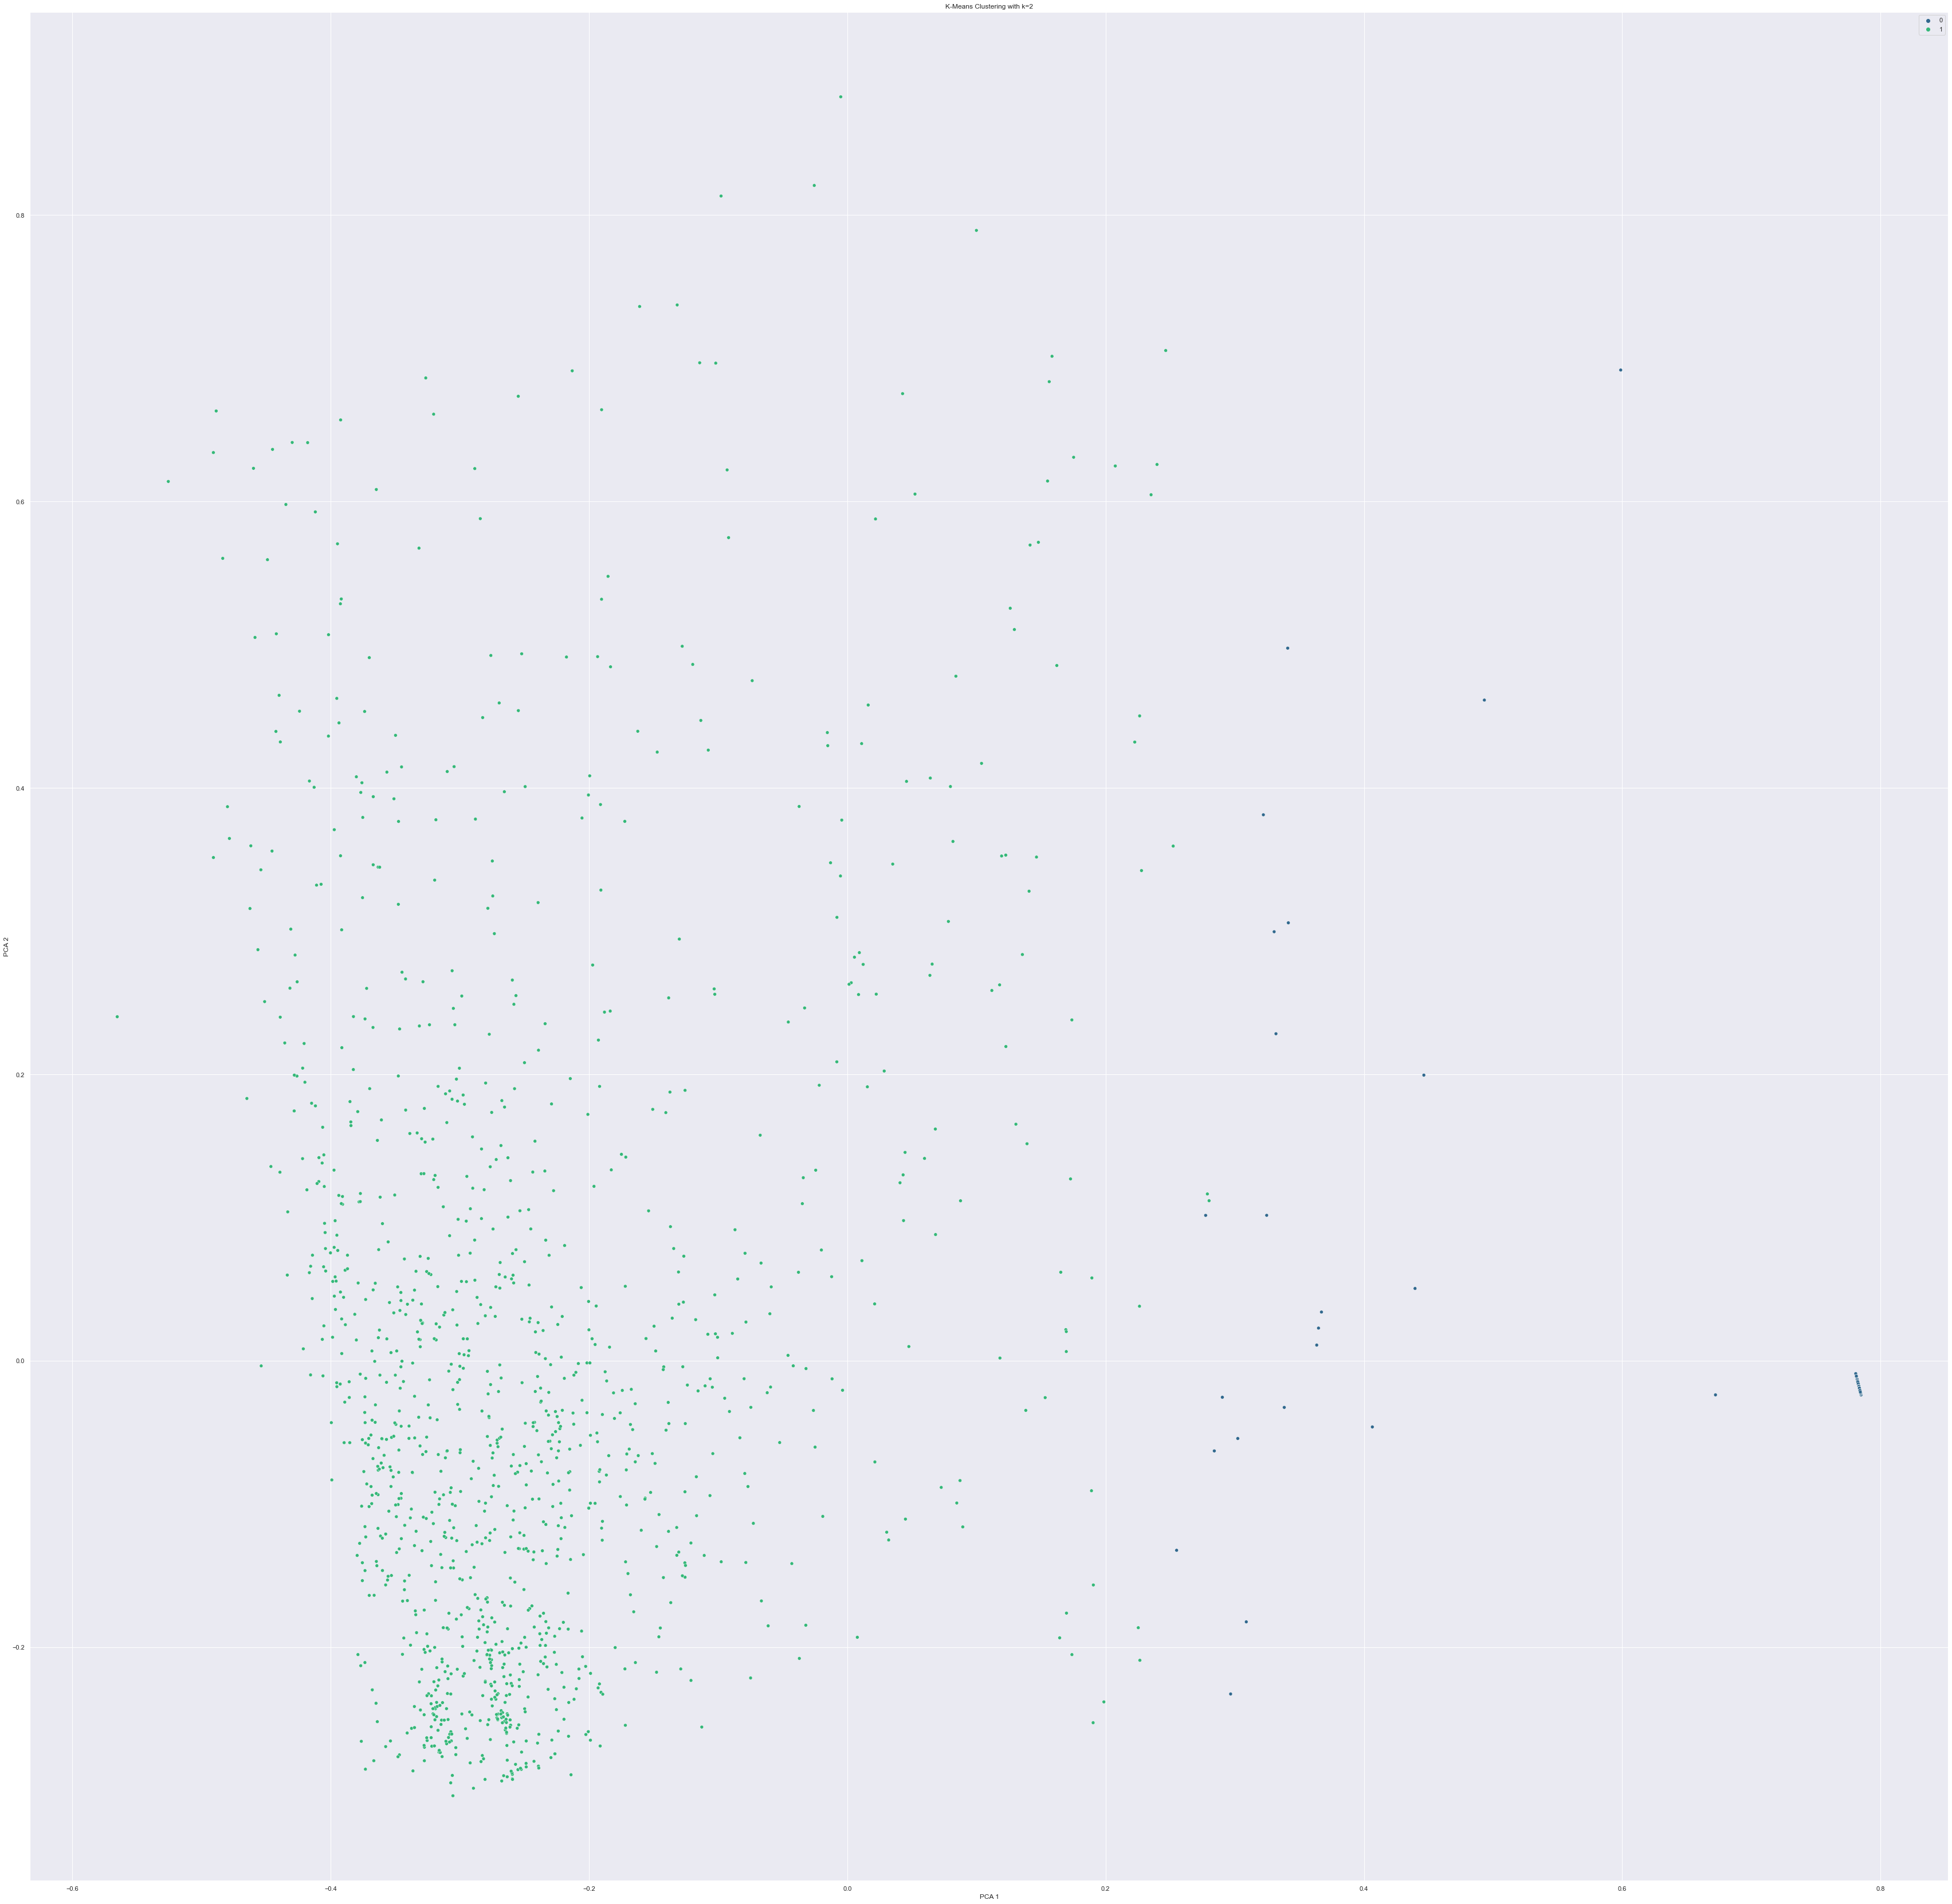

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Determine the optimal number of clusters using the Elbow Method
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_numerical2WithUnitNOR)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method')
plt.grid(True)  # Add grid lines to the plot
plt.show()


# Choose the optimal k value based on the Elbow Method plot
optimal_k = 2  # Replace this value with the appropriate k value based on the Elbow Method plot

# Cluster the dataset using K-Means with the optimal k value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_numericalNormalized)

# Use PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numericalNormalized)

# Visualize the clusters
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='viridis', legend='full')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering with k={}'.format(optimal_k))
plt.show()


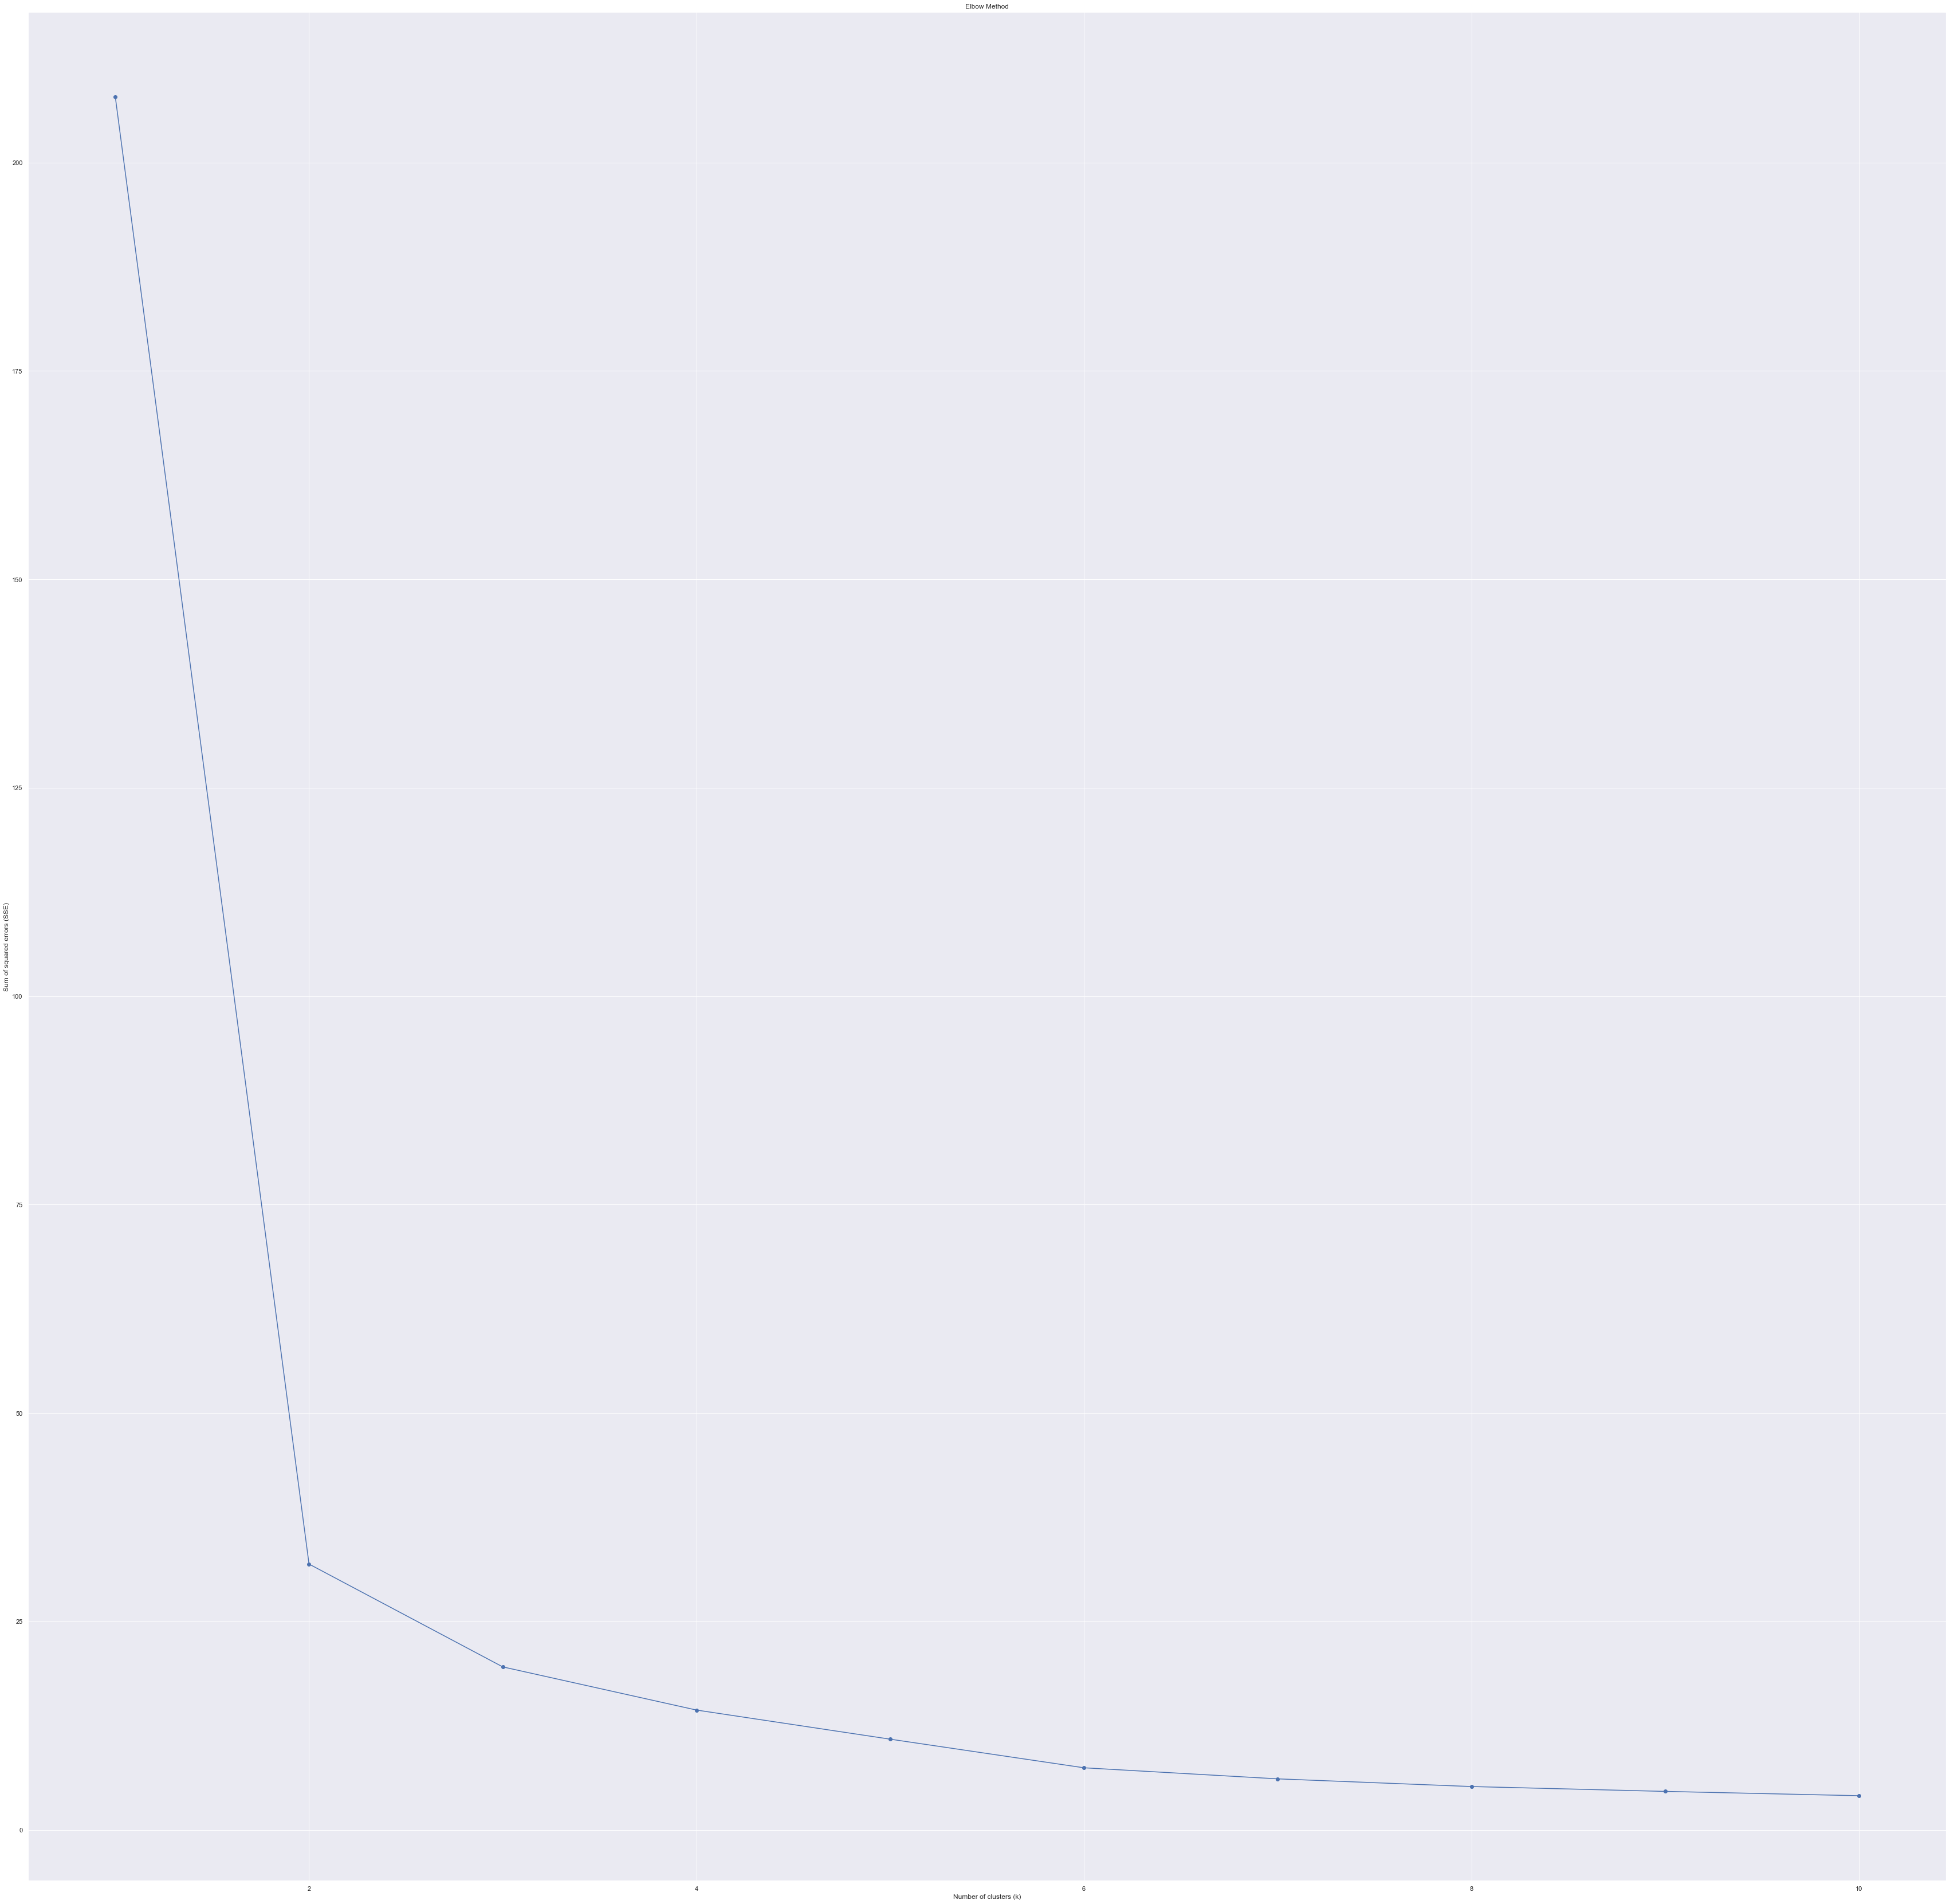

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

In [140]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load the dataset
df = df_numerical2WithUnitNOR

# Select the predictors and target variable
predictors = ['YEAR BUILT',"TOTAL UNITS",'RESIDENTIAL UNITS','COMMERCIAL UNITS']
target = 'SALE PRICE'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[target], test_size=0.2, random_state=42)

# Determine the optimal number of clusters using the Elbow Method
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method')
plt.grid(True)  # Add grid lines to the plot
plt.show()

# Choose the optimal k value based on the Elbow Method plot
optimal_k = 3  # Replace this value with the appropriate k value based on the Elbow Method plot

# Cluster the training data using K-Means with the optimal k value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_train = kmeans.fit_predict(X_train)

# Build local regression models for each cluster
models = []
for i in range(optimal_k):
    X_train_cluster = X_train[clusters_train == i]
    y_train_cluster = y_train[clusters_train == i]
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_cluster, y_train_cluster)
    models.append(model)

# Evaluate the performance of the global regression model
global_model = RandomForestRegressor(n_estimators=100, random_state=42)
global_model.fit(X_train, y_train)
global_r_squared = global_model.score(X_test, y_test)
global_mse = mean_squared_error(y_test, global_model.predict(X_test))

# Evaluate the performance of the clusters-based regression model
cluster_predictions = np.zeros_like(y_test)
for i, x_test in enumerate(X_test.values):
    cluster = kmeans.predict([x_test])[0]
    cluster_predictions[i] = models[cluster].predict([x_test])[0]
cluster_r_squared = np.corrcoef(cluster_predictions, y_test)[0, 1] ** 2
cluster_mse = mean_squared_error(y_test, cluster_predictions)




In [114]:
# re-import df
#create new dataframe with categorical values below (call it improvedCategoricalDf)
#DO NOT DUPLICATE CATEGORICAL DATA
#CLEAN THE DATA LIKE WE DID PREVIOUSLY
#USE LABEL ENCODER TO MAKE CATEGORICAL VALUES NUMERICAL
#create new dataframe with numerical values below (call it improvedNumericallDf)
#CLEAN THE DATA LIKE WE DID PREVIOUSLY
#join them by the index
#create new dataframe with nonZero values below (call it improvedNonZeroDf)
#join them by the index
#TEST IN MODEL, SEE SCORE IMPROVE


#REMANBER TO ASK ABOUT CAT VALUE PLOT LABLE WHEN LABLE ENCODING


# Assuming you have three DataFrames: df1, df2, and df3
# with columns 'A', 'B', and 'C' respectively, and you want to select specific columns

# Sample DataFrames (replace with your actual DataFrames)
data1 = df2

df1 = pd.DataFrame(data1)

# Select specific columns from each DataFrame
selected_df1 = df1[['NEIGHBORHOOD','BUILDING CLASS CATEGORY', "BUILDING CLASS AT PRESENT", "ADDRESS", "BUILDING CLASS AT TIME OF SALE",'ZIP CODE', "TOTAL UNITS"]]

# Concatenate the selected columns along the columns axis (axis=1)
new_df = pd.concat([selected_df1], axis=1)

print(new_df)


#VALUES THT MUST INCLUDE ZERO: RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS, 
#CATEGORICAL VALUES: NEIGHBORHOOD, BUILDING CLASS CATEGORY, ZIP CODE, BUILDING CLASS AT TIME OF SALE, ADDRESS

                    NEIGHBORHOOD  \
4                                  
5                                  
6                                  
7                                  
8                                  
...                          ...   
27394  WASHINGTON HEIGHTS UPPER    
27395  WASHINGTON HEIGHTS UPPER    
27396  WASHINGTON HEIGHTS UPPER    
27397  WASHINGTON HEIGHTS UPPER    
27398  WASHINGTON HEIGHTS UPPER    

                            BUILDING CLASS CATEGORY BUILDING CLASS AT PRESENT  \
4      13  CONDOS - ELEVATOR APARTMENTS                                         
5      13  CONDOS - ELEVATOR APARTMENTS                                         
6      13  CONDOS - ELEVATOR APARTMENTS                                         
7      13  CONDOS - ELEVATOR APARTMENTS                                         
8      13  CONDOS - ELEVATOR APARTMENTS                                         
...                                             ...                       ...   


In [115]:

# We first have to make the categorical values numerical


# Assuming you have three DataFrames: df1, df2, and df3
# with columns 'A', 'B', and 'C' respectively, and you want to select specific columns

# Sample DataFrames (replace with your actual DataFrames)
data1 = df_numericalNormalized
data2 = 

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)

# Select specific columns from each DataFrame
selected_df1 = df1[['A']]
selected_df2 = df2[['B']]
selected_df3 = df3[['C']]

# Concatenate the selected columns along the columns axis (axis=1)
new_df = pd.concat([selected_df1, selected_df2, selected_df3], axis=1)

print(new_df)


SyntaxError: invalid syntax (2858497790.py, line 9)

In [122]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

# Assuming you have a DataFrame named 'df' with both numerical and categorical features

# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Create a column transformer to preprocess the features
preprocessor = make_column_transformer(
    (StandardScaler(), numerical_features),         # Scale numerical features
    (OneHotEncoder(), categorical_features),        # One-hot encode categorical features
)

# Transform the dataset
X_transformed = preprocessor.fit_transform(df)

# Now you can use X_transformed with a machine learning algorithm


### <div class="alert alert-warning">2. Use the K-Means algorithm to cluster your cleansed dataset and compare the obtained clusters with the distribution found in the data. Justify your clustering and visualise your clusters as appropriate.</div>

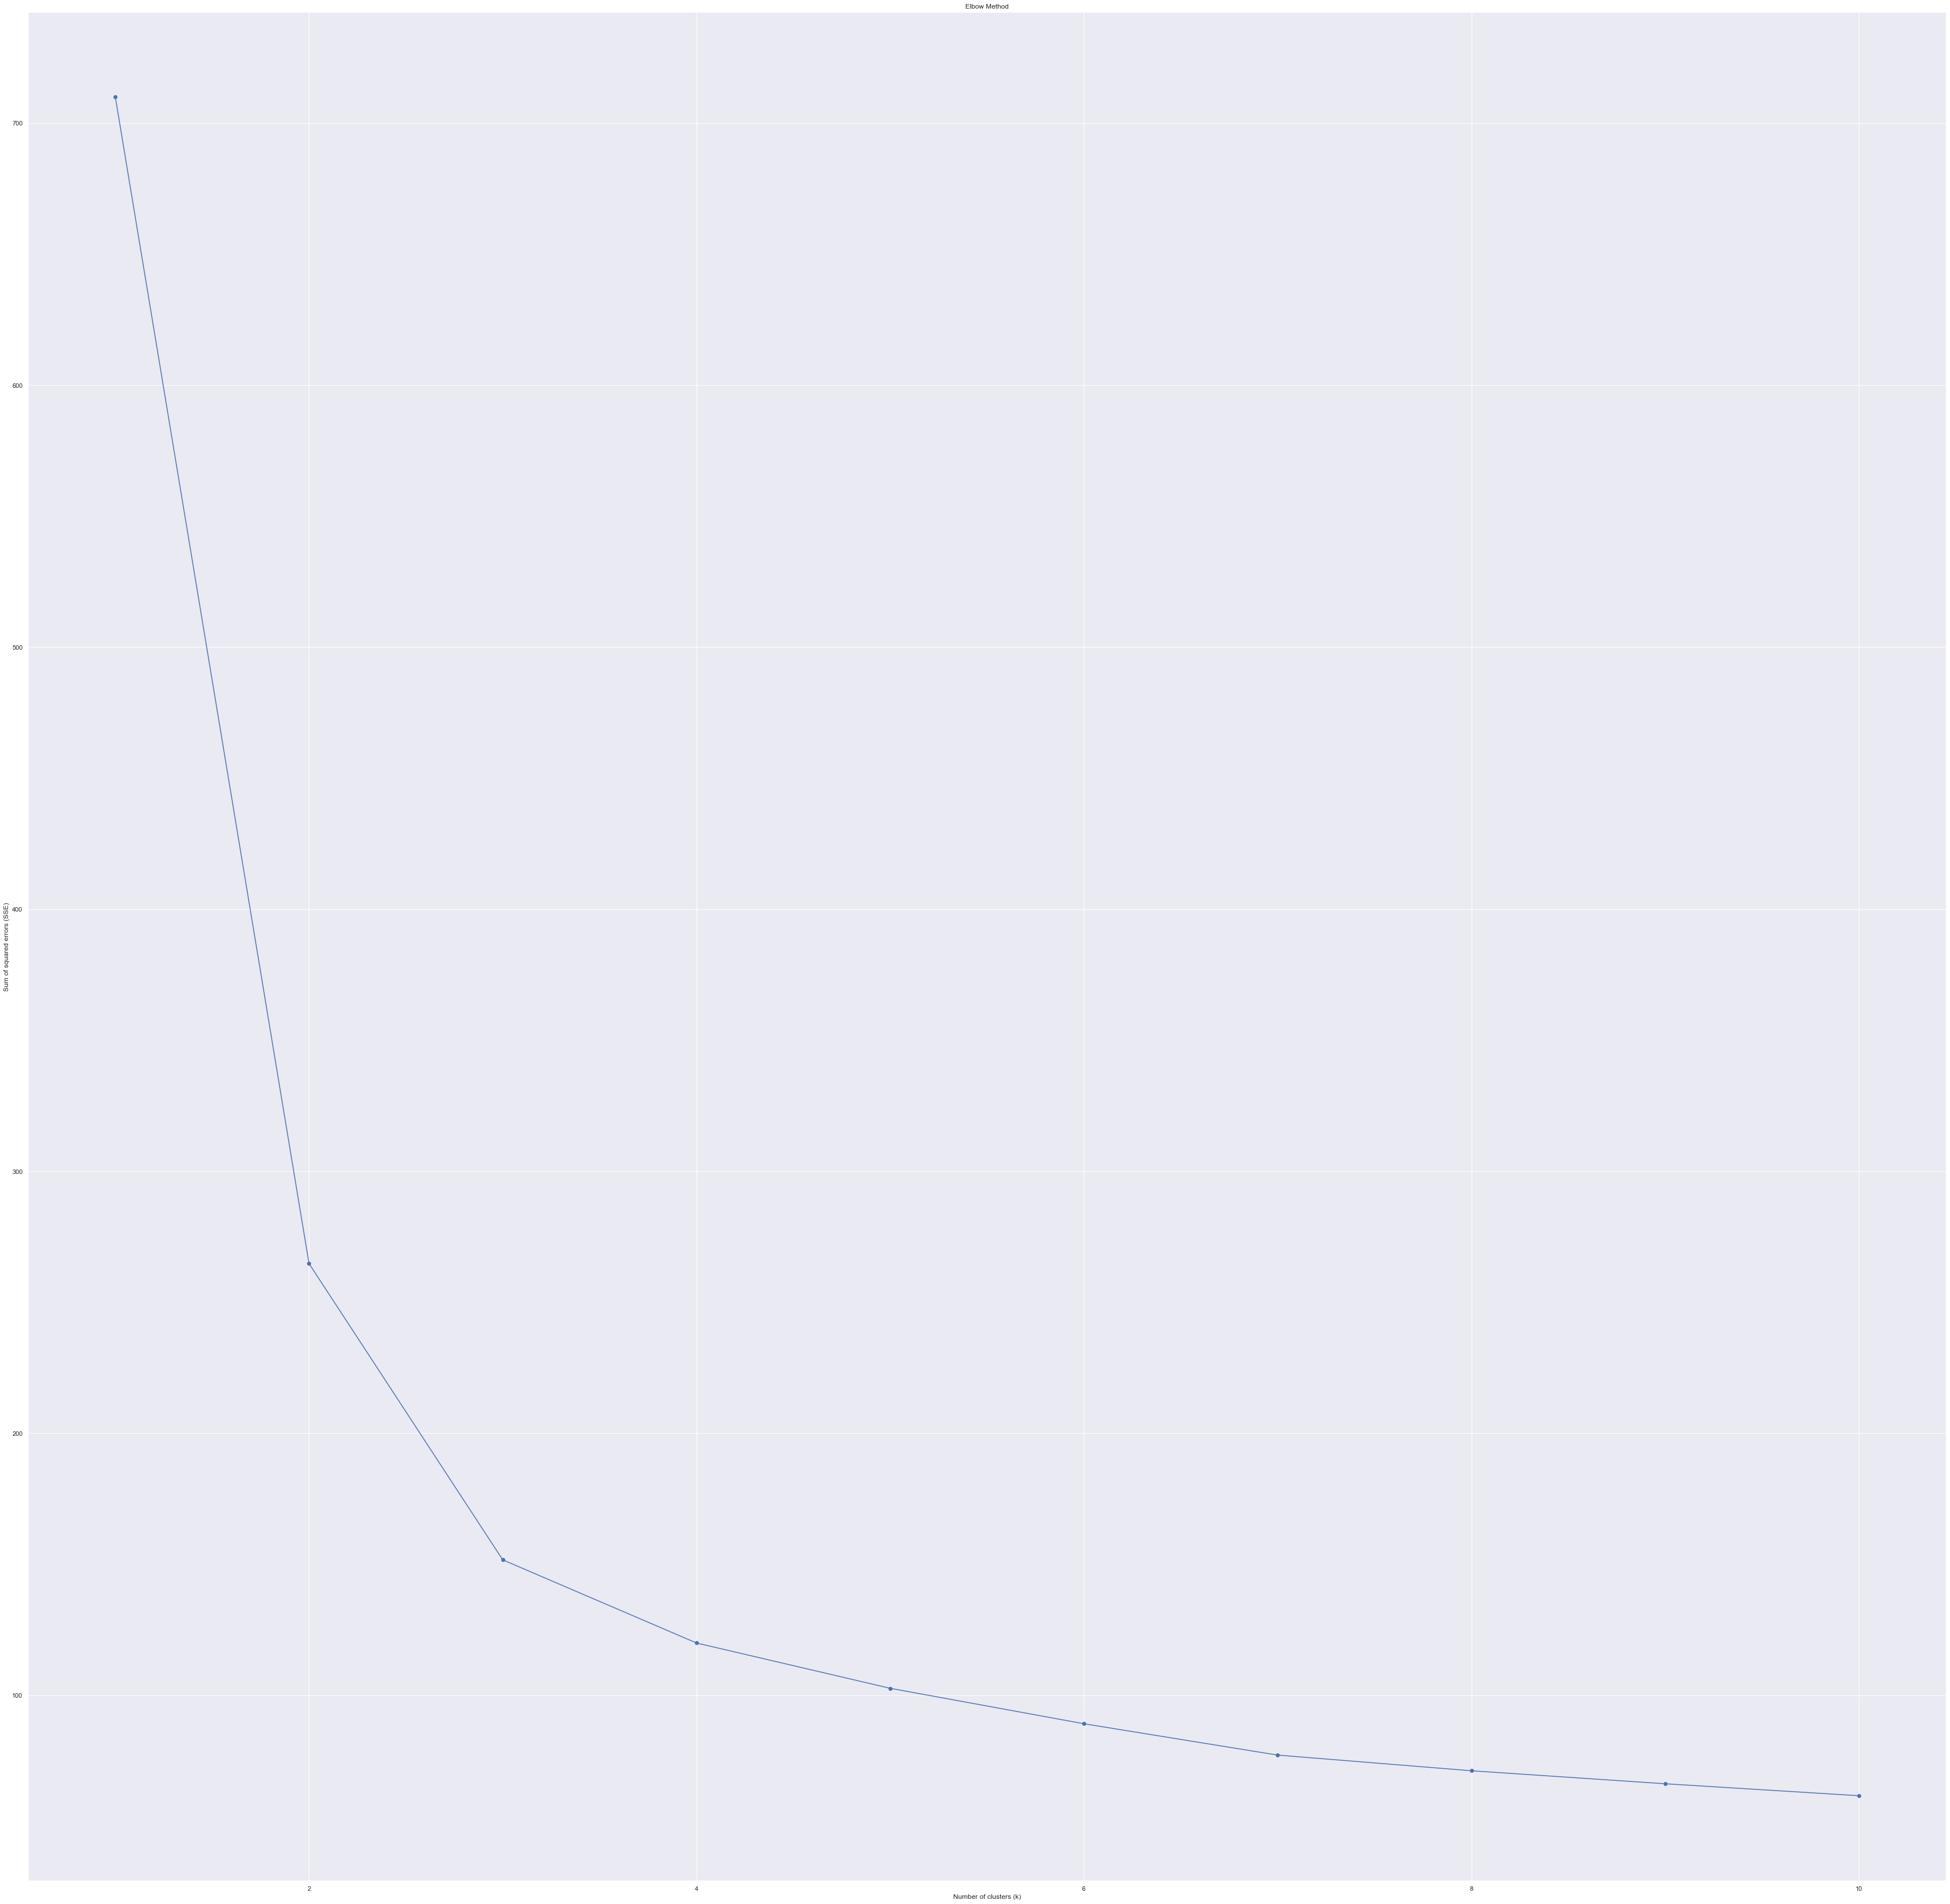

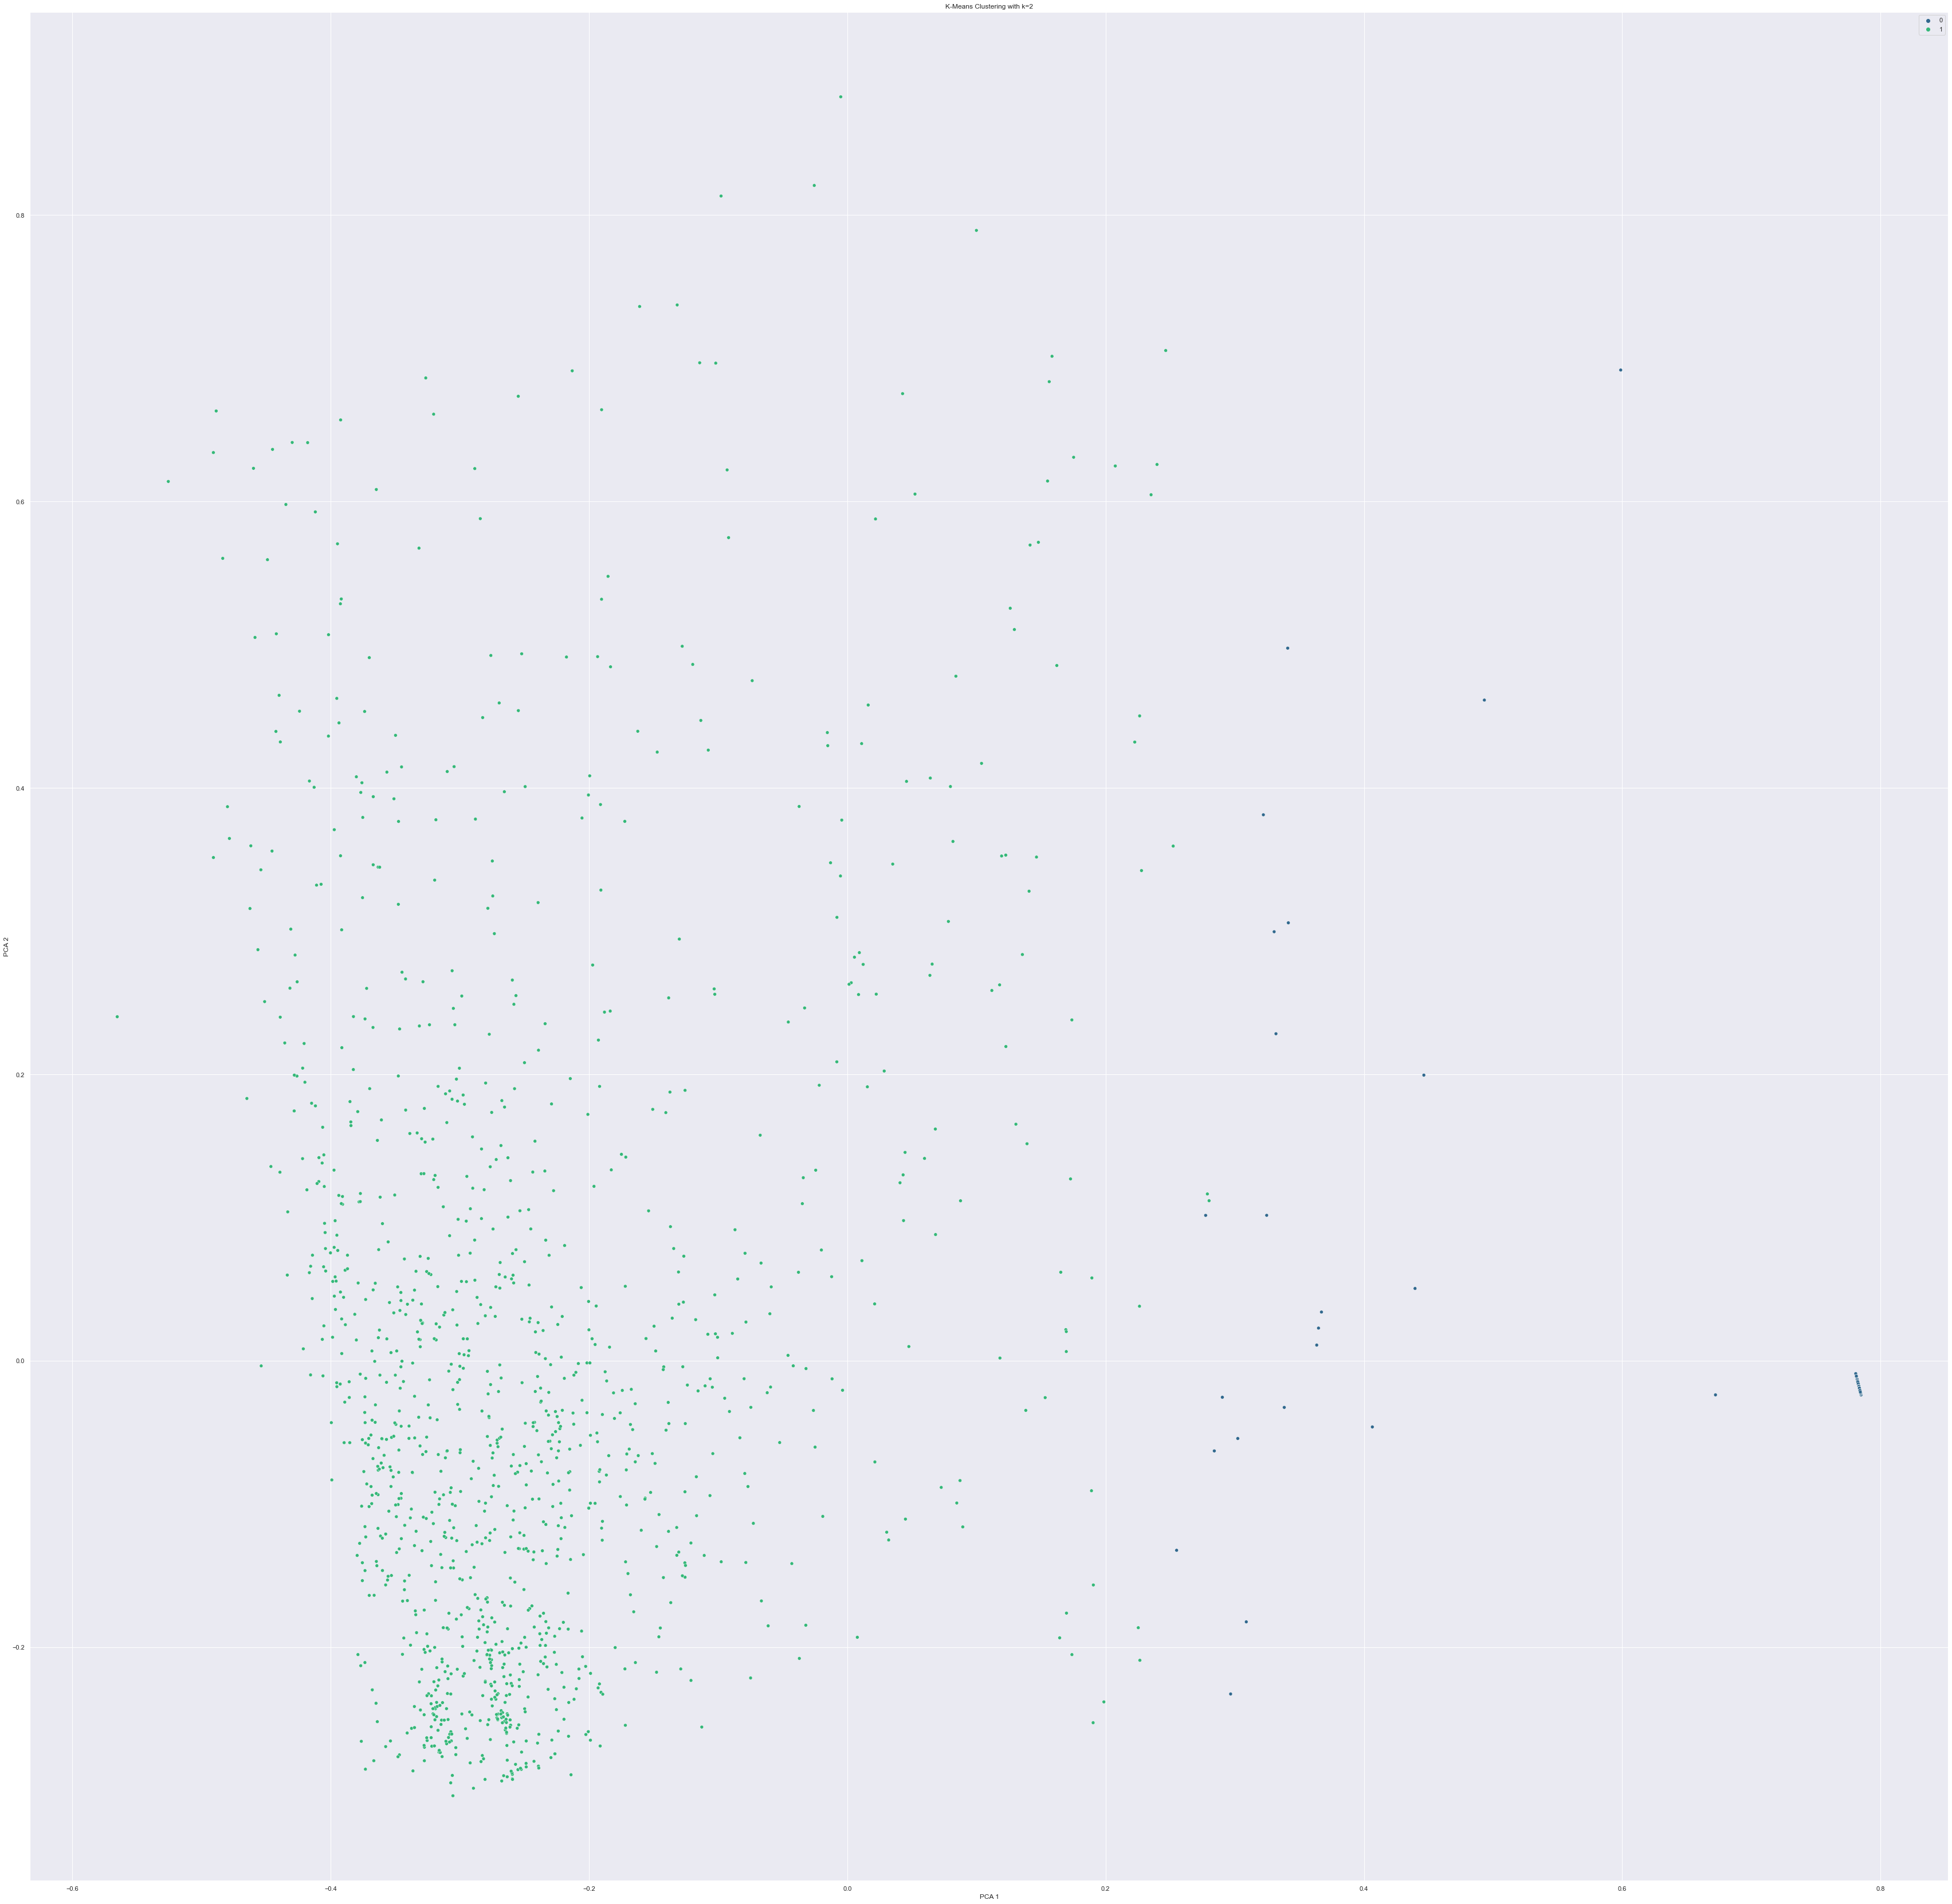

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Determine the optimal number of clusters using the Elbow Method
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_numericalNormalized)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method')
plt.grid(True)  # Add grid lines to the plot
plt.show()


# Choose the optimal k value based on the Elbow Method plot
optimal_k = 2  # Replace this value with the appropriate k value based on the Elbow Method plot

# Cluster the dataset using K-Means with the optimal k value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_numericalNormalized)

# Use PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numericalNormalized)

# Visualize the clusters
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='viridis', legend='full')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering with k={}'.format(optimal_k))
plt.show()


### <div class="alert alert-warning">3. Build up local regressors based on your clustering and discuss how this clusters-based regression compares to your regression model obtained in Part 2. 1.</div>

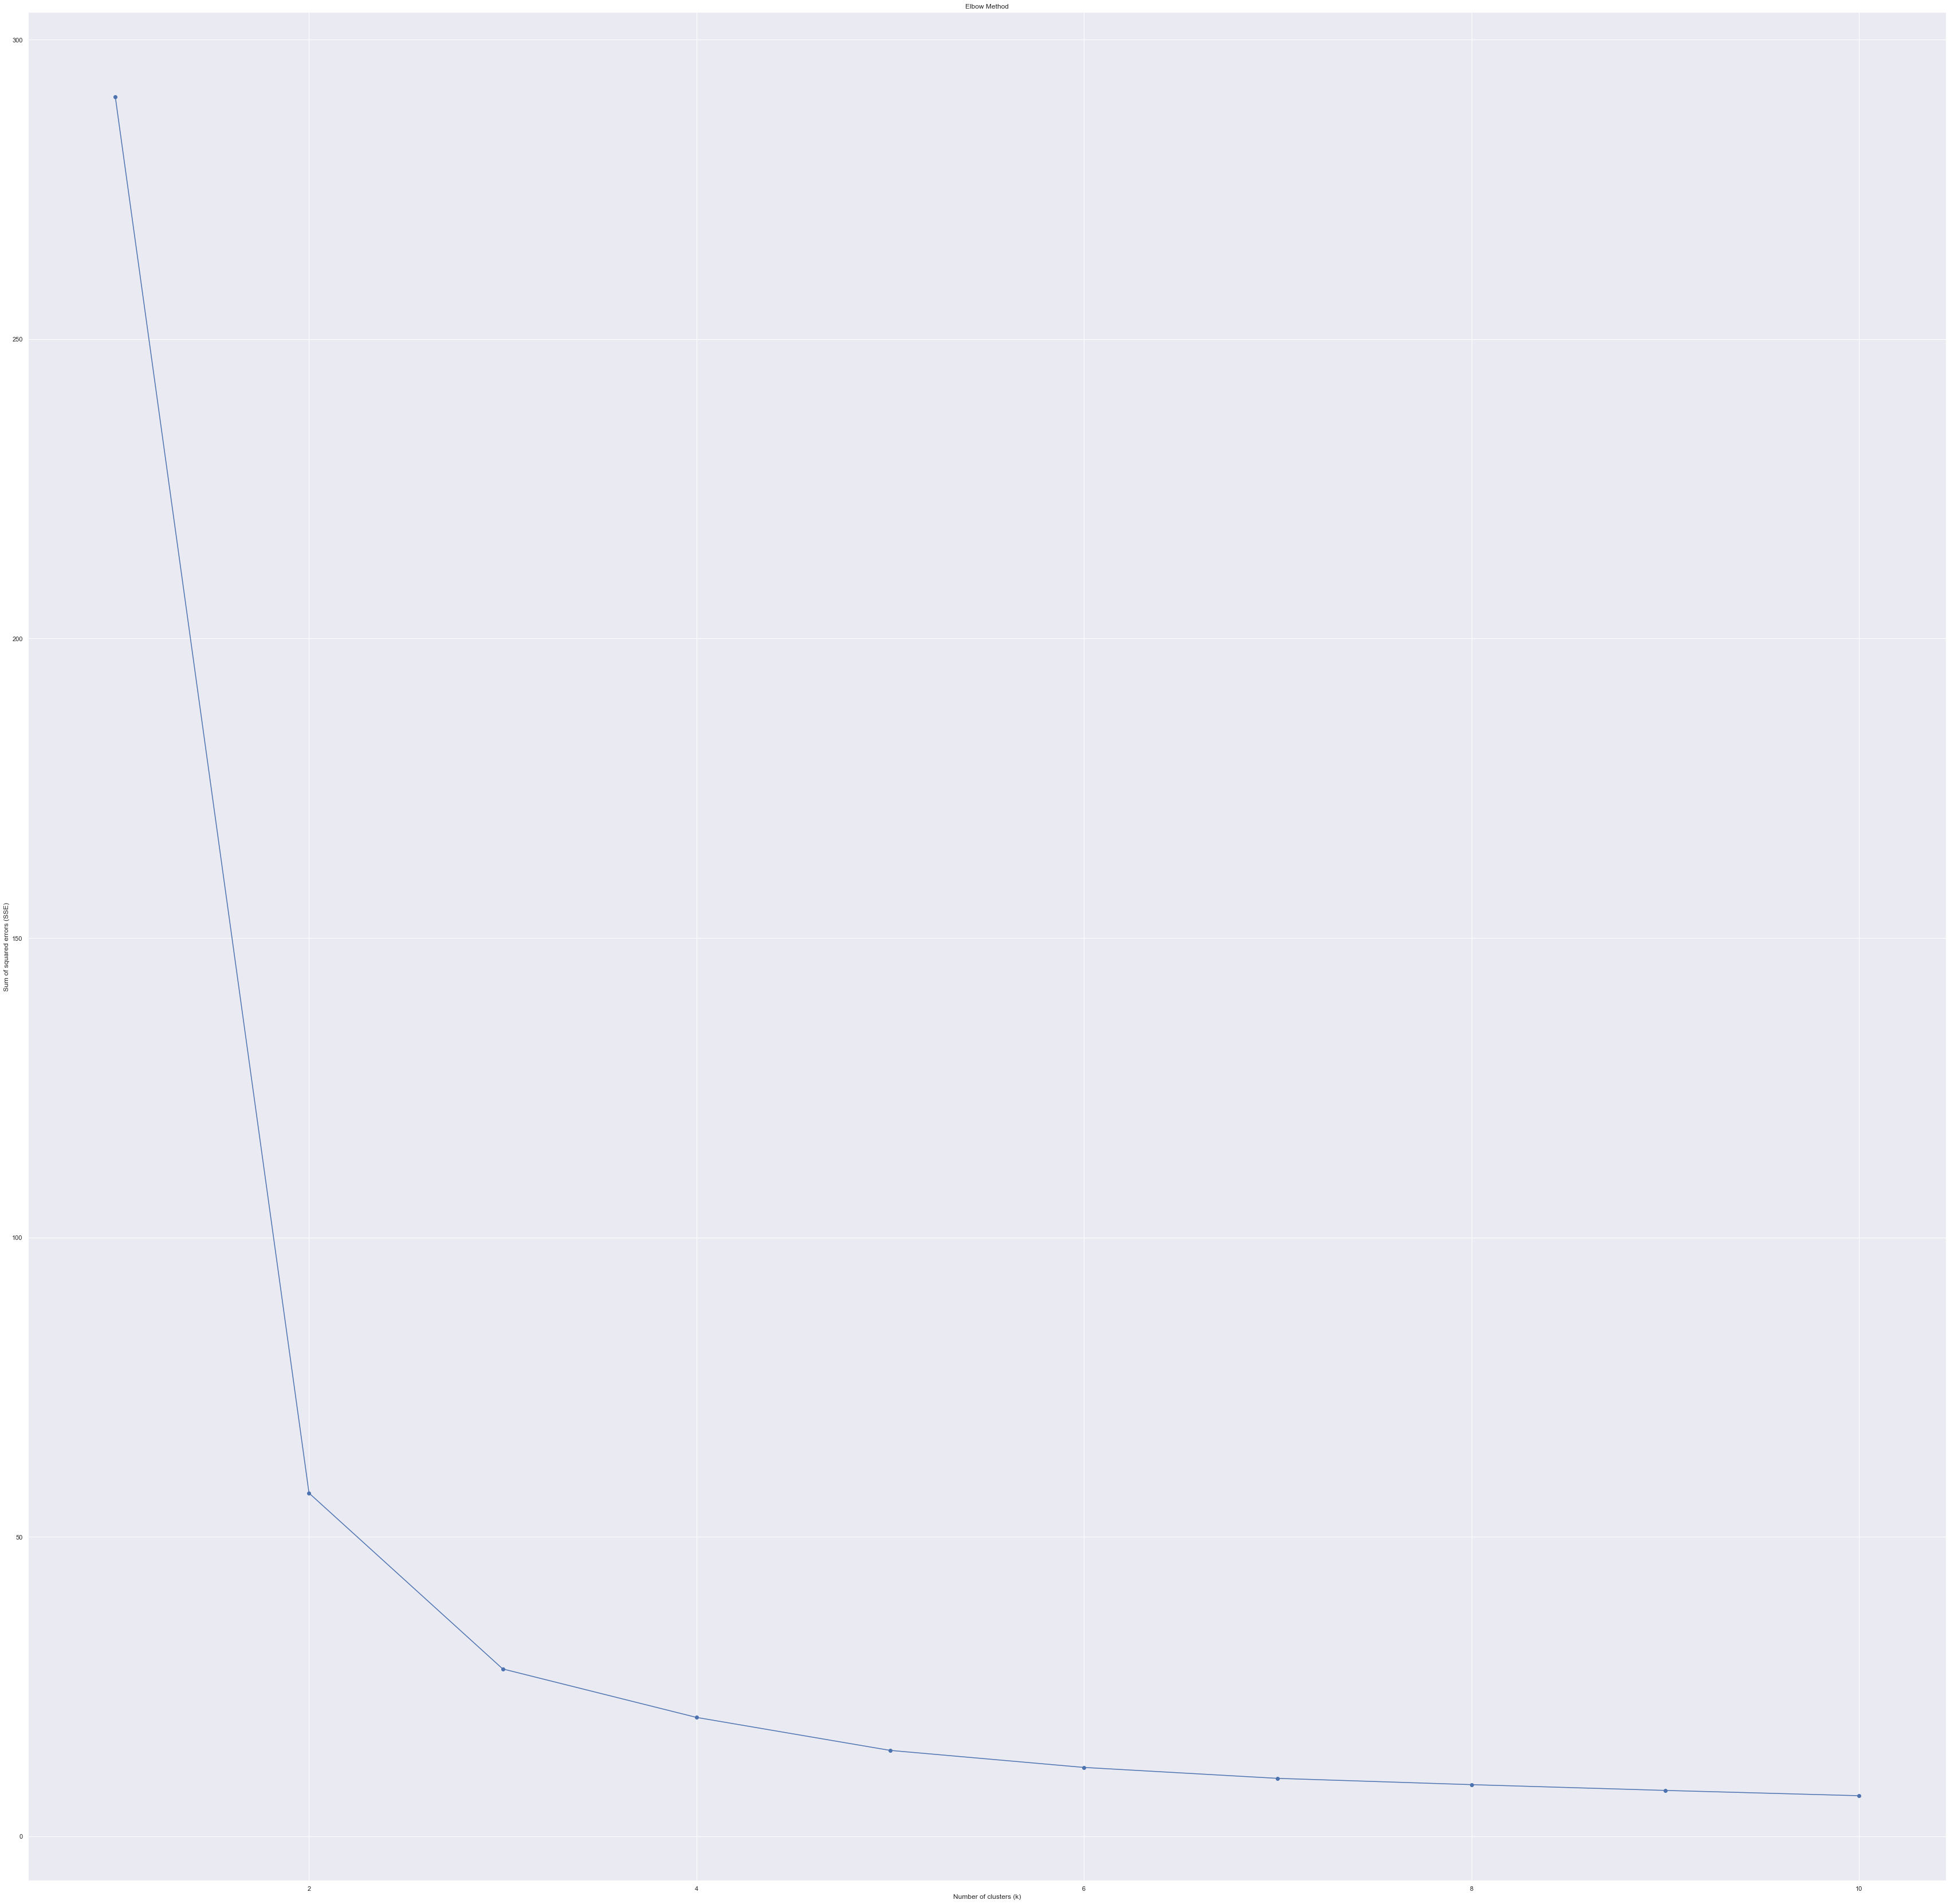

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Users/xinyuandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/xinyuand

In [117]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load the dataset
df = df_numericalNormalized

# Select the predictors and target variable
predictors = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT']
target = 'SALE PRICE'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[target], test_size=0.2, random_state=42)

# Determine the optimal number of clusters using the Elbow Method
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method')
plt.grid(True)  # Add grid lines to the plot
plt.show()

# Choose the optimal k value based on the Elbow Method plot
optimal_k = 3  # Replace this value with the appropriate k value based on the Elbow Method plot

# Cluster the training data using K-Means with the optimal k value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_train = kmeans.fit_predict(X_train)

# Build local regression models for each cluster
models = []
for i in range(optimal_k):
    X_train_cluster = X_train[clusters_train == i]
    y_train_cluster = y_train[clusters_train == i]
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_cluster, y_train_cluster)
    models.append(model)

# Evaluate the performance of the global regression model
global_model = RandomForestRegressor(n_estimators=100, random_state=42)
global_model.fit(X_train, y_train)
global_r_squared = global_model.score(X_test, y_test)
global_mse = mean_squared_error(y_test, global_model.predict(X_test))

# Evaluate the performance of the clusters-based regression model
cluster_predictions = np.zeros_like(y_test)
for i, x_test in enumerate(X_test.values):
    cluster = kmeans.predict([x_test])[0]
    cluster_predictions[i] = models[cluster].predict([x_test])[0]
cluster_r_squared = np.corrcoef(cluster_predictions, y_test)[0, 1] ** 2
cluster_mse = mean_squared_error(y_test, cluster_predictions)




In [118]:
# Print the results

print("Global Regression Model:")
print(f"R-squared value: {global_r_squared:.2f}")
print(f"Mean Squared Error (MSE): {global_mse:.2f}")

print("Clusters-Based Regression Model:")
print(f"R-squared value: {cluster_r_squared:.2f}")
print(f"Mean Squared Error (MSE): {cluster_mse:.2f}")

Global Regression Model:
R-squared value: 0.36
Mean Squared Error (MSE): 0.03
Clusters-Based Regression Model:
R-squared value: 0.34
Mean Squared Error (MSE): 0.03


Based on the results, the clusters-based regression model has a slightly lower R-squared value and a similar mean squared error (MSE) compared to the global regression model. This suggests that the clusters-based regression model may not be as accurate as the global regression model in predicting the target variable.

However, it's important to note that the performance of the clusters-based regression model may depend on the specific dataset and number of clusters chosen. In some cases, clustering the data and building local regressors may lead to more accurate predictions, especially if there are distinct clusters in the data that exhibit different relationships between the predictors and the target variable.

Another advantage of the clusters-based regression model is that it can provide more interpretable results. By analyzing the coefficients of the local regressors, we can gain insights into how different clusters of data points are related to the target variable. This can be useful in understanding the underlying patterns in the data and identifying potential factors that affect the target variable.

Overall, both the global and clusters-based regression models have their advantages and disadvantages. The global regression model is simpler to implement and may provide more accurate predictions on average, but may not capture the heterogeneity in the data. The clusters-based regression model can provide more localized and potentially more accurate predictions, but requires more computational resources and data preprocessing steps. The choice between these two models ultimately depends on the specific problem and the characteristics of the dataset.

In [120]:

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load the dataset
df_numerical2WithUnitSQF

# Select the predictors and target variable
predictors = ['LAND SQUARE FEET', 'GROSS SQUARE FEET',"TOTAL UNITS",'RESIDENTIAL UNITS','COMMERCIAL UNITS']
target = 'SALE PRICE'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[target], test_size=0.2, random_state=42)

# Determine the optimal number of clusters using the Elbow Method
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method')
plt.grid(True)  # Add grid lines to the plot
plt.show()

# Choose the optimal k value based on the Elbow Method plot
optimal_k = 3  # Replace this value with the appropriate k value based on the Elbow Method plot

# Cluster the training data using K-Means with the optimal k value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_train = kmeans.fit_predict(X_train)

# Build local regression models for each cluster
models = []
for i in range(optimal_k):
    X_train_cluster = X_train[clusters_train == i]
    y_train_cluster = y_train[clusters_train == i]
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_cluster, y_train_cluster)
    models.append(model)

# Evaluate the performance of the global regression model
global_model = RandomForestRegressor(n_estimators=100, random_state=42)
global_model.fit(X_train, y_train)
global_r_squared = global_model.score(X_test, y_test)
global_mse = mean_squared_error(y_test, global_model.predict(X_test))

# Evaluate the performance of the clusters-based regression model
cluster_predictions = np.zeros_like(y_test)
for i, x_test in enumerate(X_test.values):
    cluster = kmeans.predict([x_test])[0]
    cluster_predictions[i] = models[cluster].predict([x_test])[0]
cluster_r_squared = np.corrcoef(cluster_predictions, y_test)[0, 1] ** 2
cluster_mse = mean_squared_error(y_test, cluster_predictions)




KeyError: "['TOTAL UNITS', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS'] not in index"